In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.interpolate as spi

# Inulin

Condition subcomm8 has a max time of 12.0h, which is less than 24h.


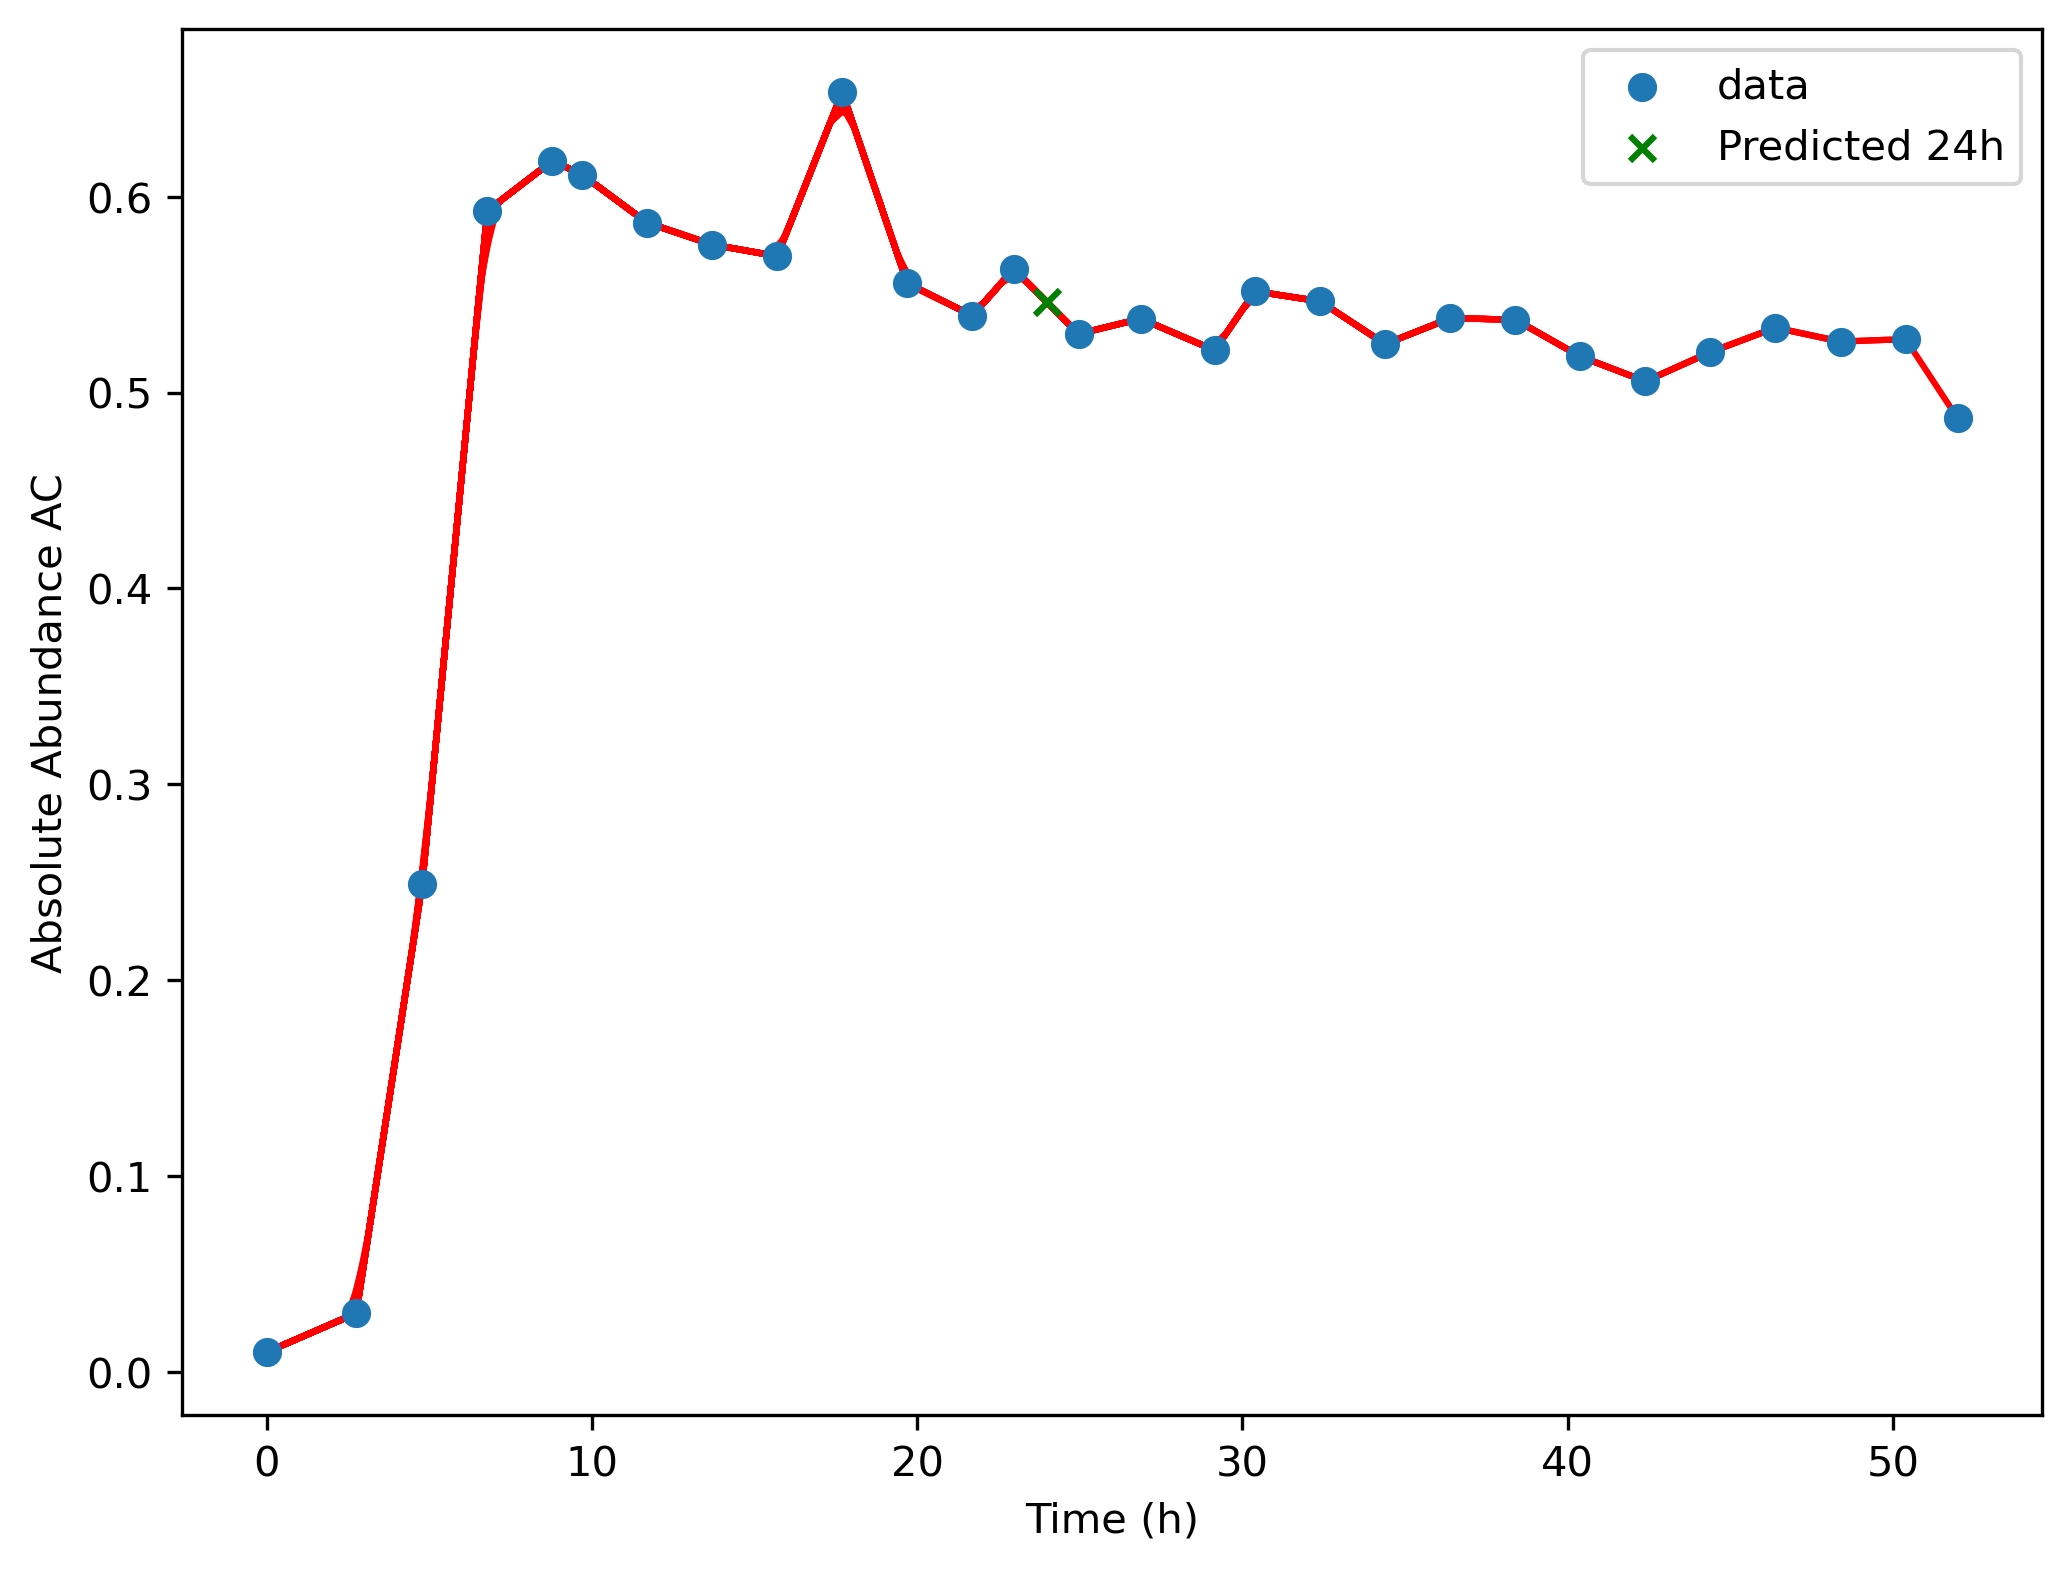

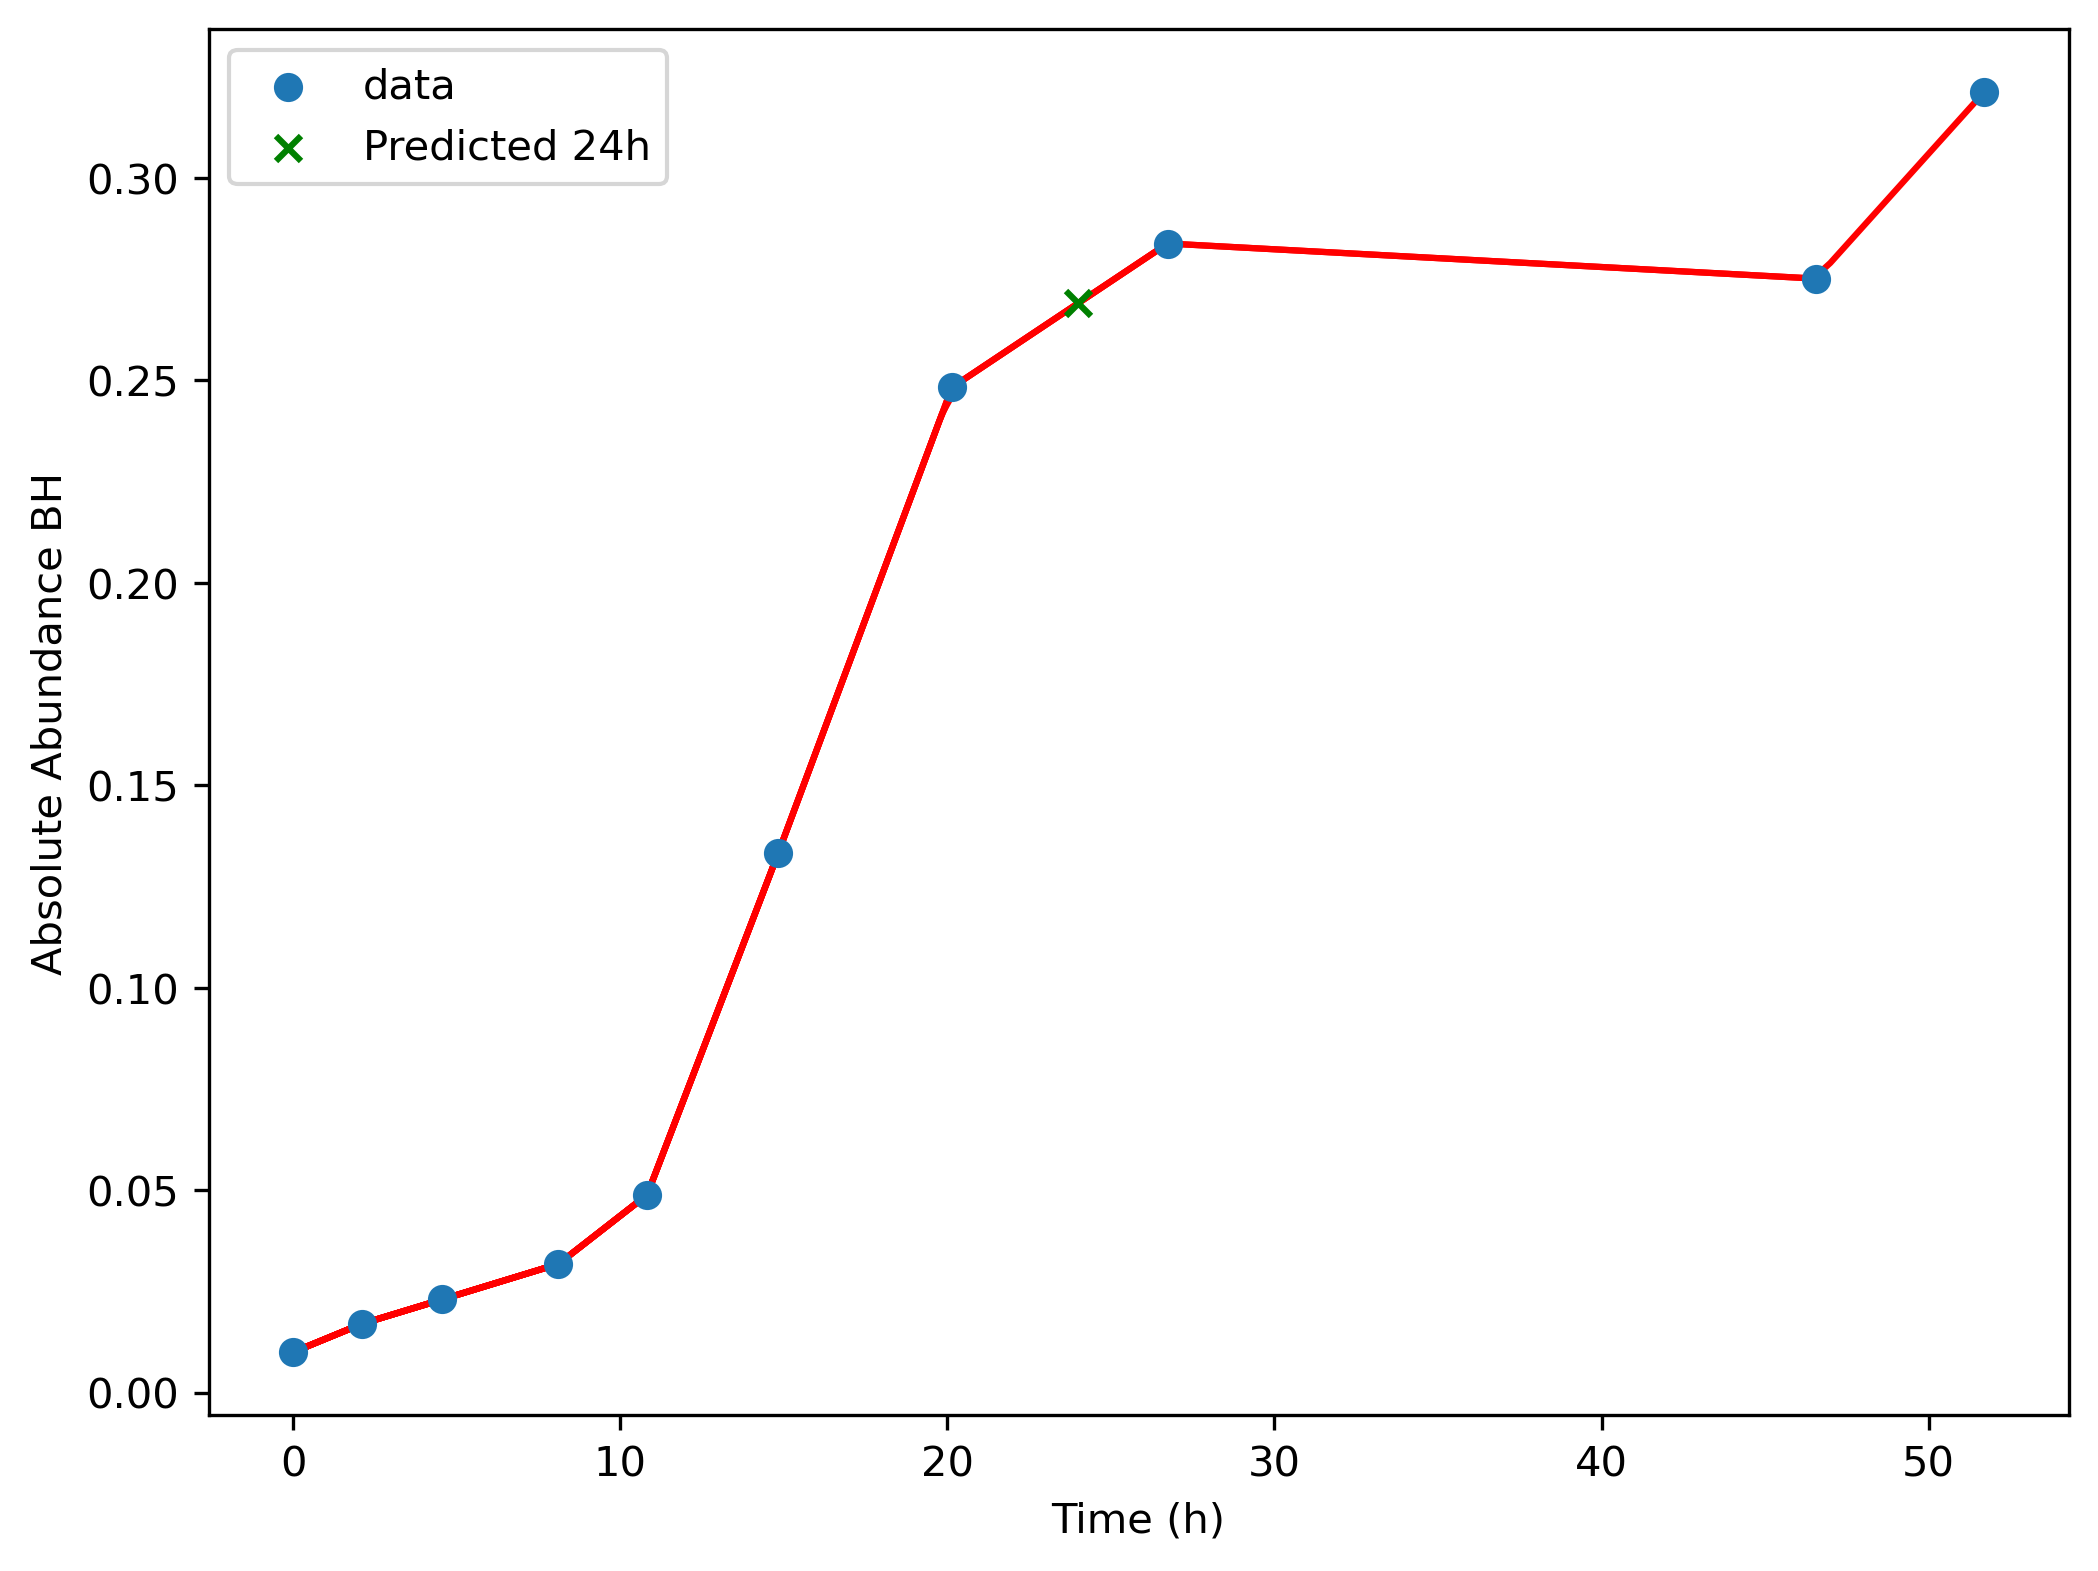

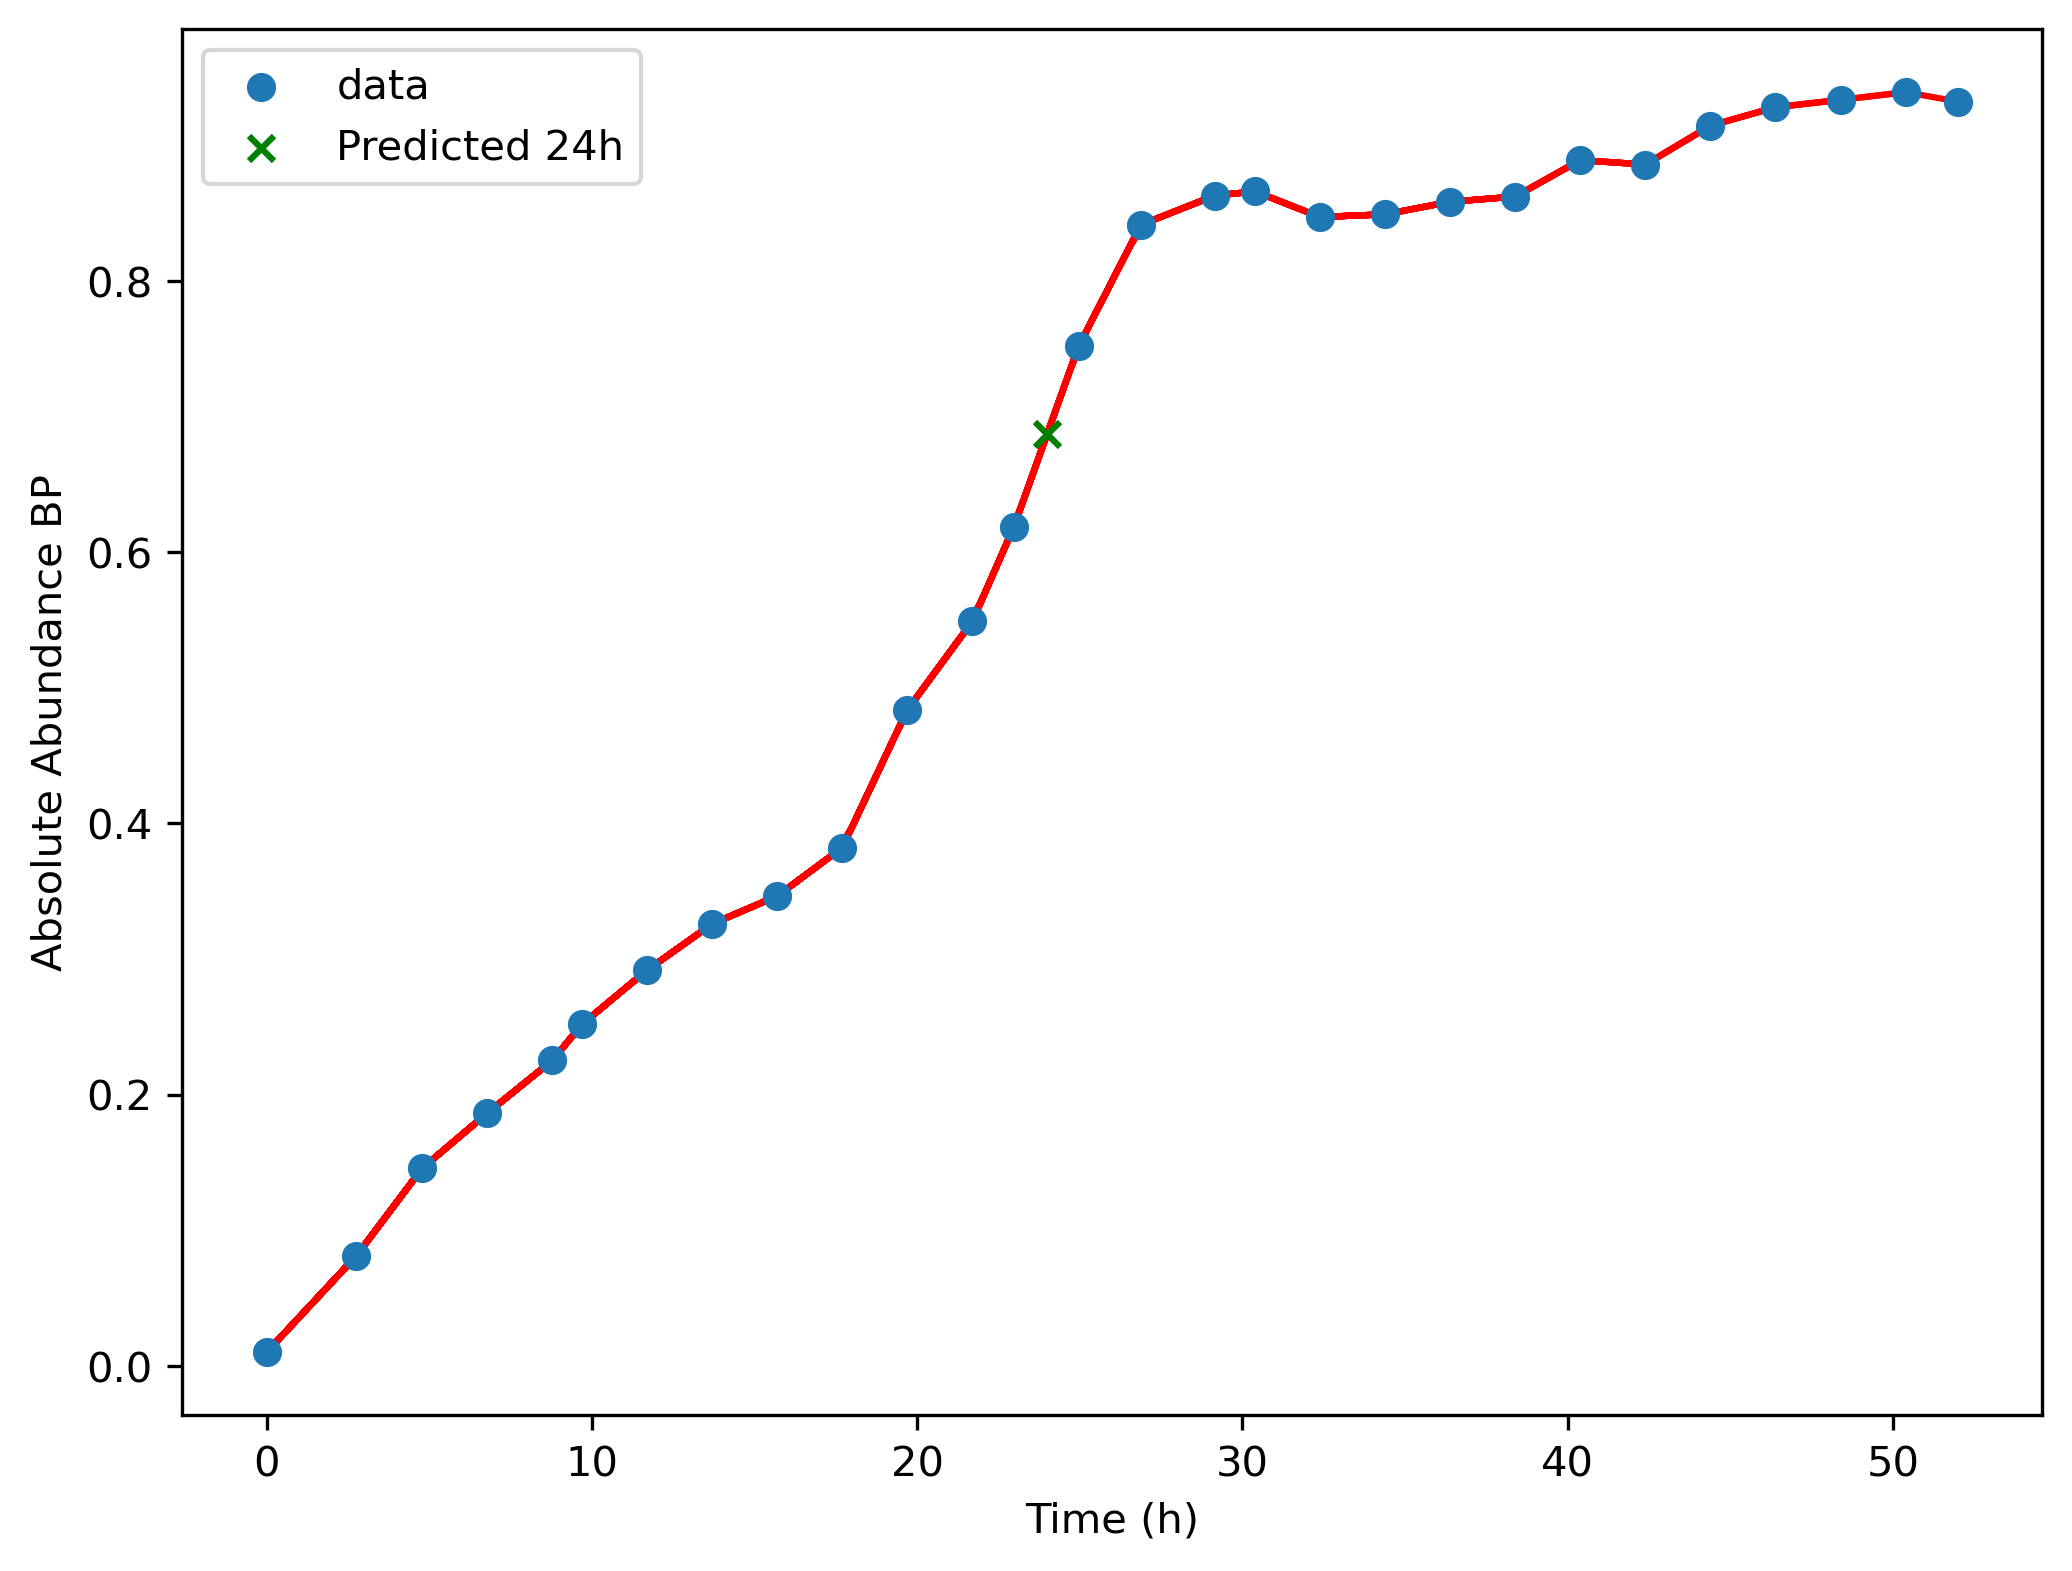

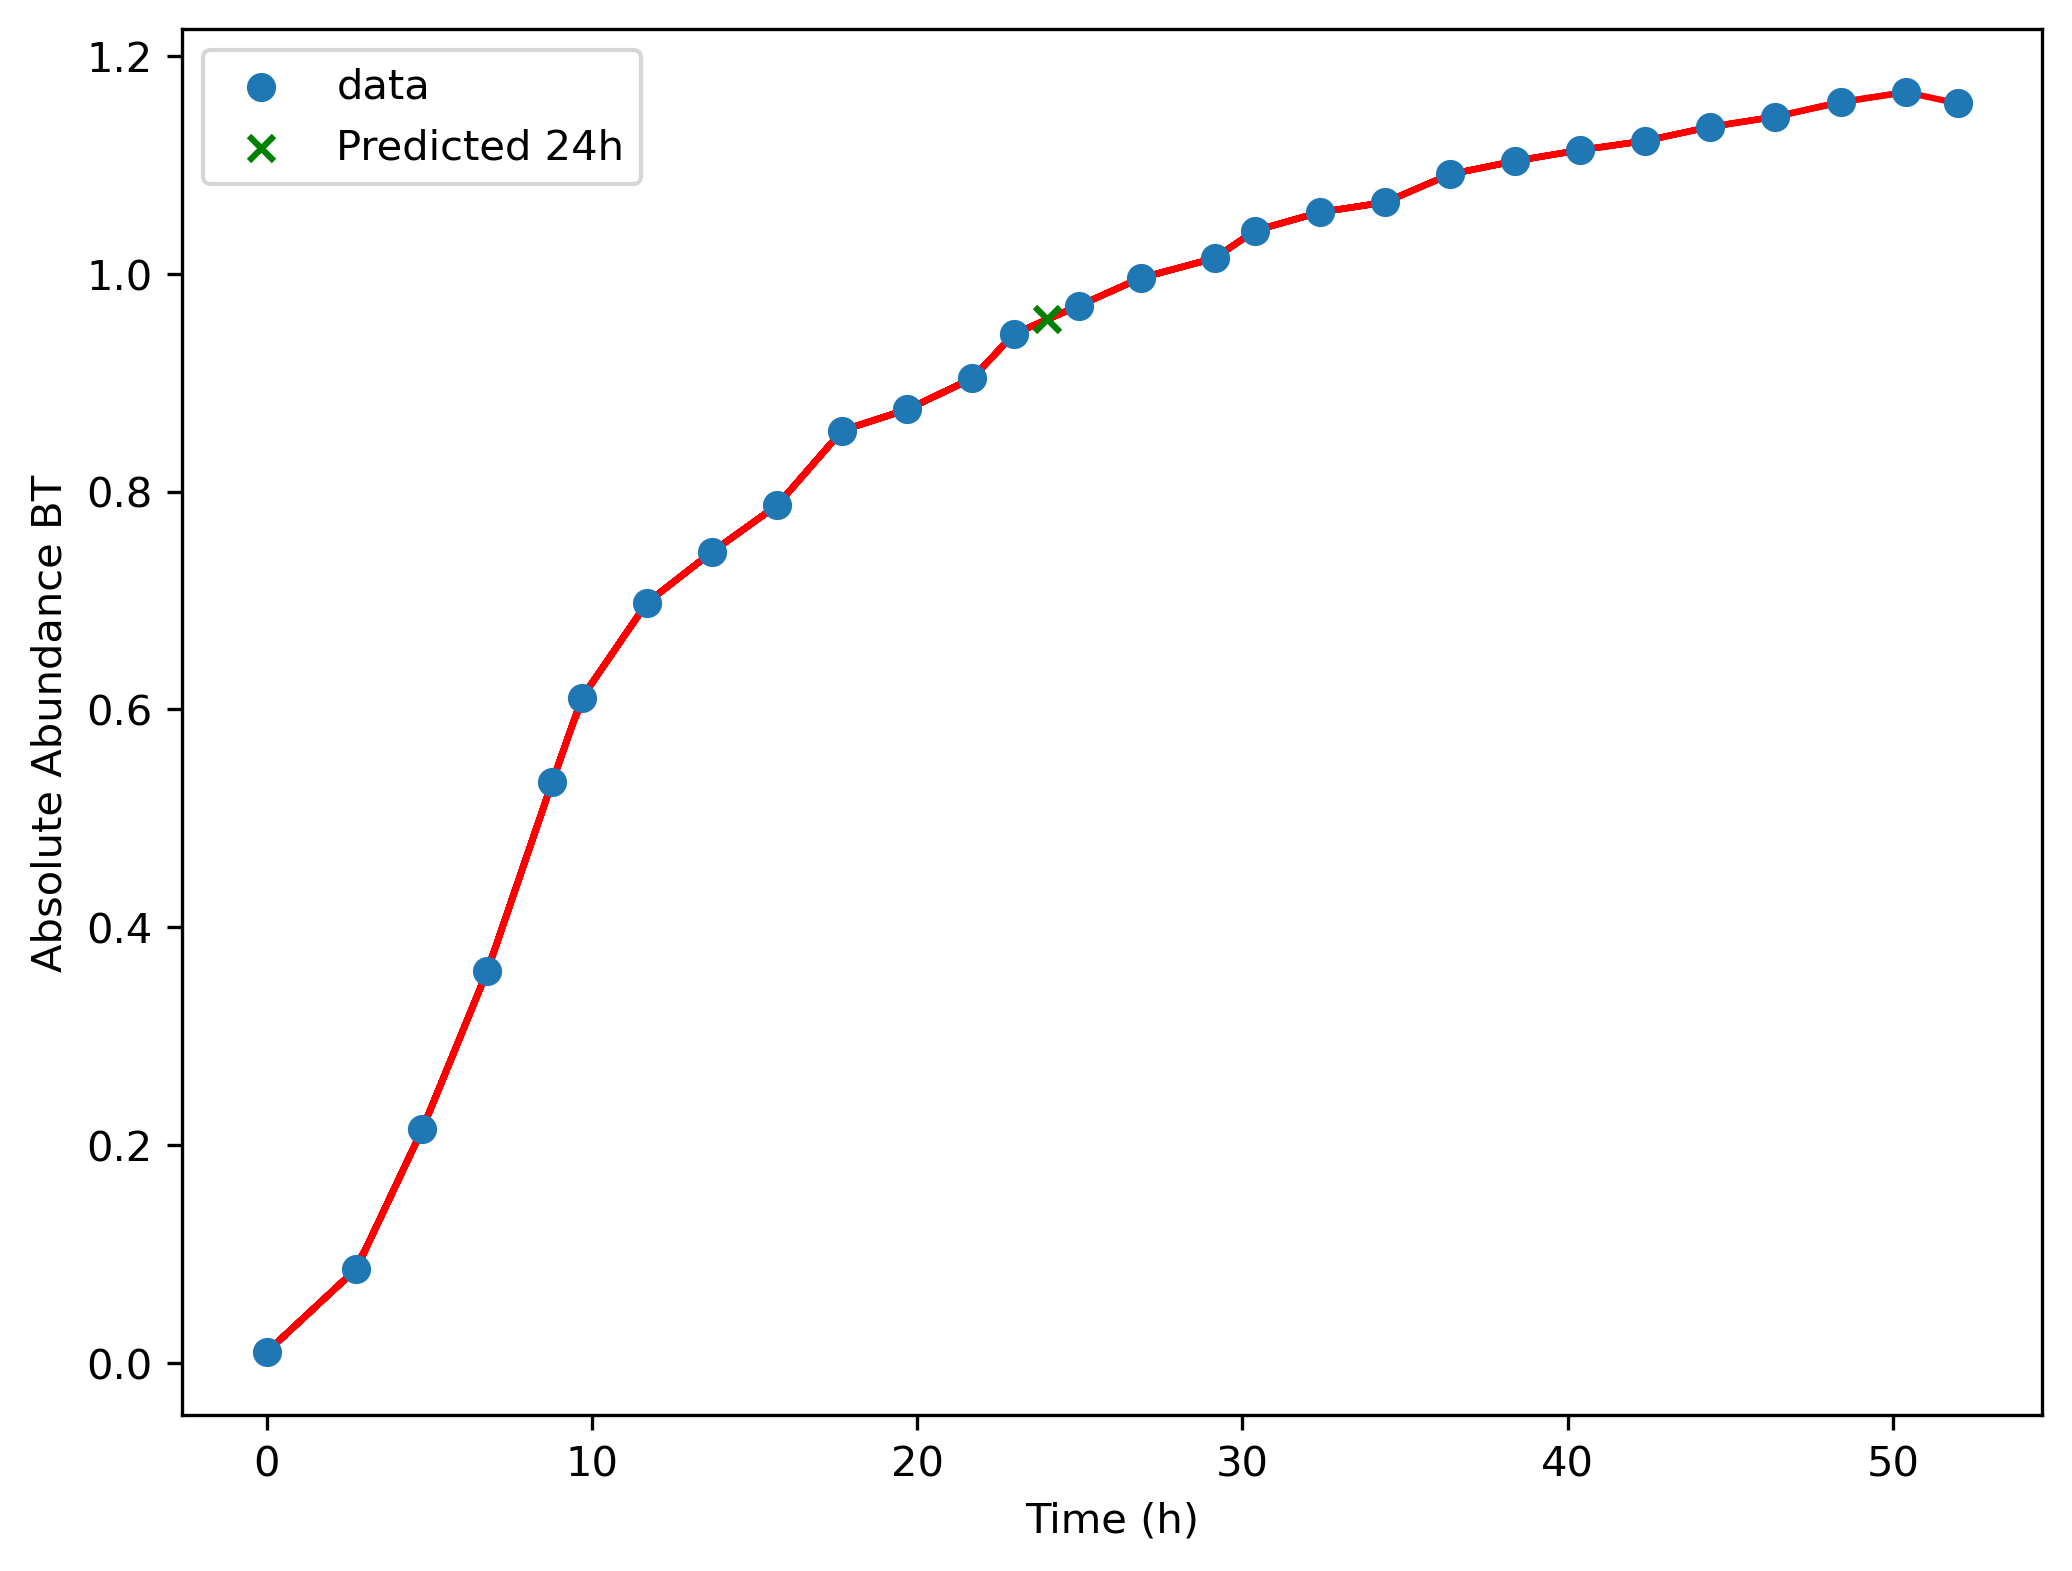

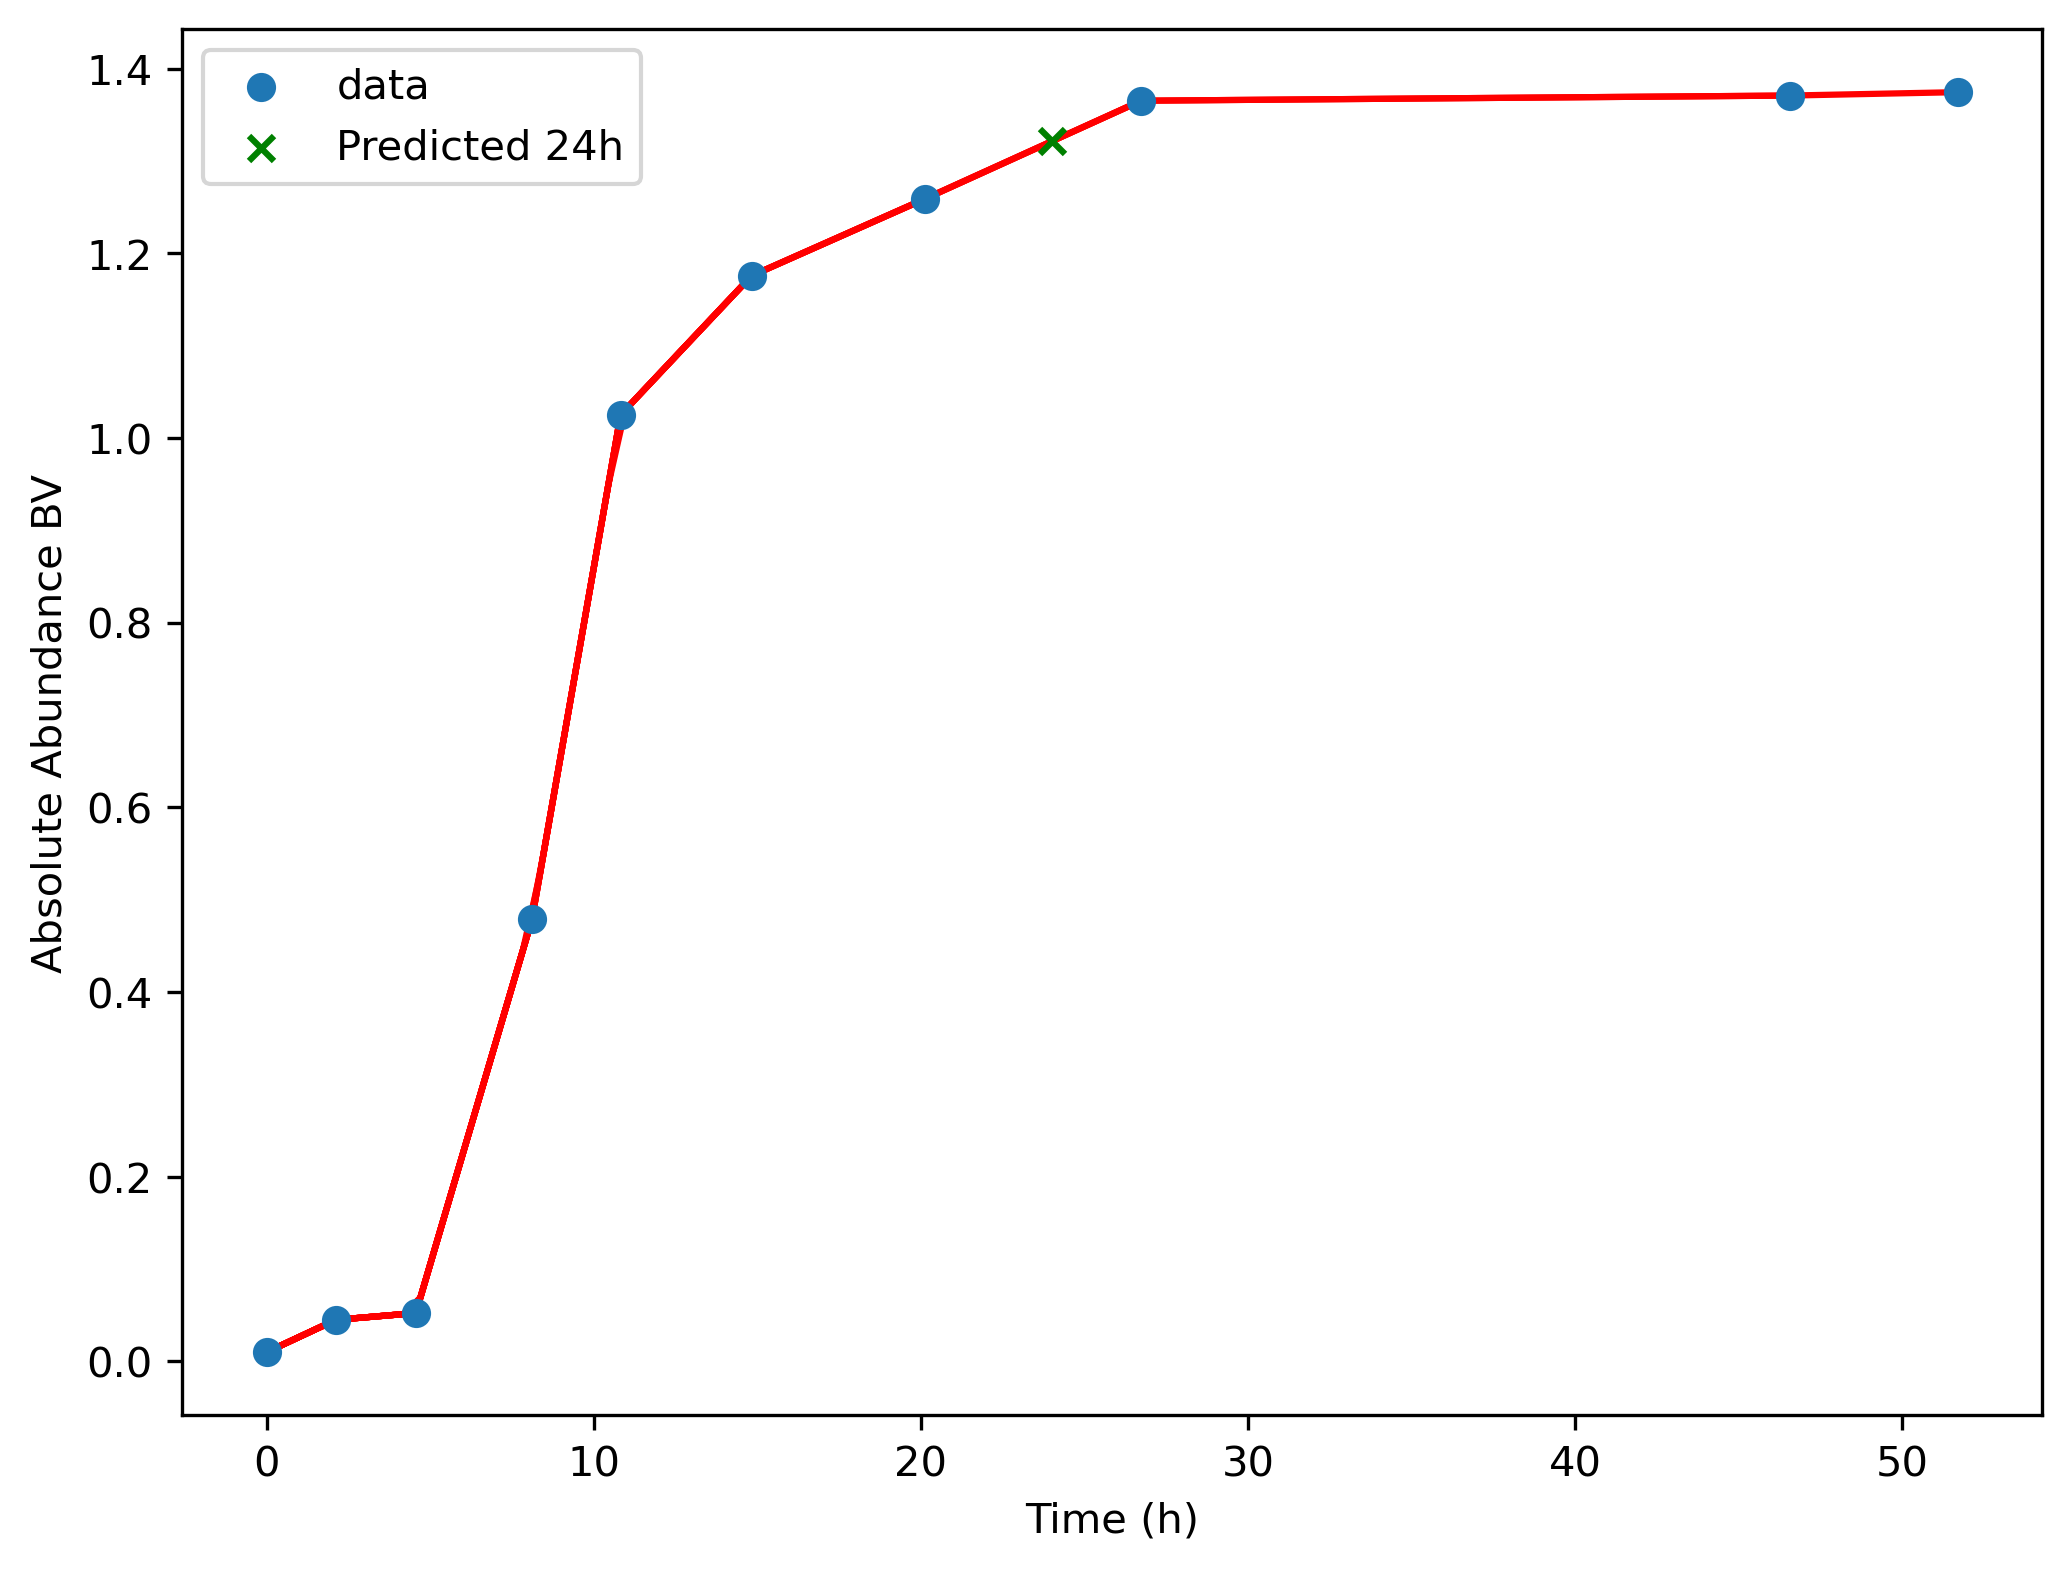

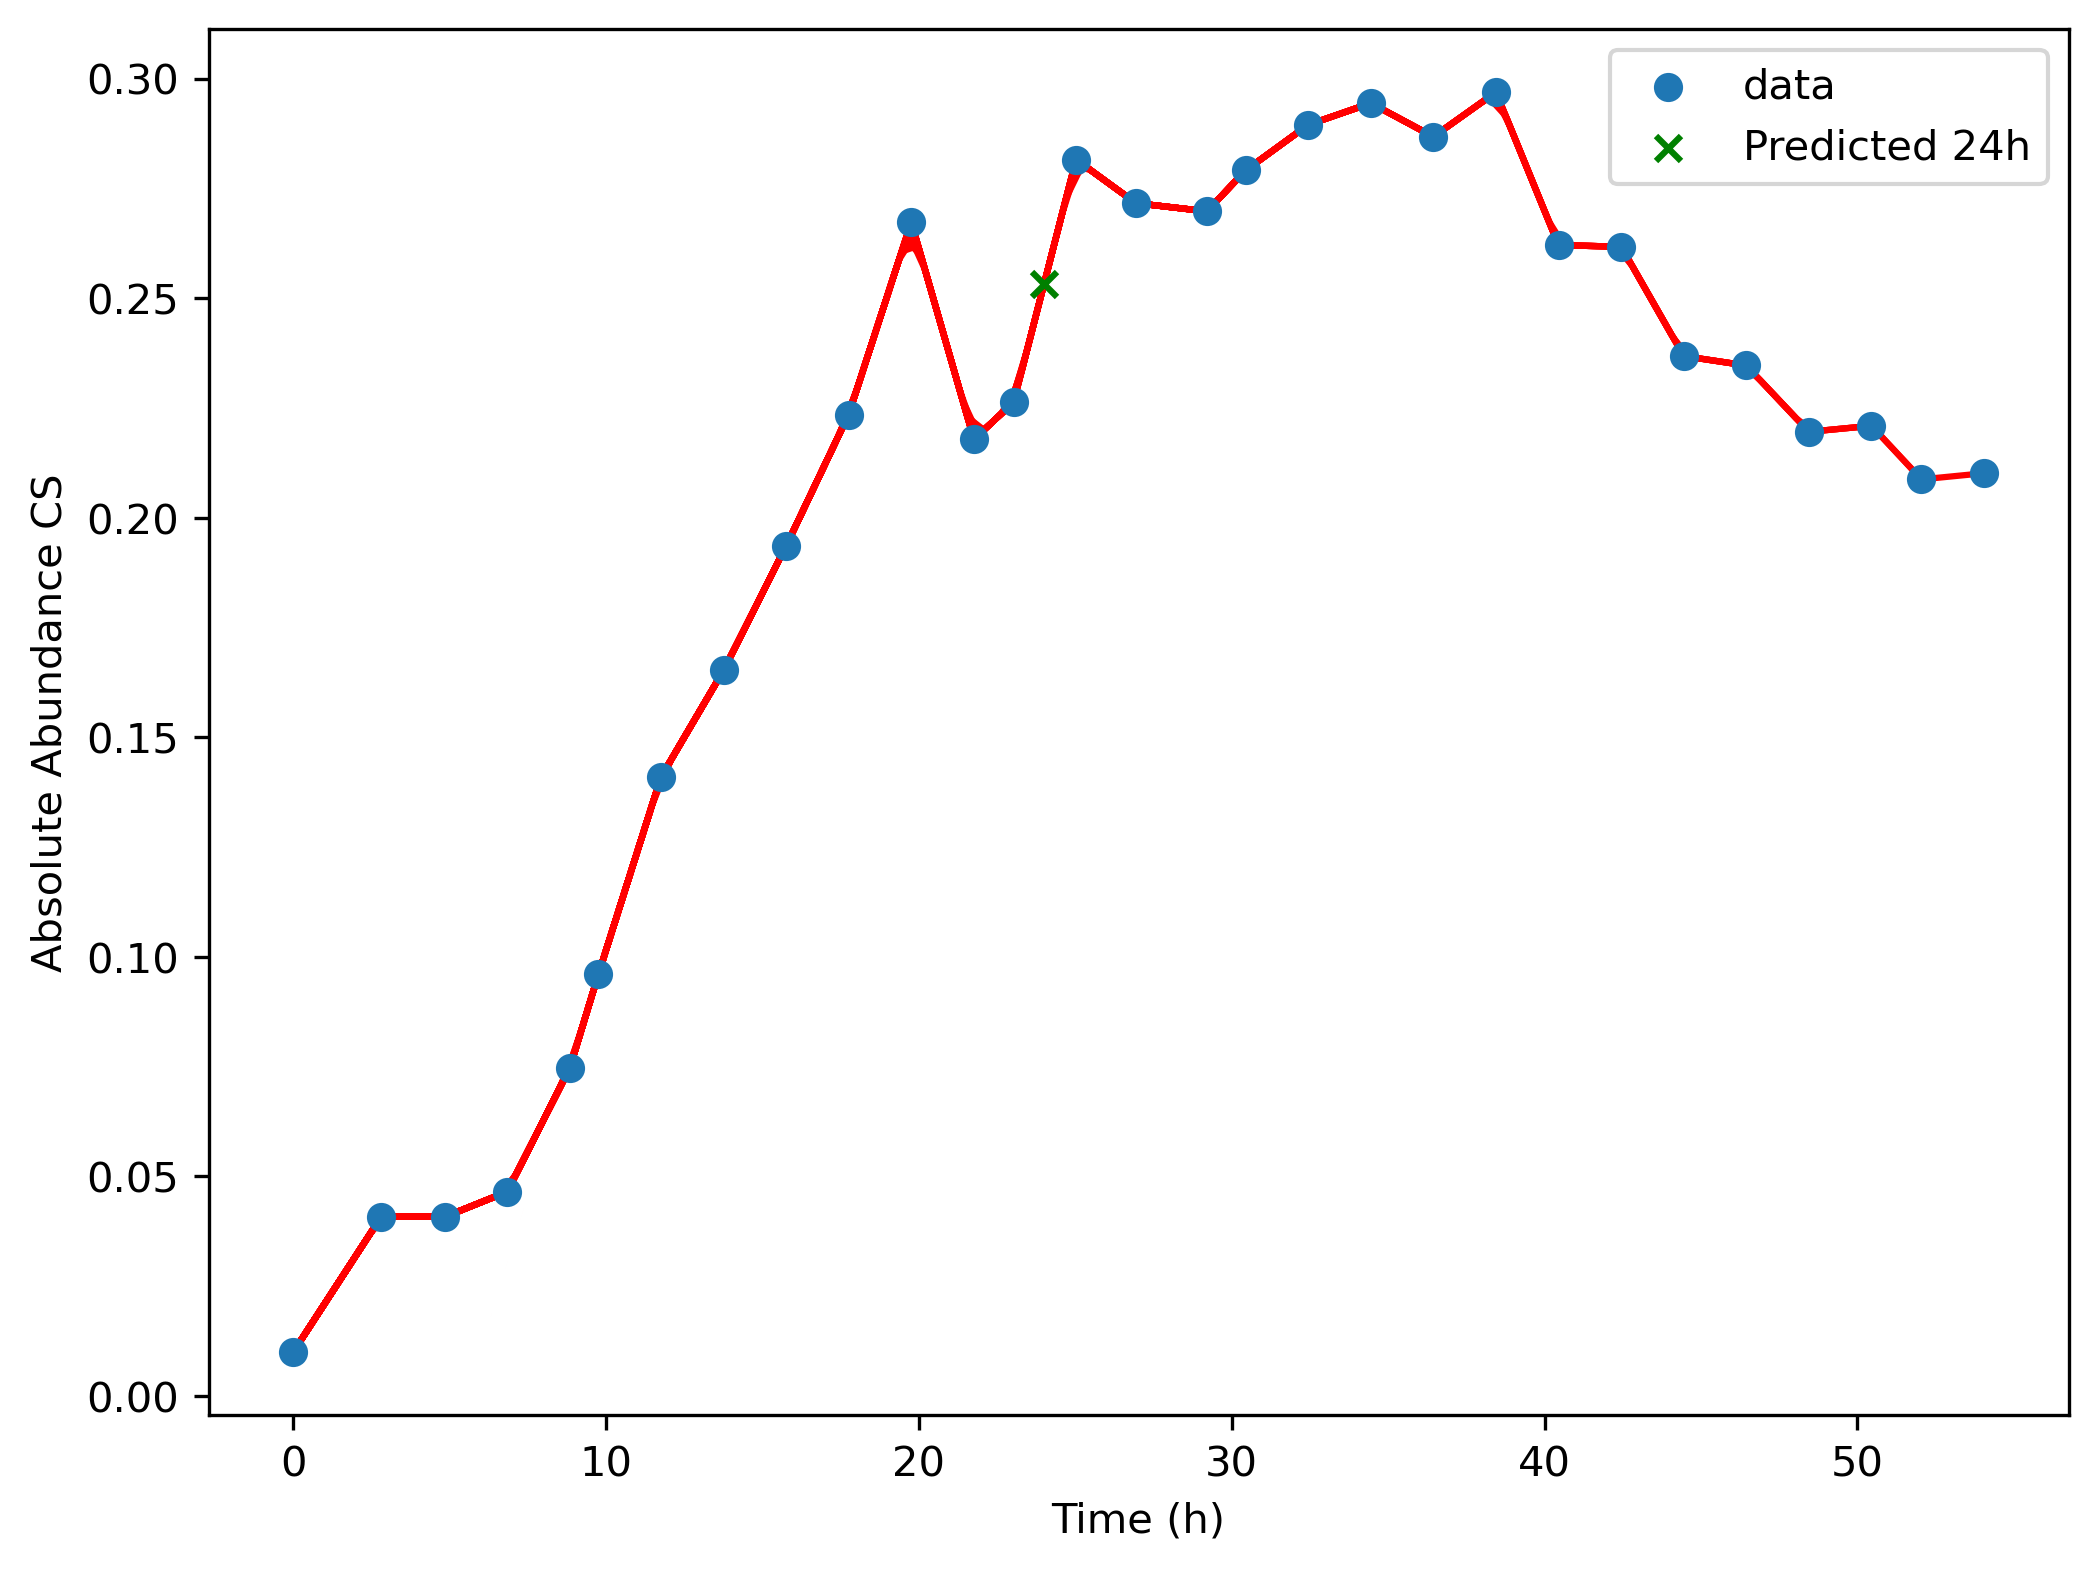

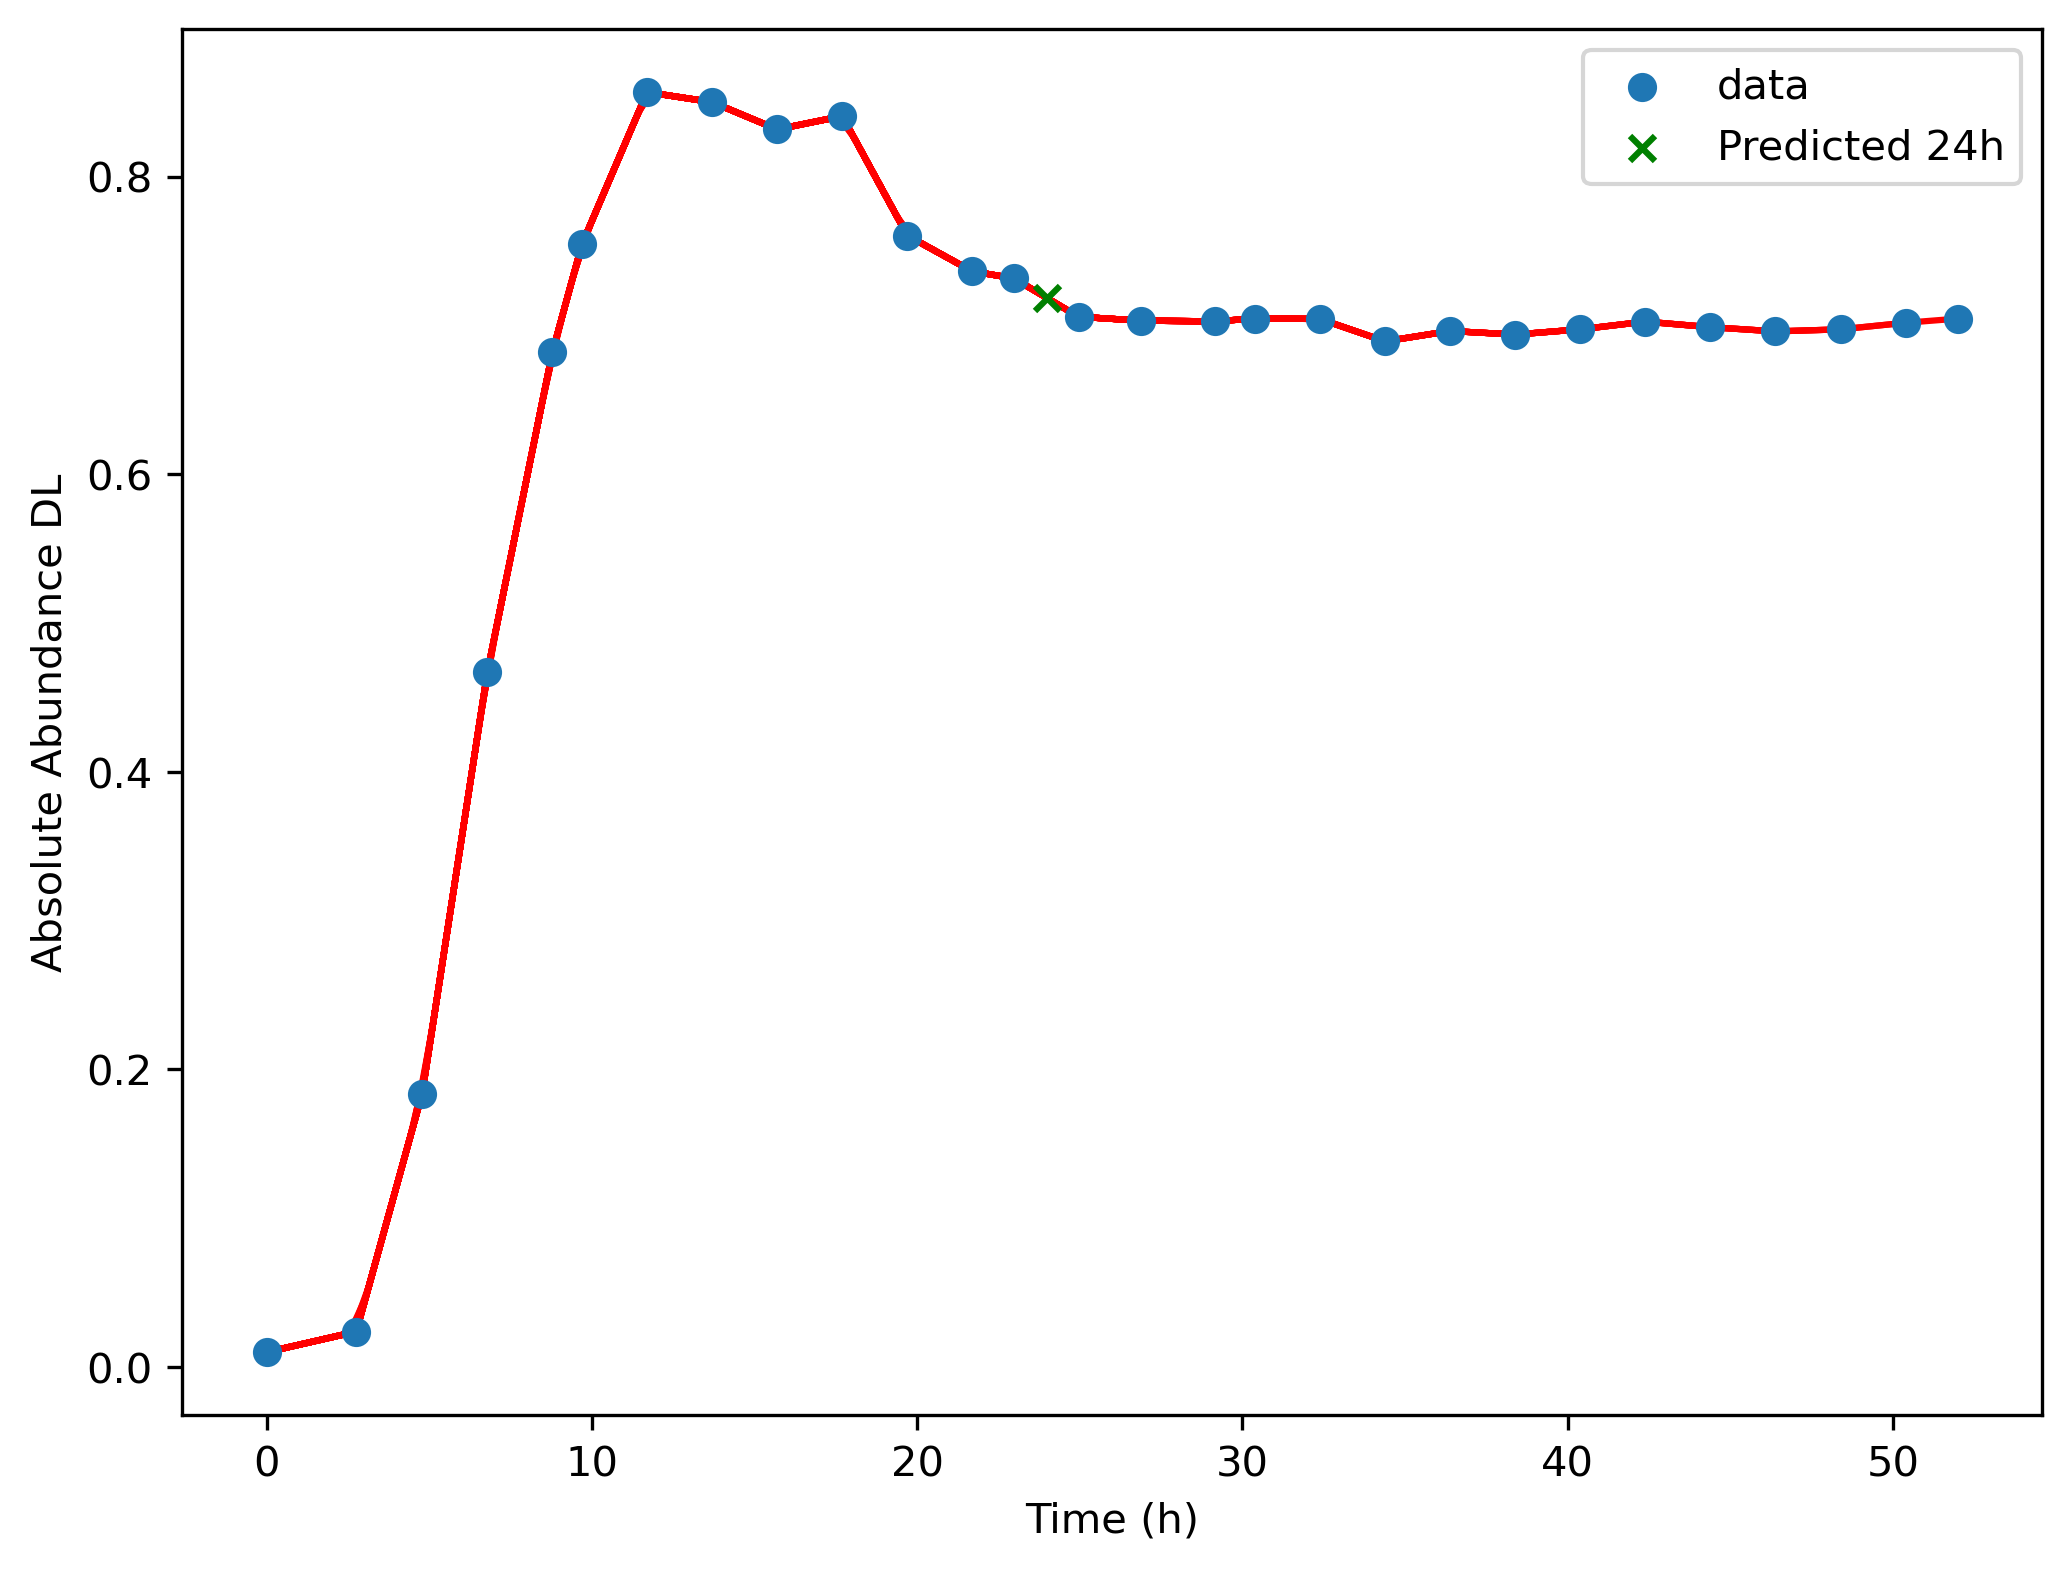

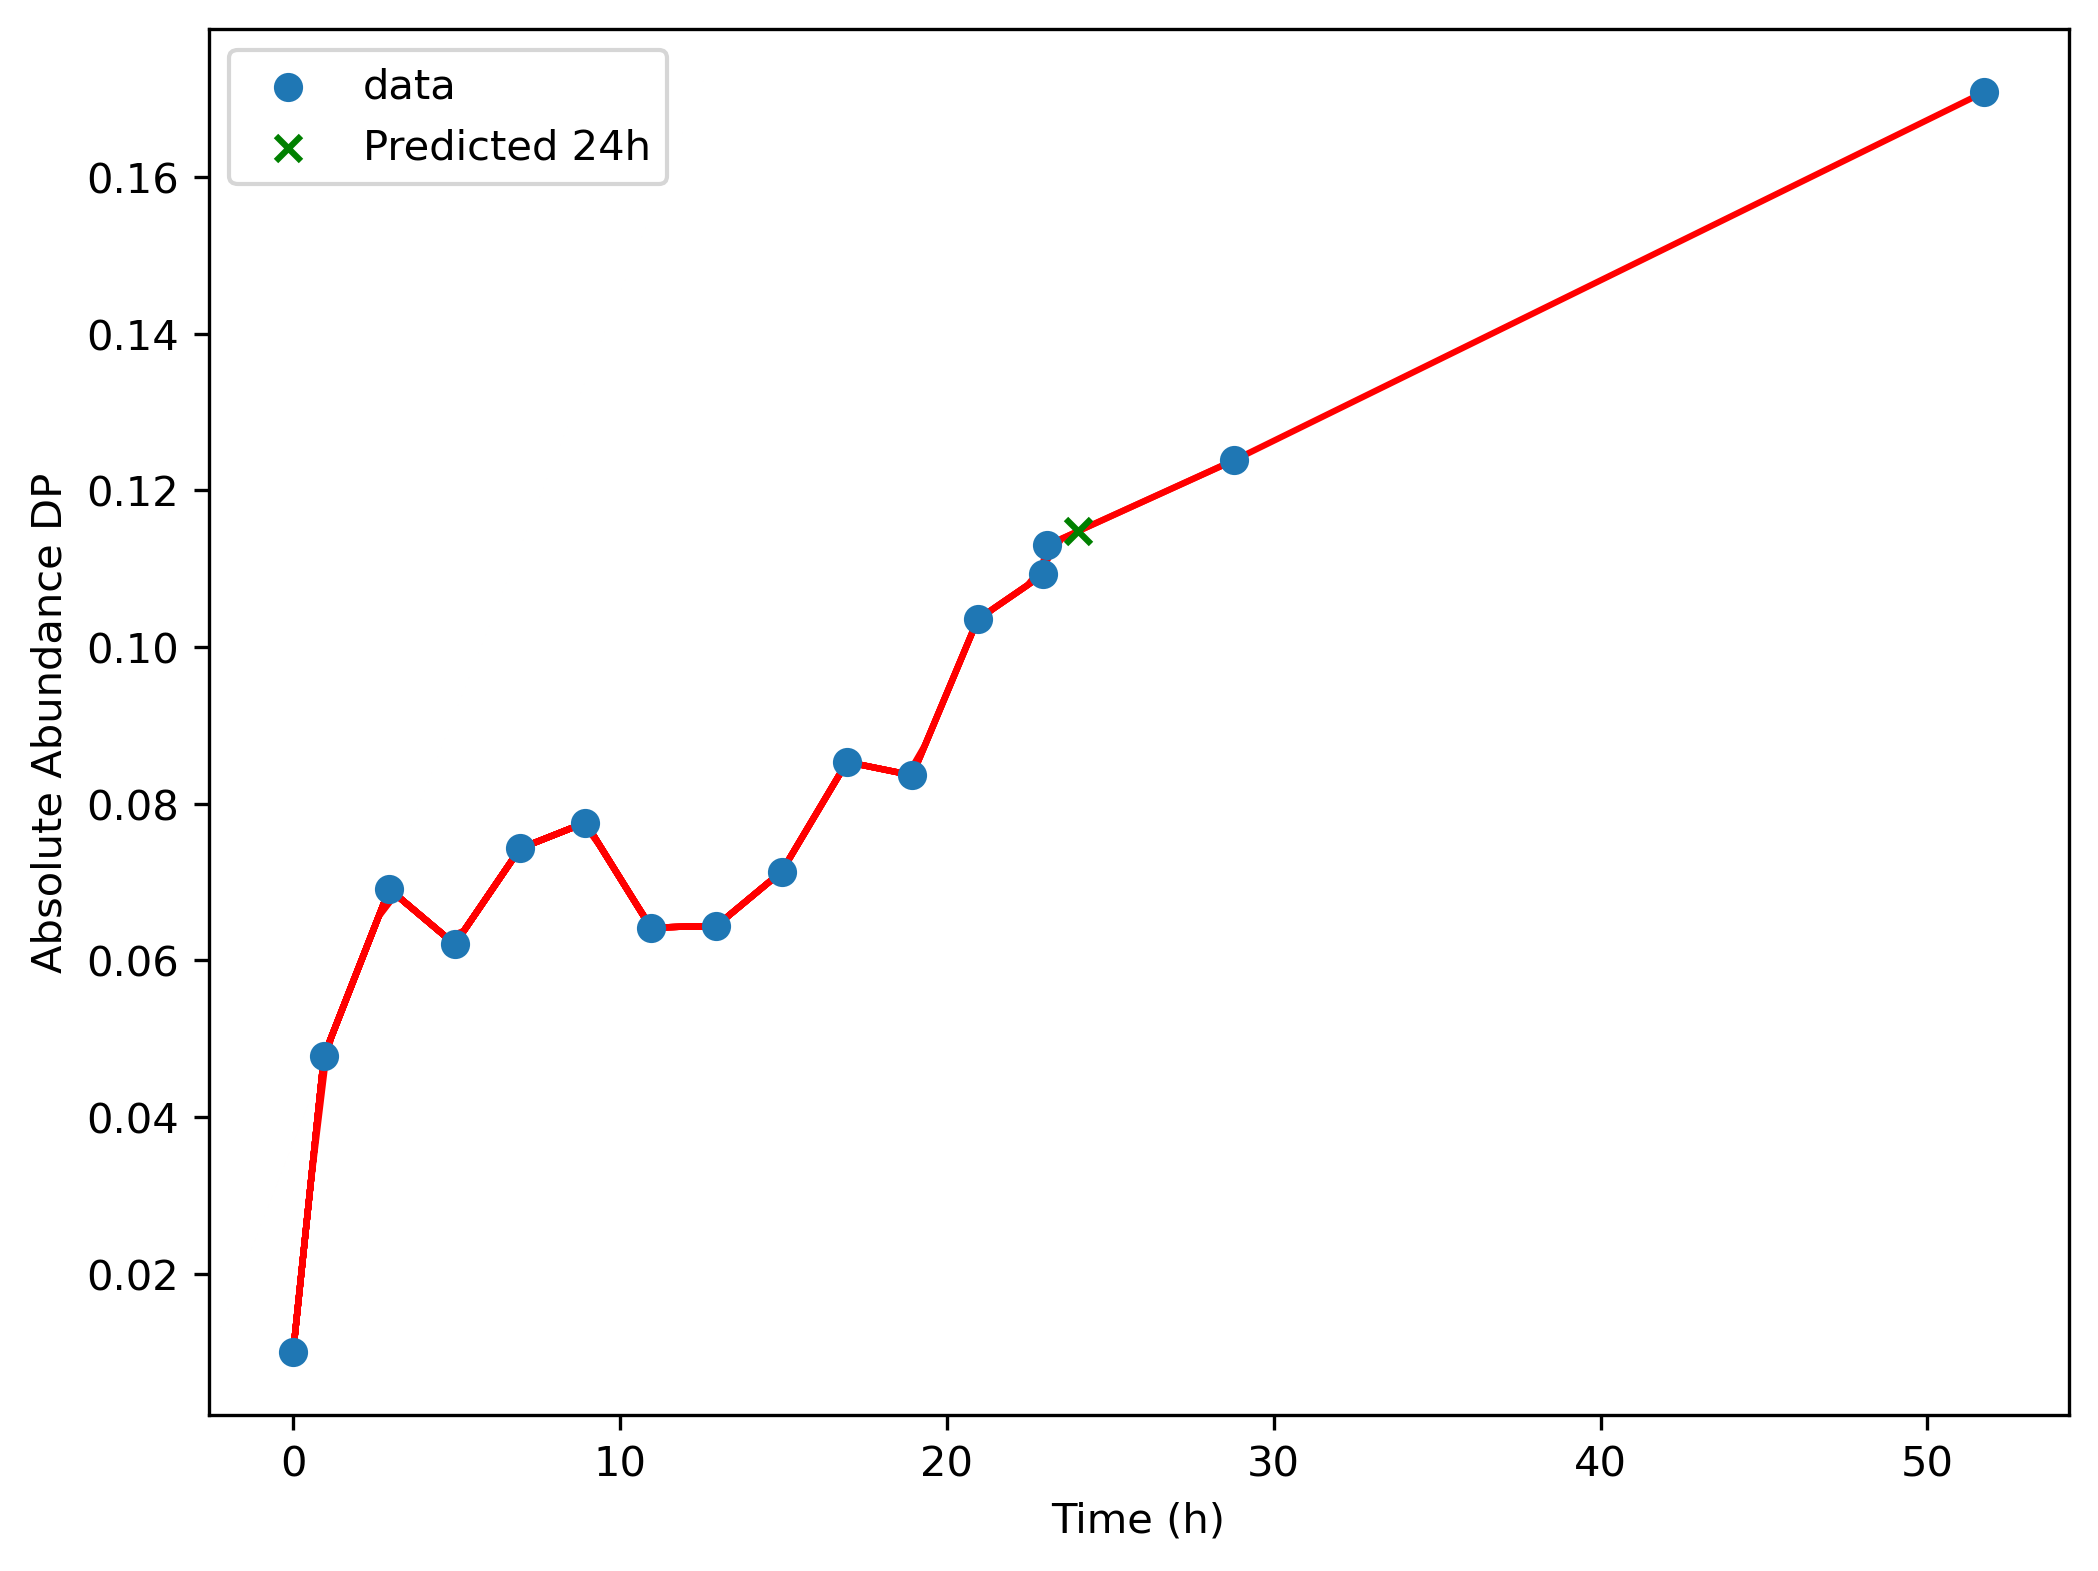

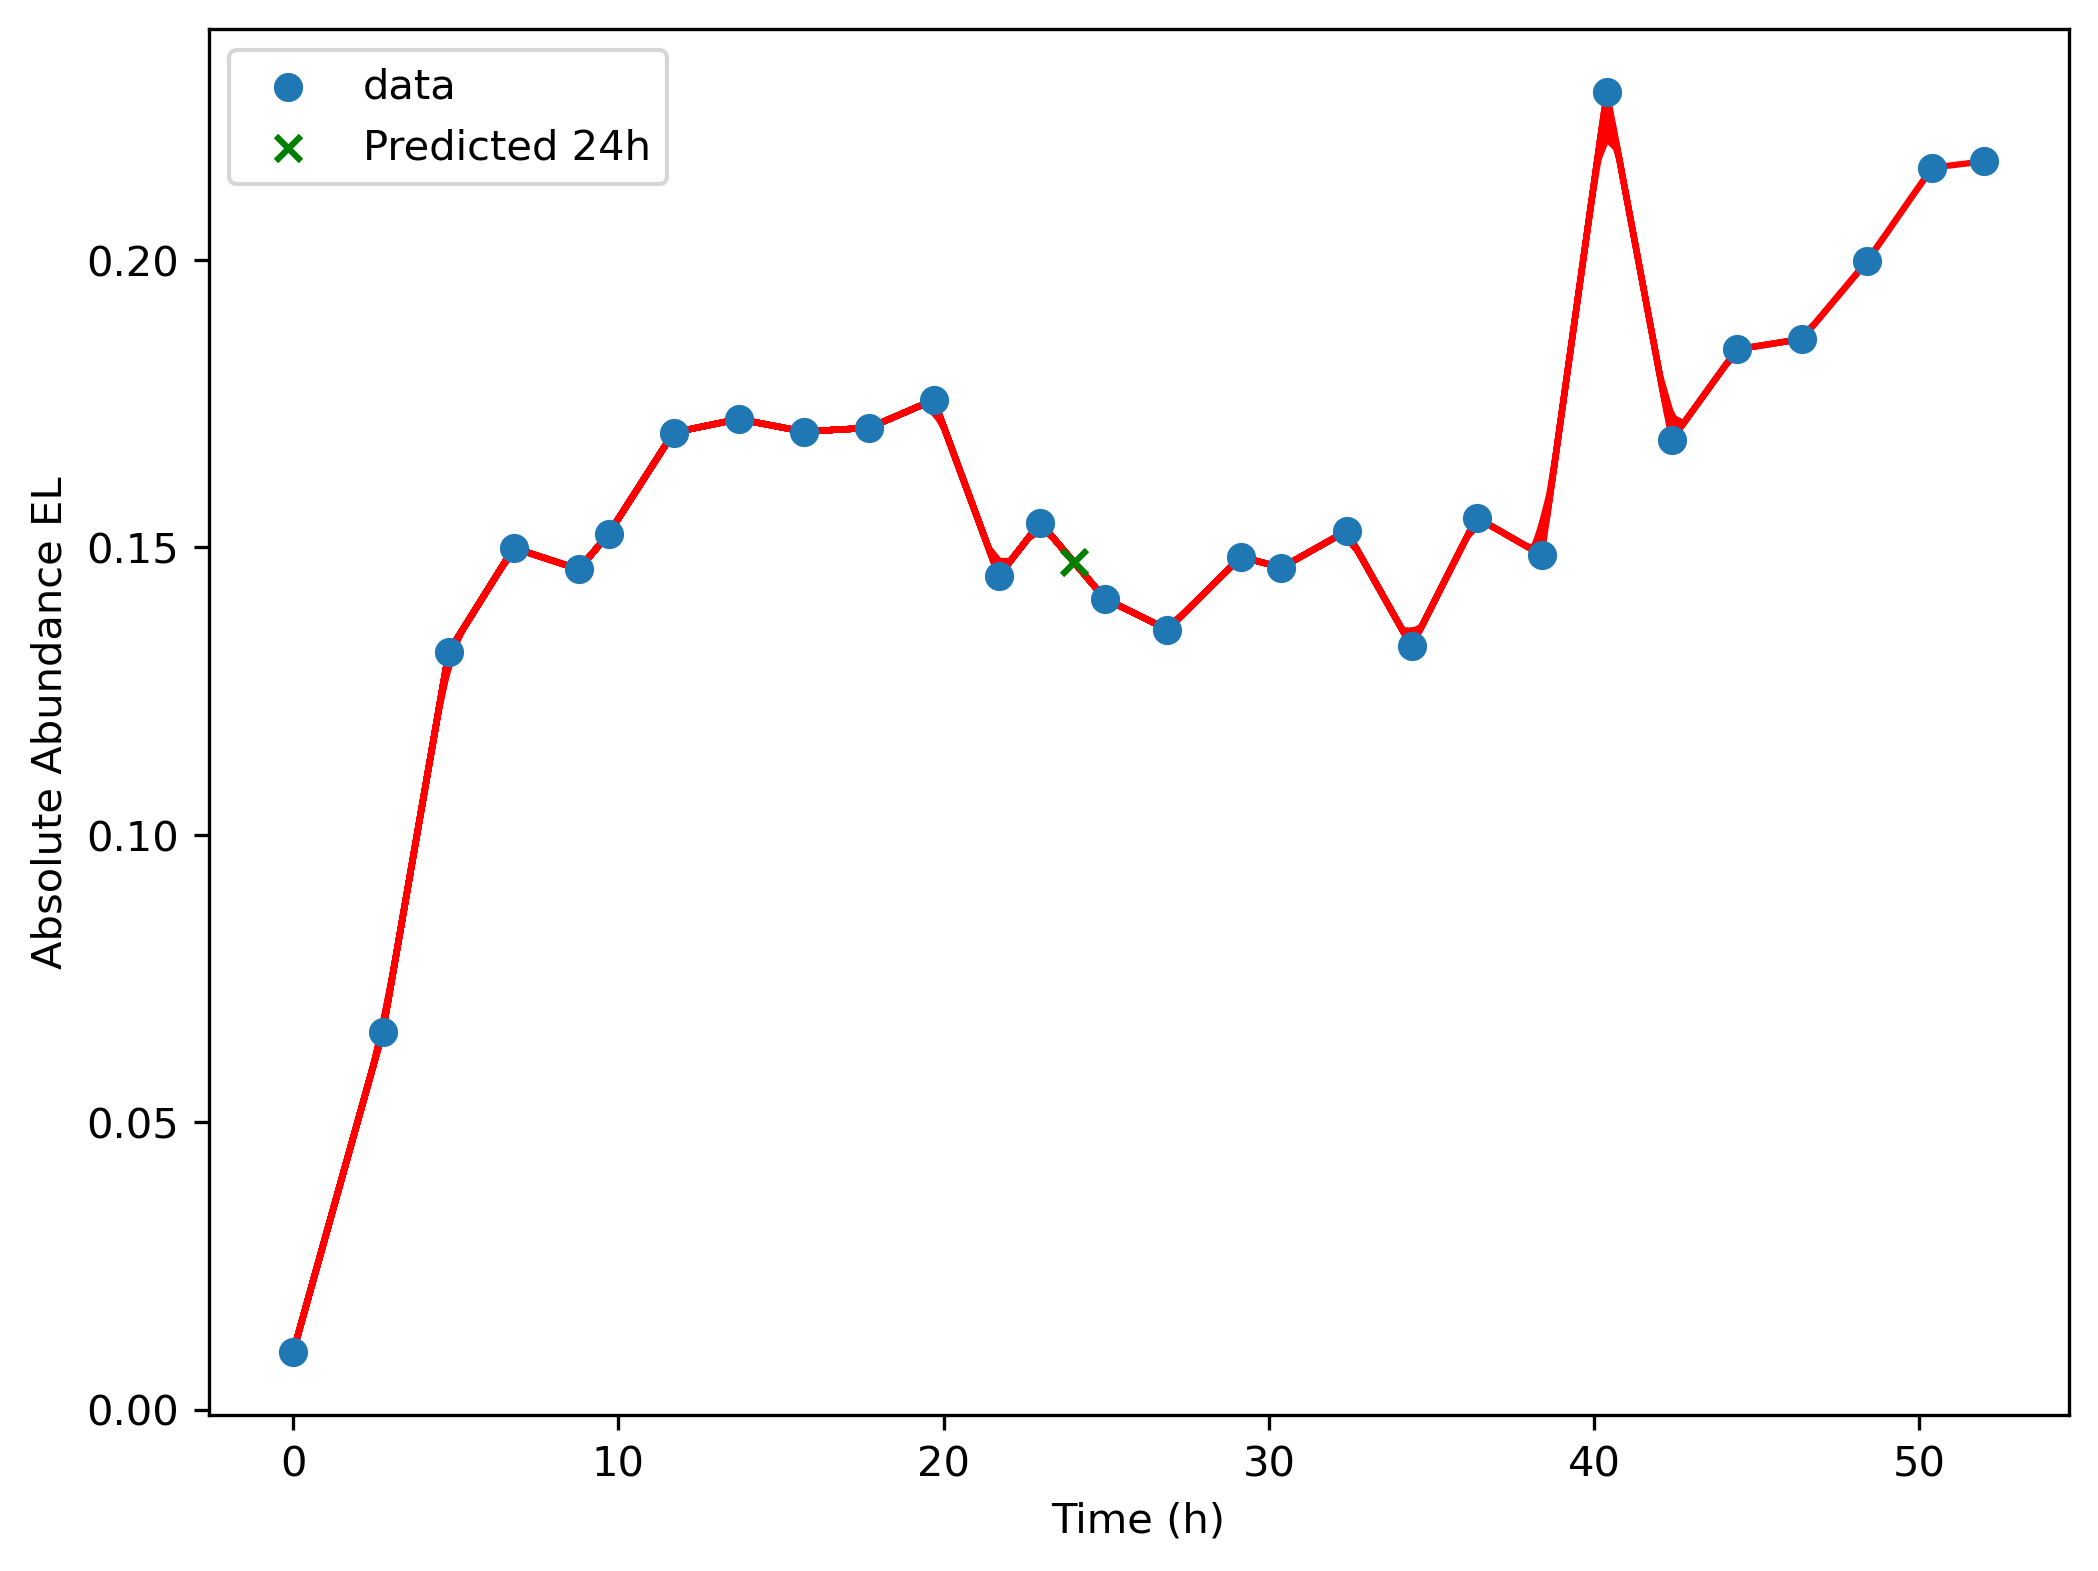

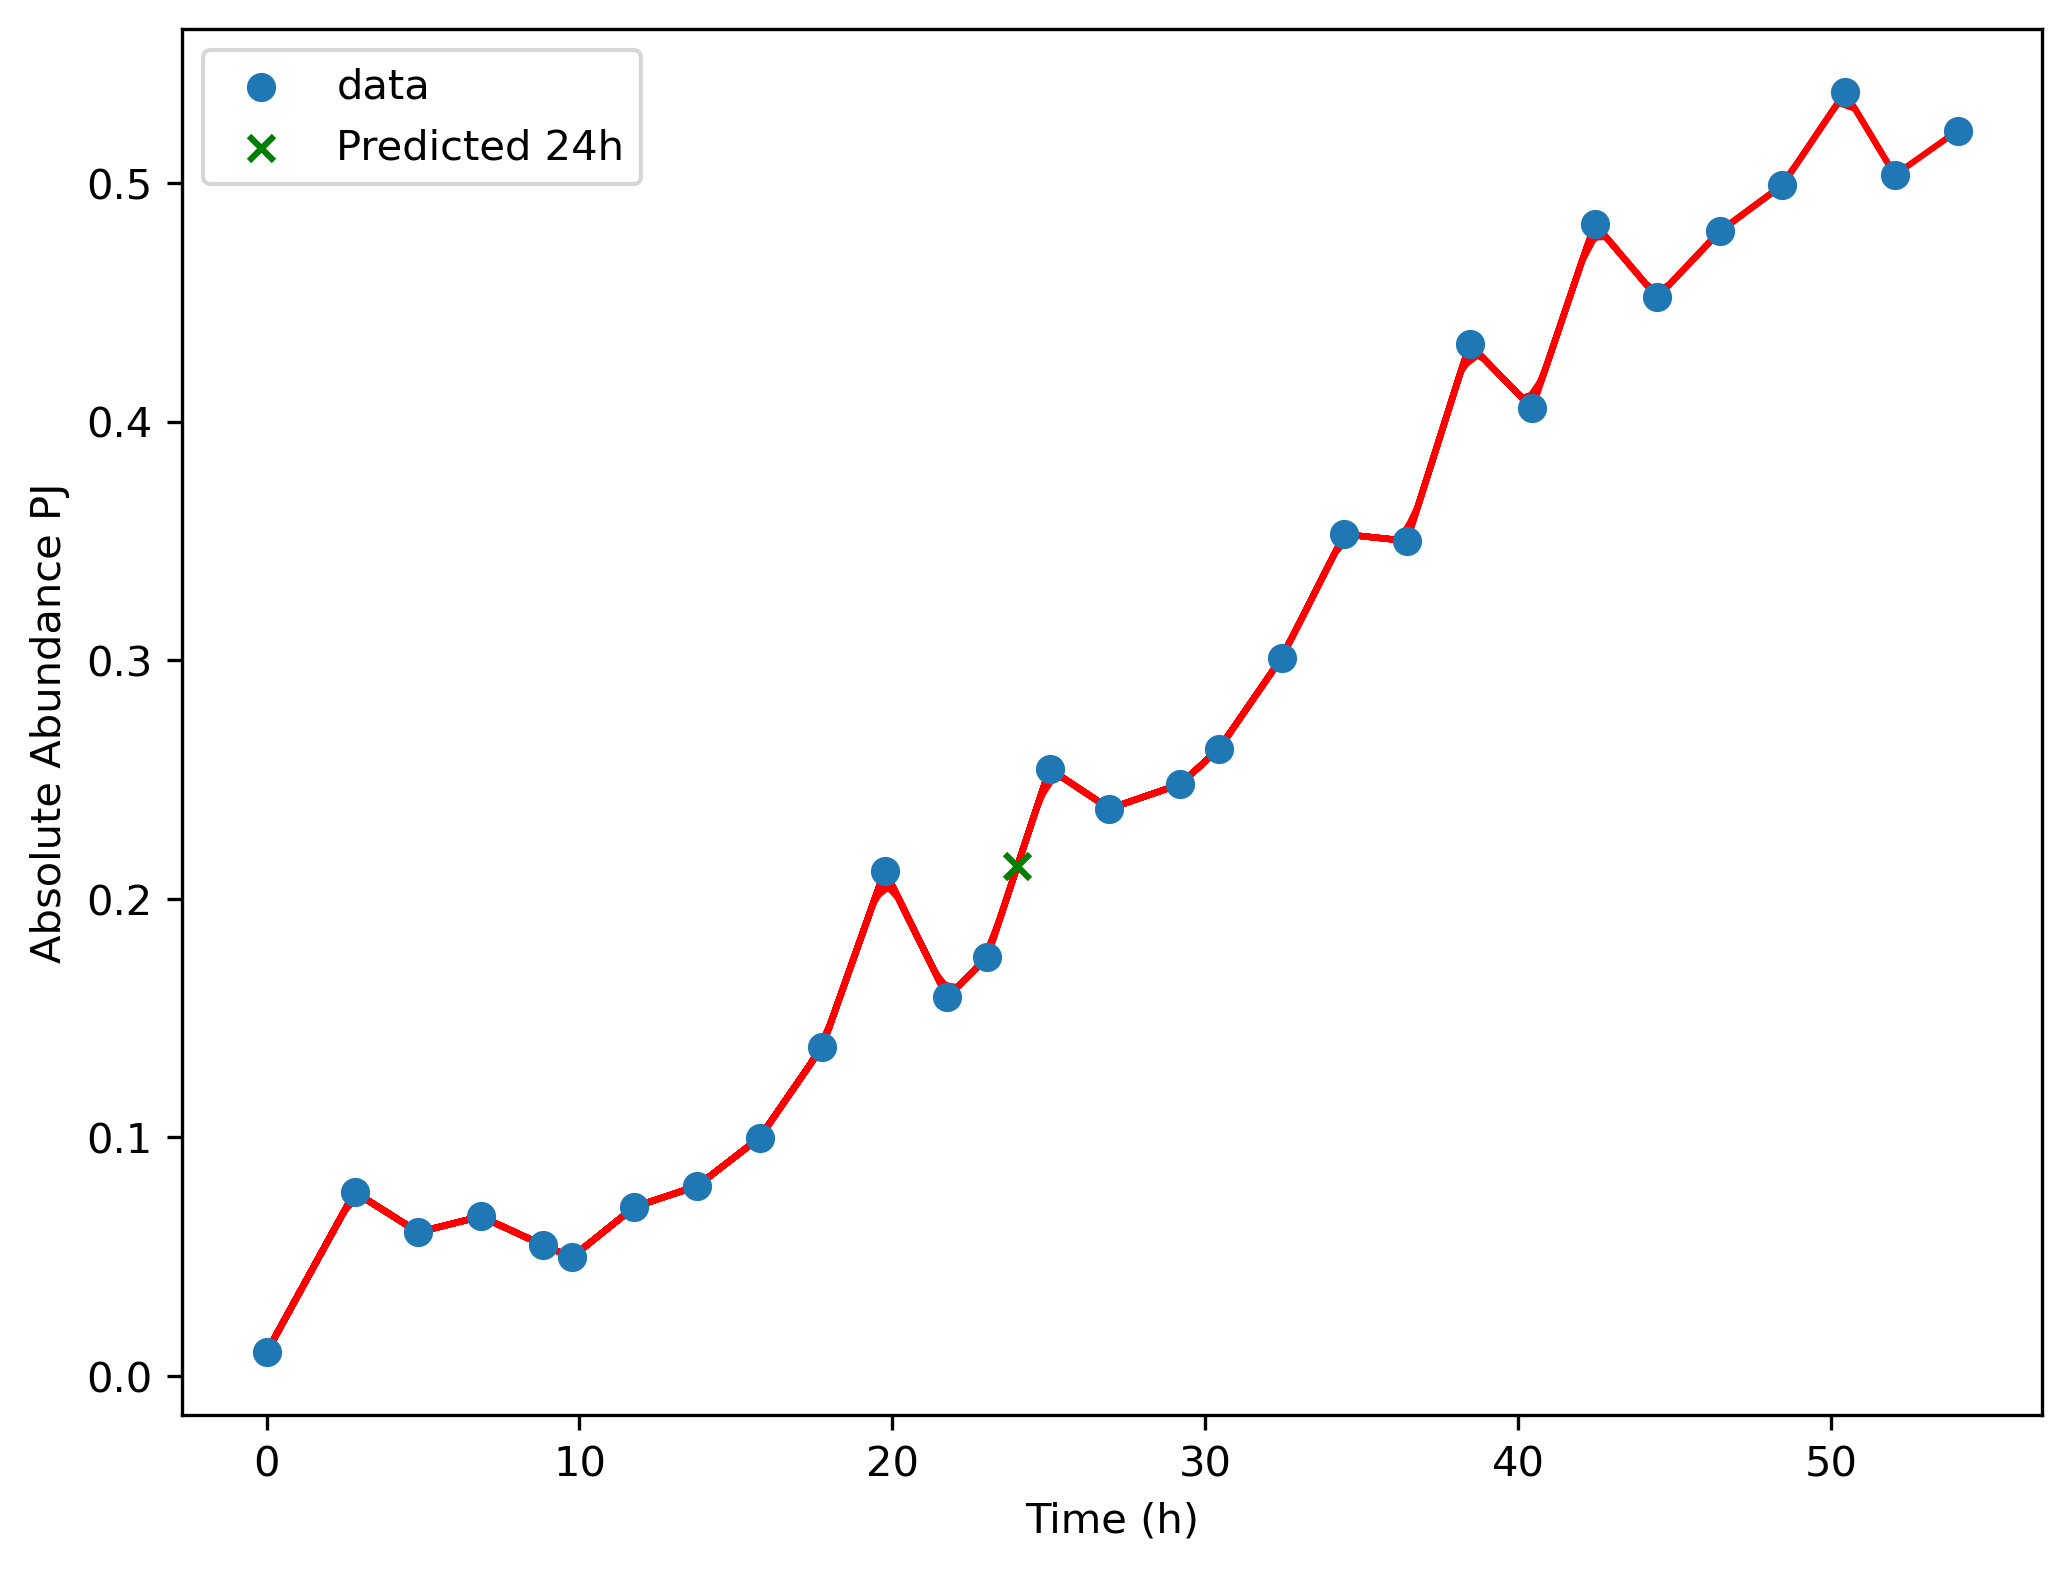

In [146]:
inulin_df = pd.read_csv('Data/inulin_full.csv')
inulin_df = inulin_df.rename(columns={
    'S1': 'PJ',
    'S2': 'BV',
    'S3': 'AC',
    'S4': 'DP',
    'S5': 'BT',
    'S6': 'DL',
    'S7': 'BH',
    'S8': 'BP',
    'S9': 'CS',
    'S10': 'EL'
})
conditions = inulin_df['Treatments'].unique()
dict_conditions = {}
for condition in conditions:
    inu_cond = inulin_df[inulin_df['Treatments'] == condition]
    min_t = inu_cond['Time'].min()
    max_t = inu_cond['Time'].max()
    if max_t < 24:
        print(f"Condition {condition} has a max time of {max_t}h, which is less than 24h.")
        continue
    if min_t > 0:
        print(f"Condition {condition} has a min time of {min_t}h, which is greater than 0h.")
        continue
    if max_t == 24 and min_t == 0:
        dict_conditions[condition] = inu_cond[(inu_cond['Time'] == 0) | (inu_cond['Time'] == 24)].reset_index(drop=True)    
    else:
        # these are the monoculture conditions
        mono = condition[-2:]
        growth = inu_cond[mono]
        time = inu_cond['Time']
        # interpolate to get 24
        at_0 = inu_cond[inu_cond['Time'] == 0]
        interpolate = spi.make_interp_spline(
            time, growth, k = 1)
        fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
        time_sim = np.linspace(0, time, 100)
        pred_24 = interpolate(24)
        ax.scatter(time, growth, zorder = 2, label='data')  
        ax.plot(time_sim, interpolate(time_sim), color='red', zorder = 1)
        ax.scatter(24, pred_24,  color='green', marker='x', zorder = 3, label = 'Predicted 24h')
        ax.legend()
        ax.set_xlabel('Time (h)')
        ax.set_ylabel(f'Absolute Abundance {mono}')
        cond_024 = inu_cond[inu_cond['Time'] == 0]
        pred_24 = cond_024.copy().reset_index(drop=True)
        pred_24['Time'] = 24
        pred_24['Treatments'] = condition
        pred_24[mono] = interpolate(24)
        cond_024 = pd.concat([cond_024, pred_24], axis=0)
        cond_024 = cond_024.reset_index(drop=True)
        dict_conditions[condition] = cond_024

df_inulin_treated = pd.concat(dict_conditions.values(), axis=0, ignore_index=True)
df_inulin_treated.to_csv('Data/inulin_treated.csv', index=False)

# Laminarin

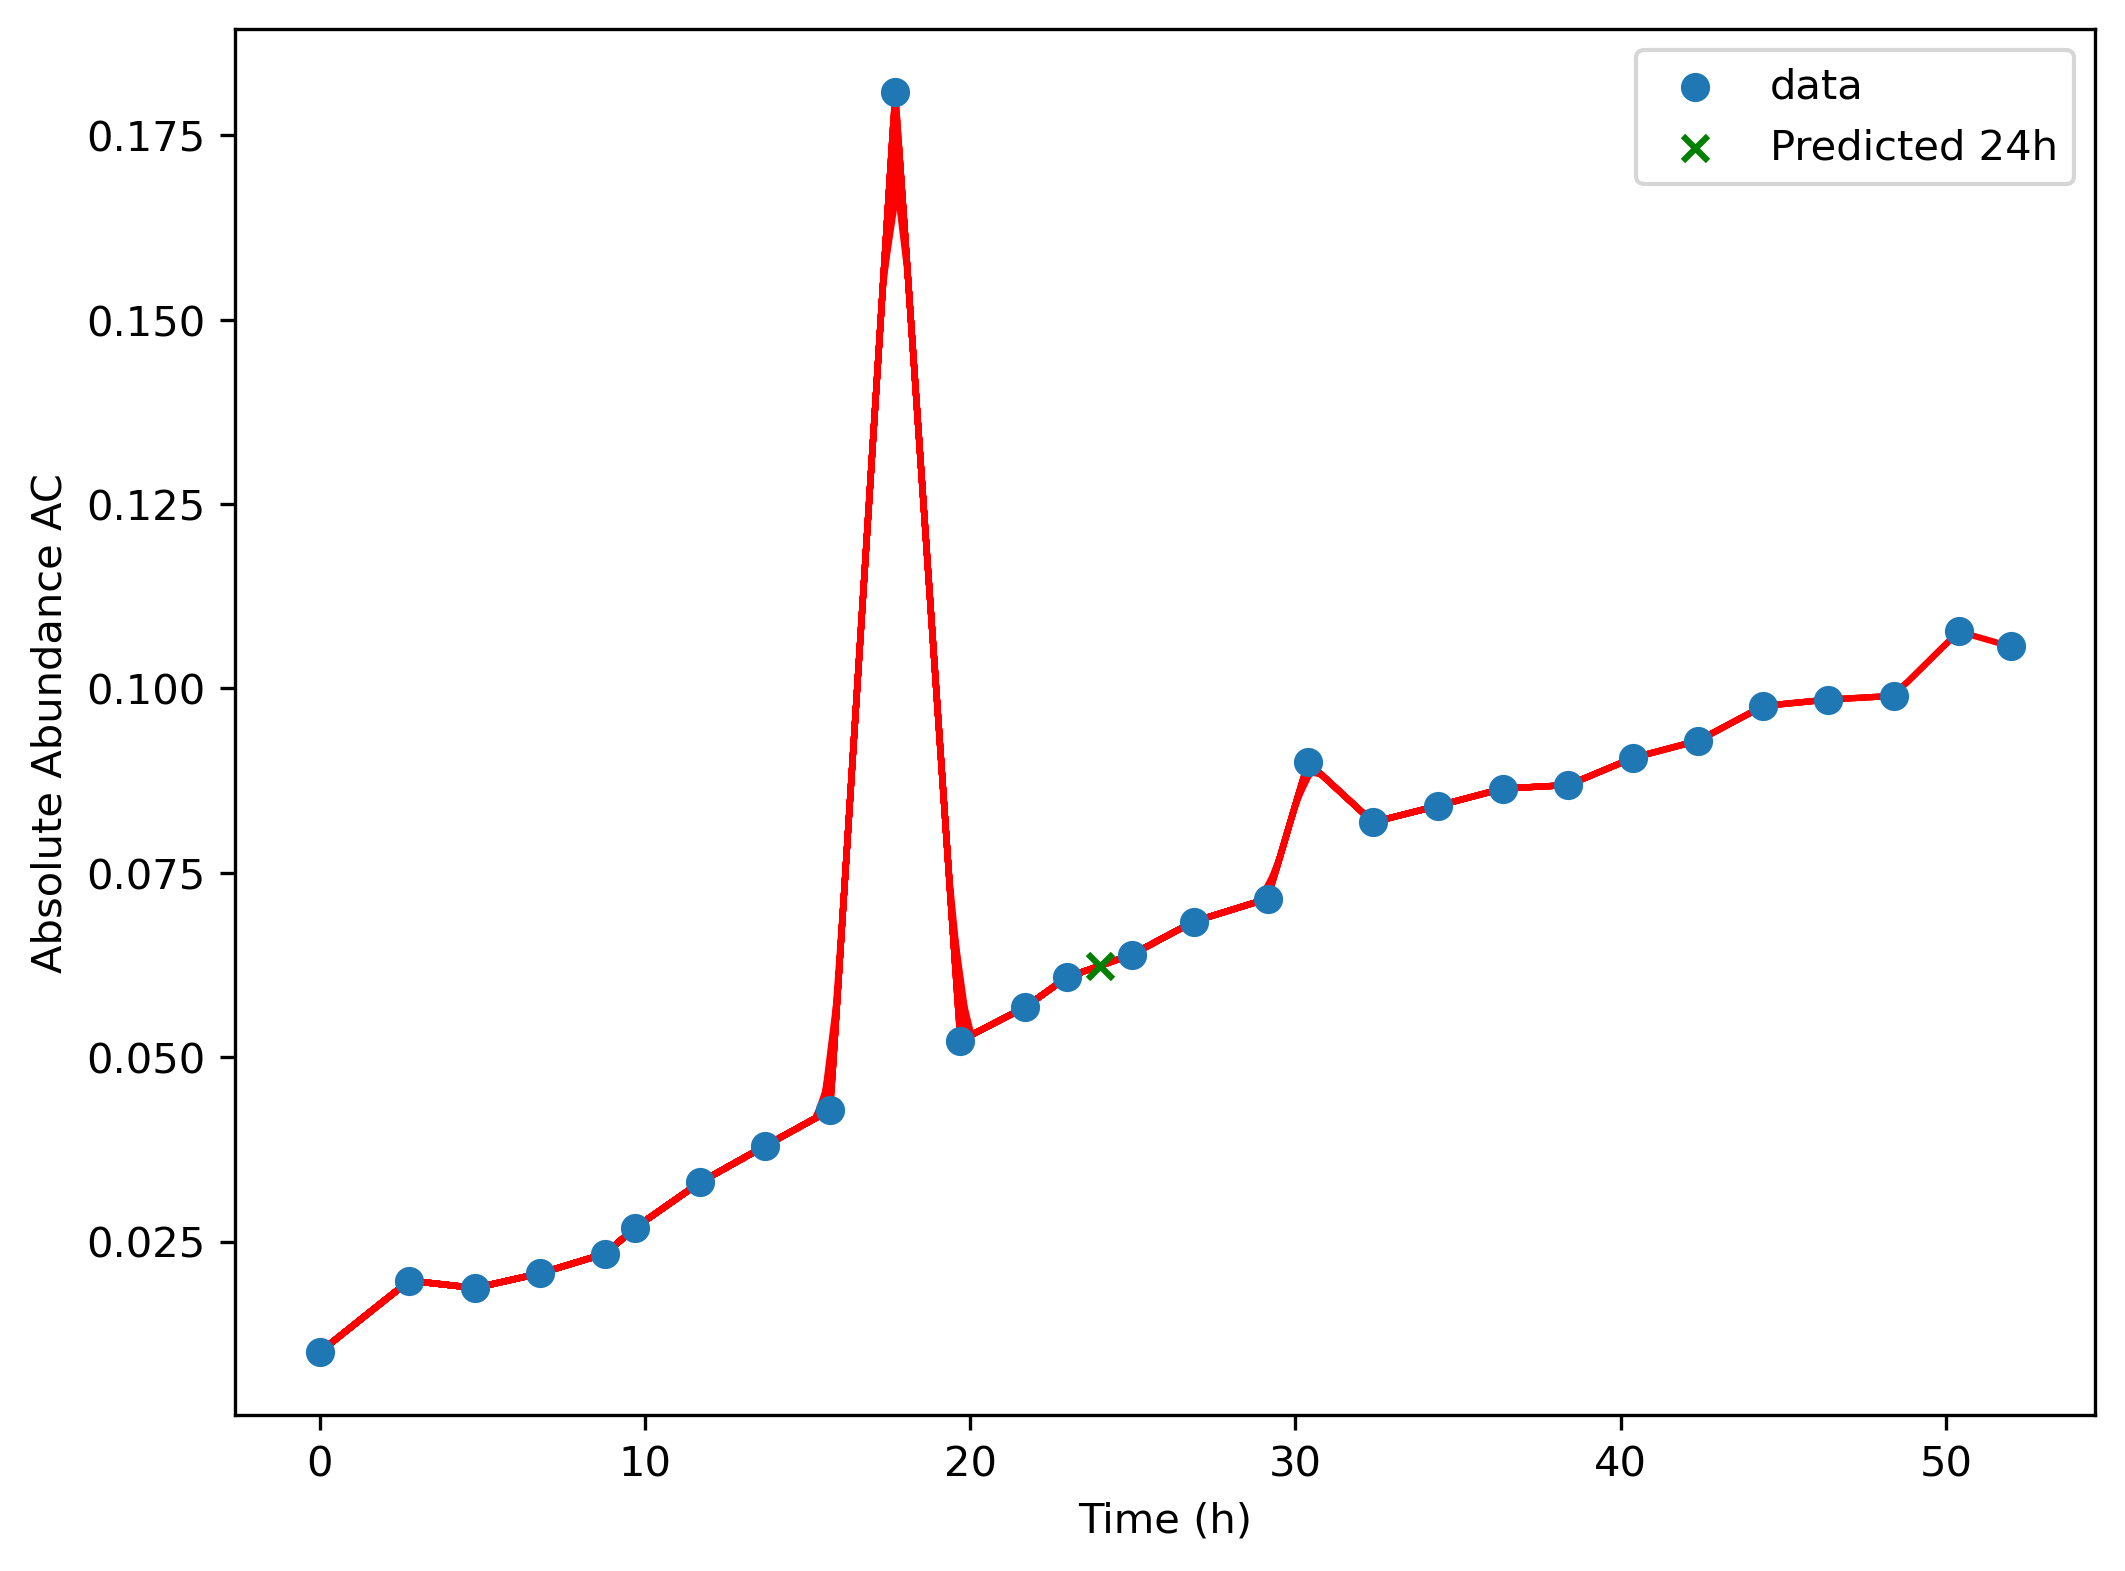

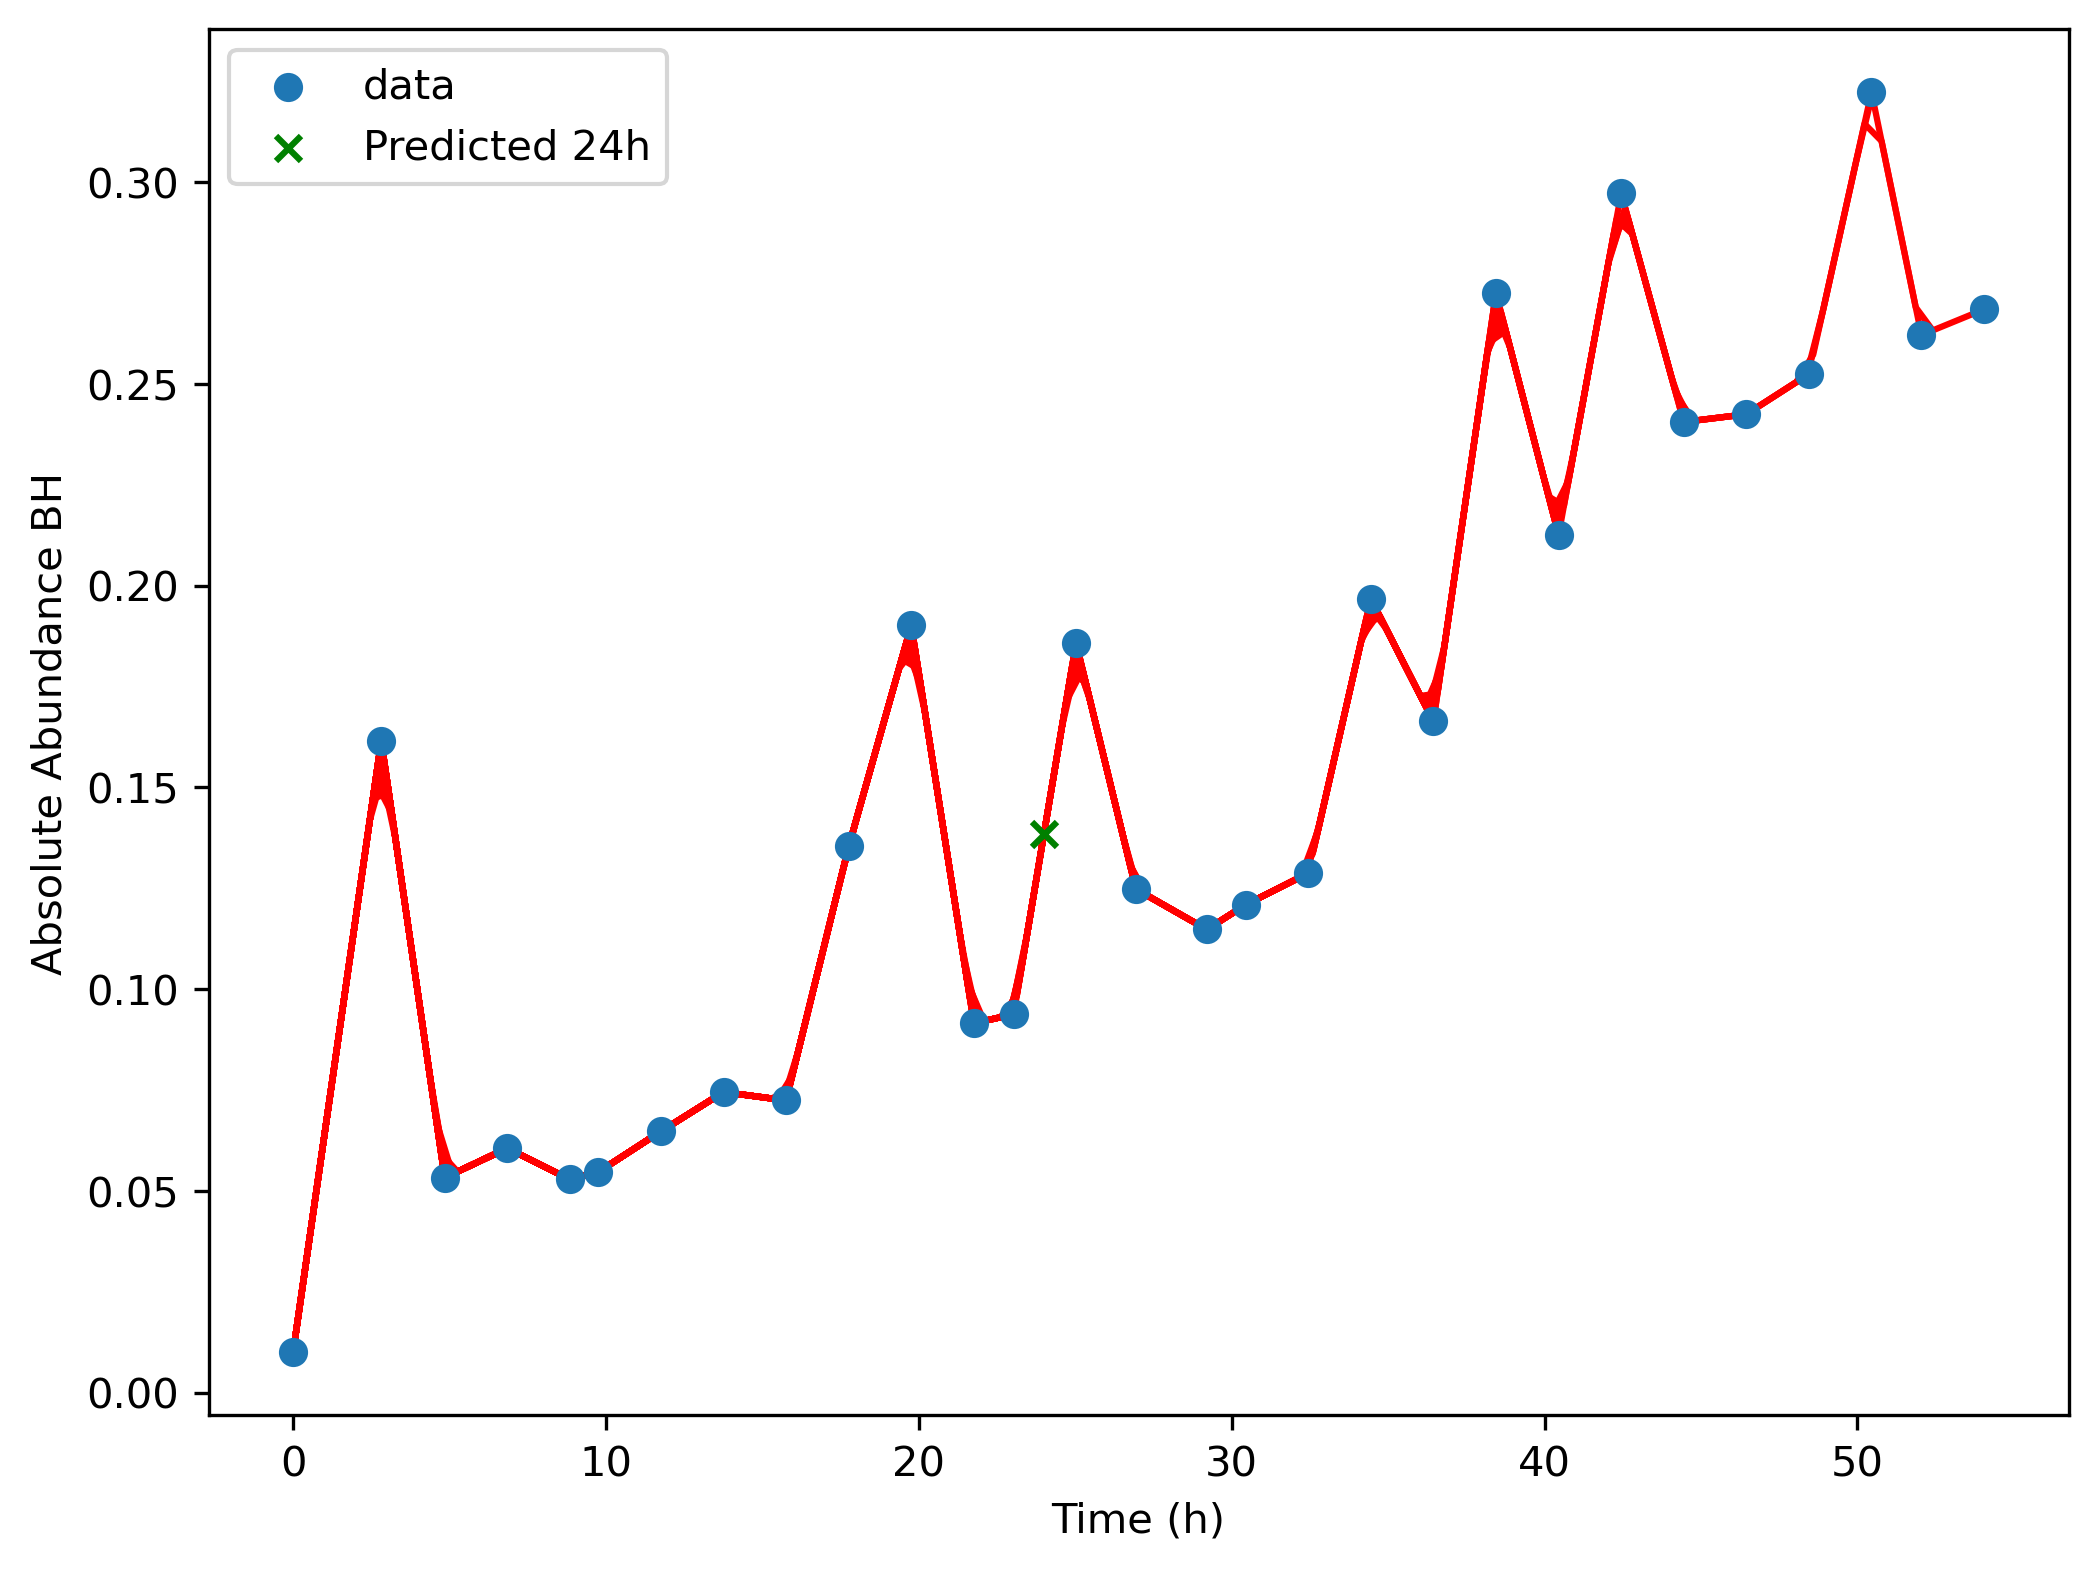

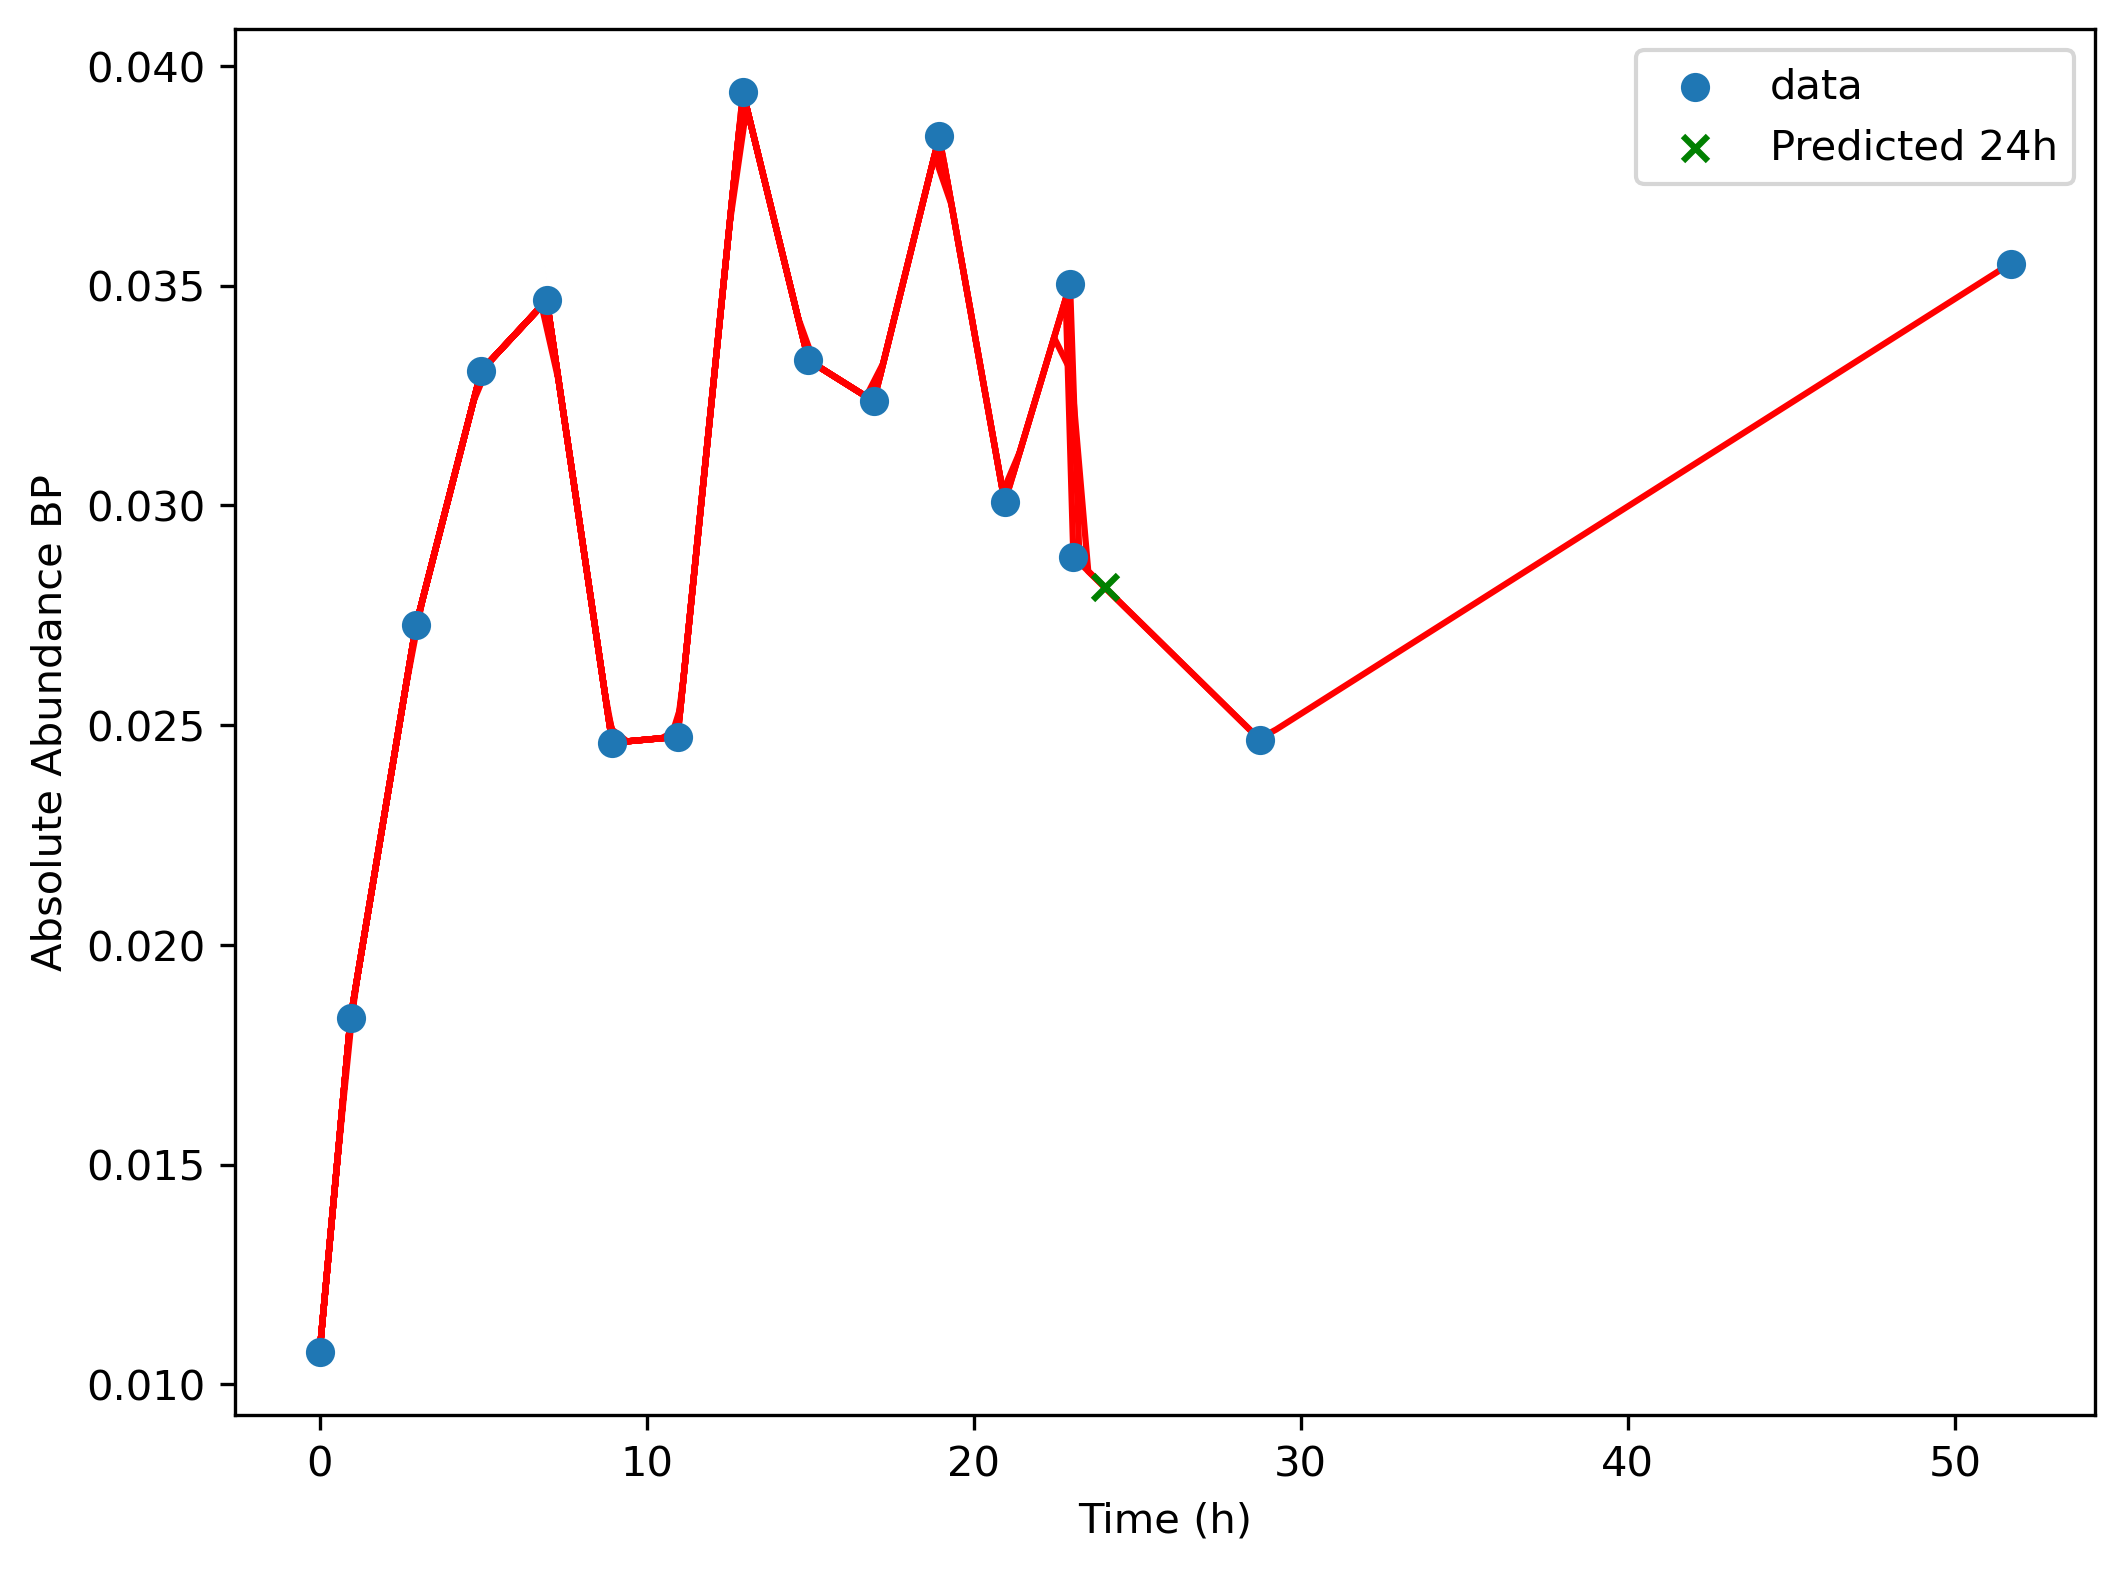

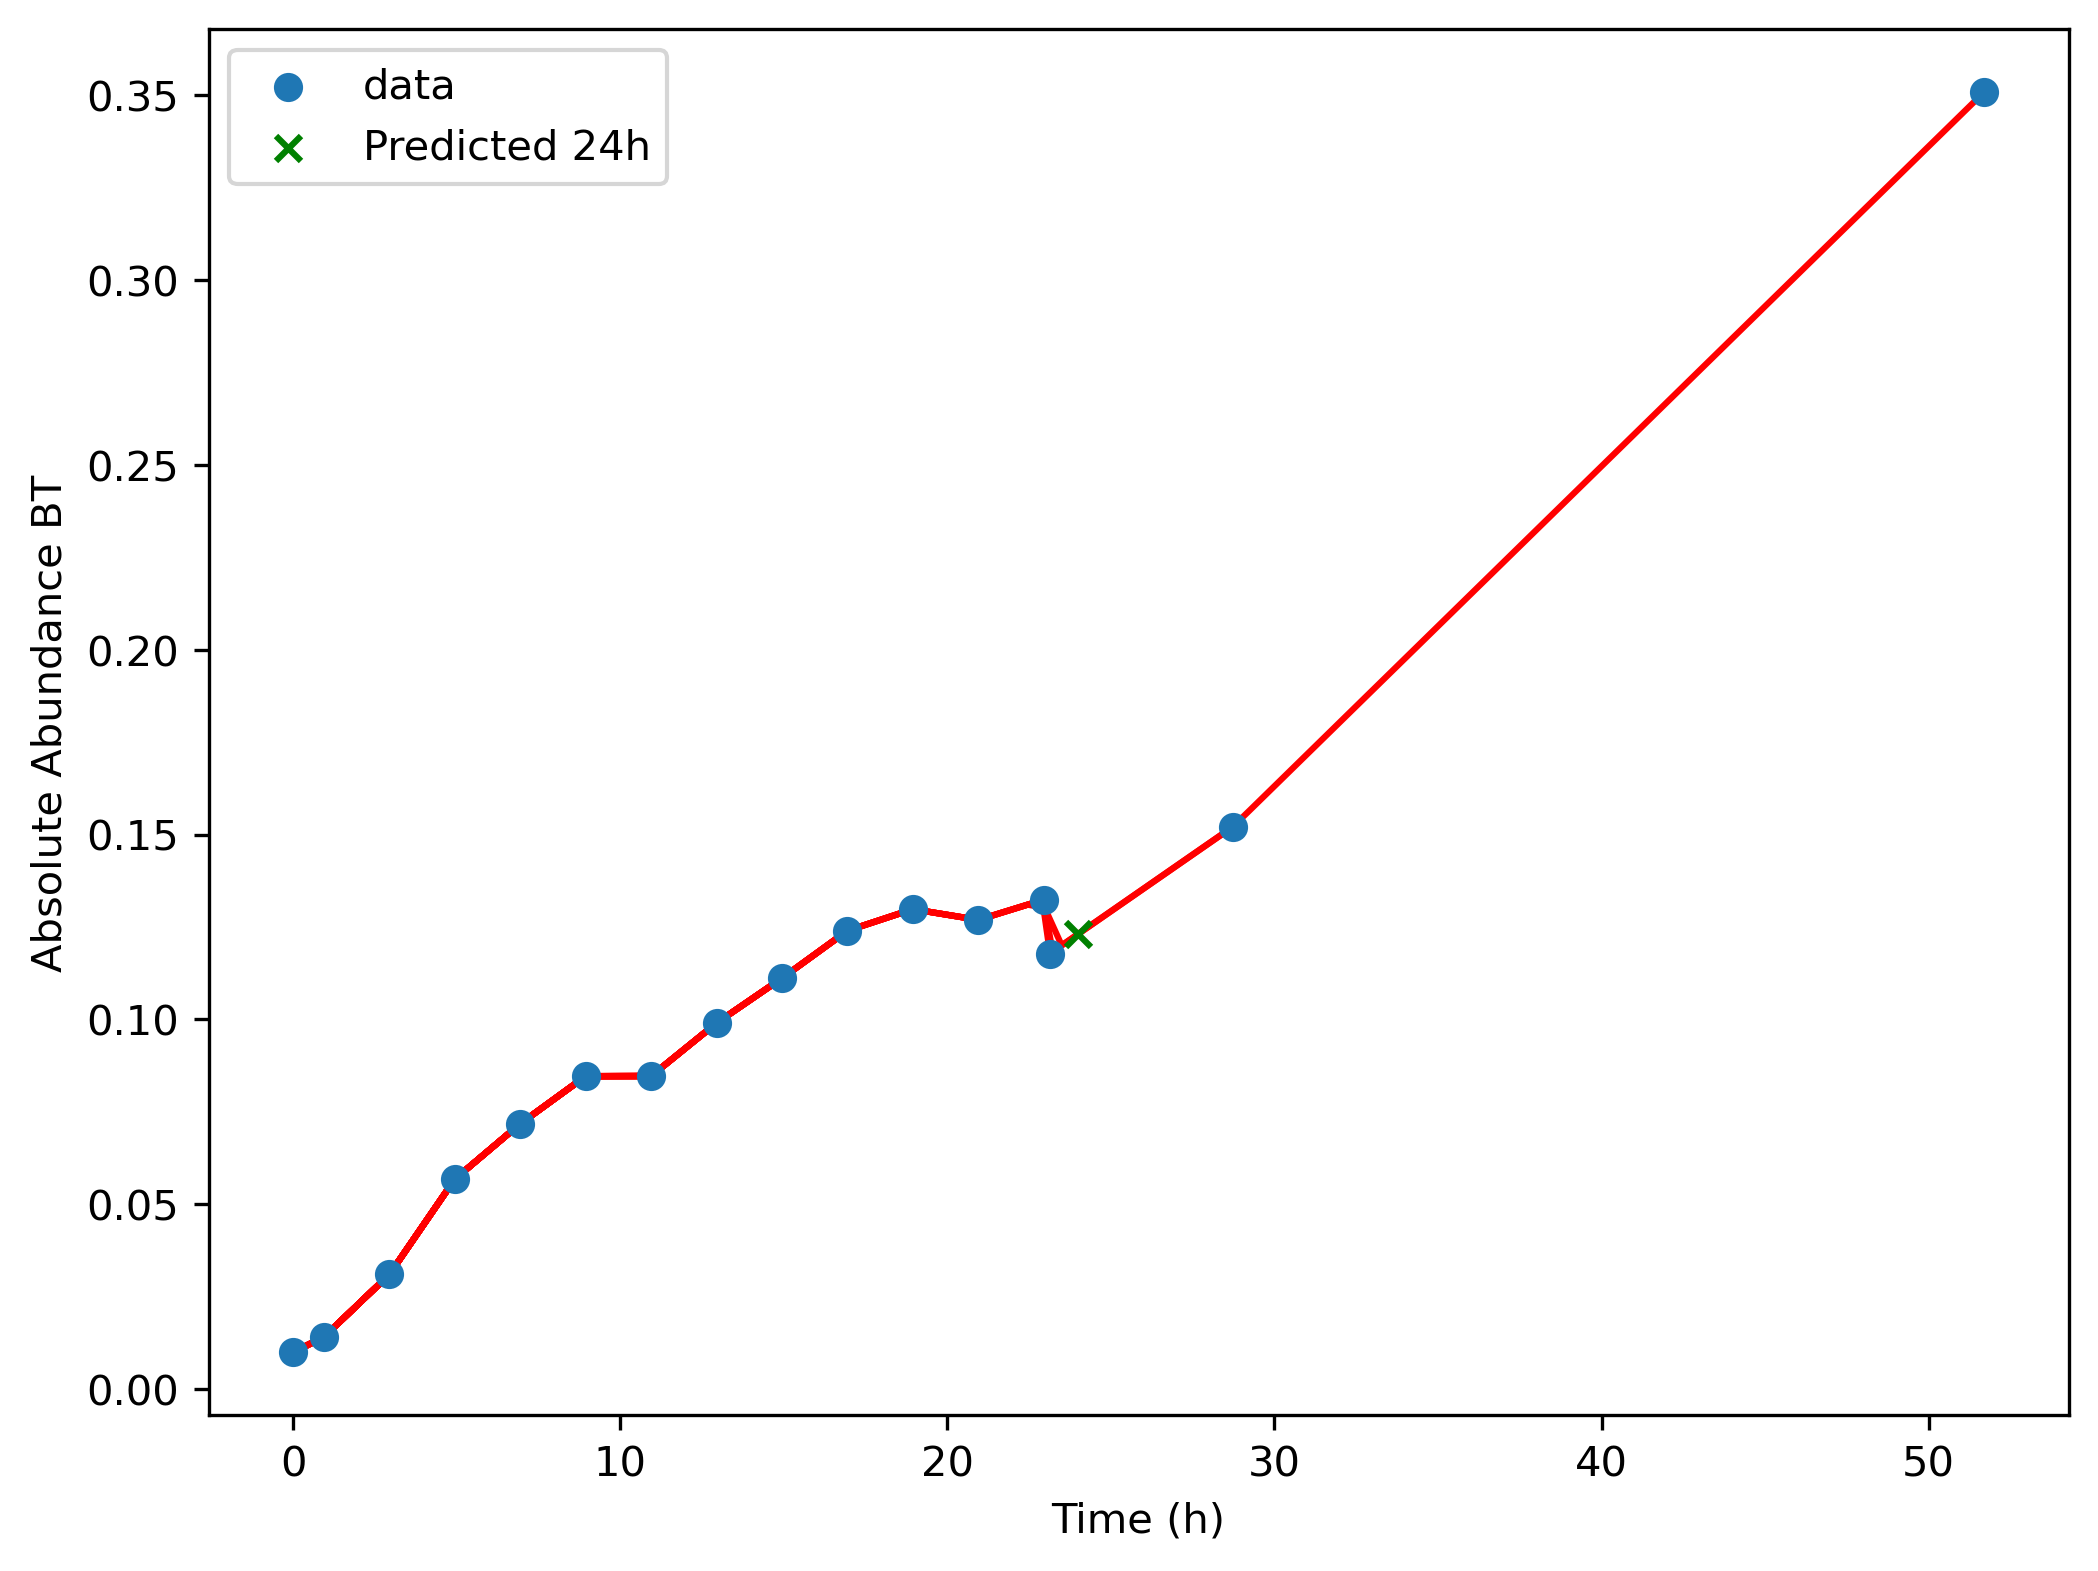

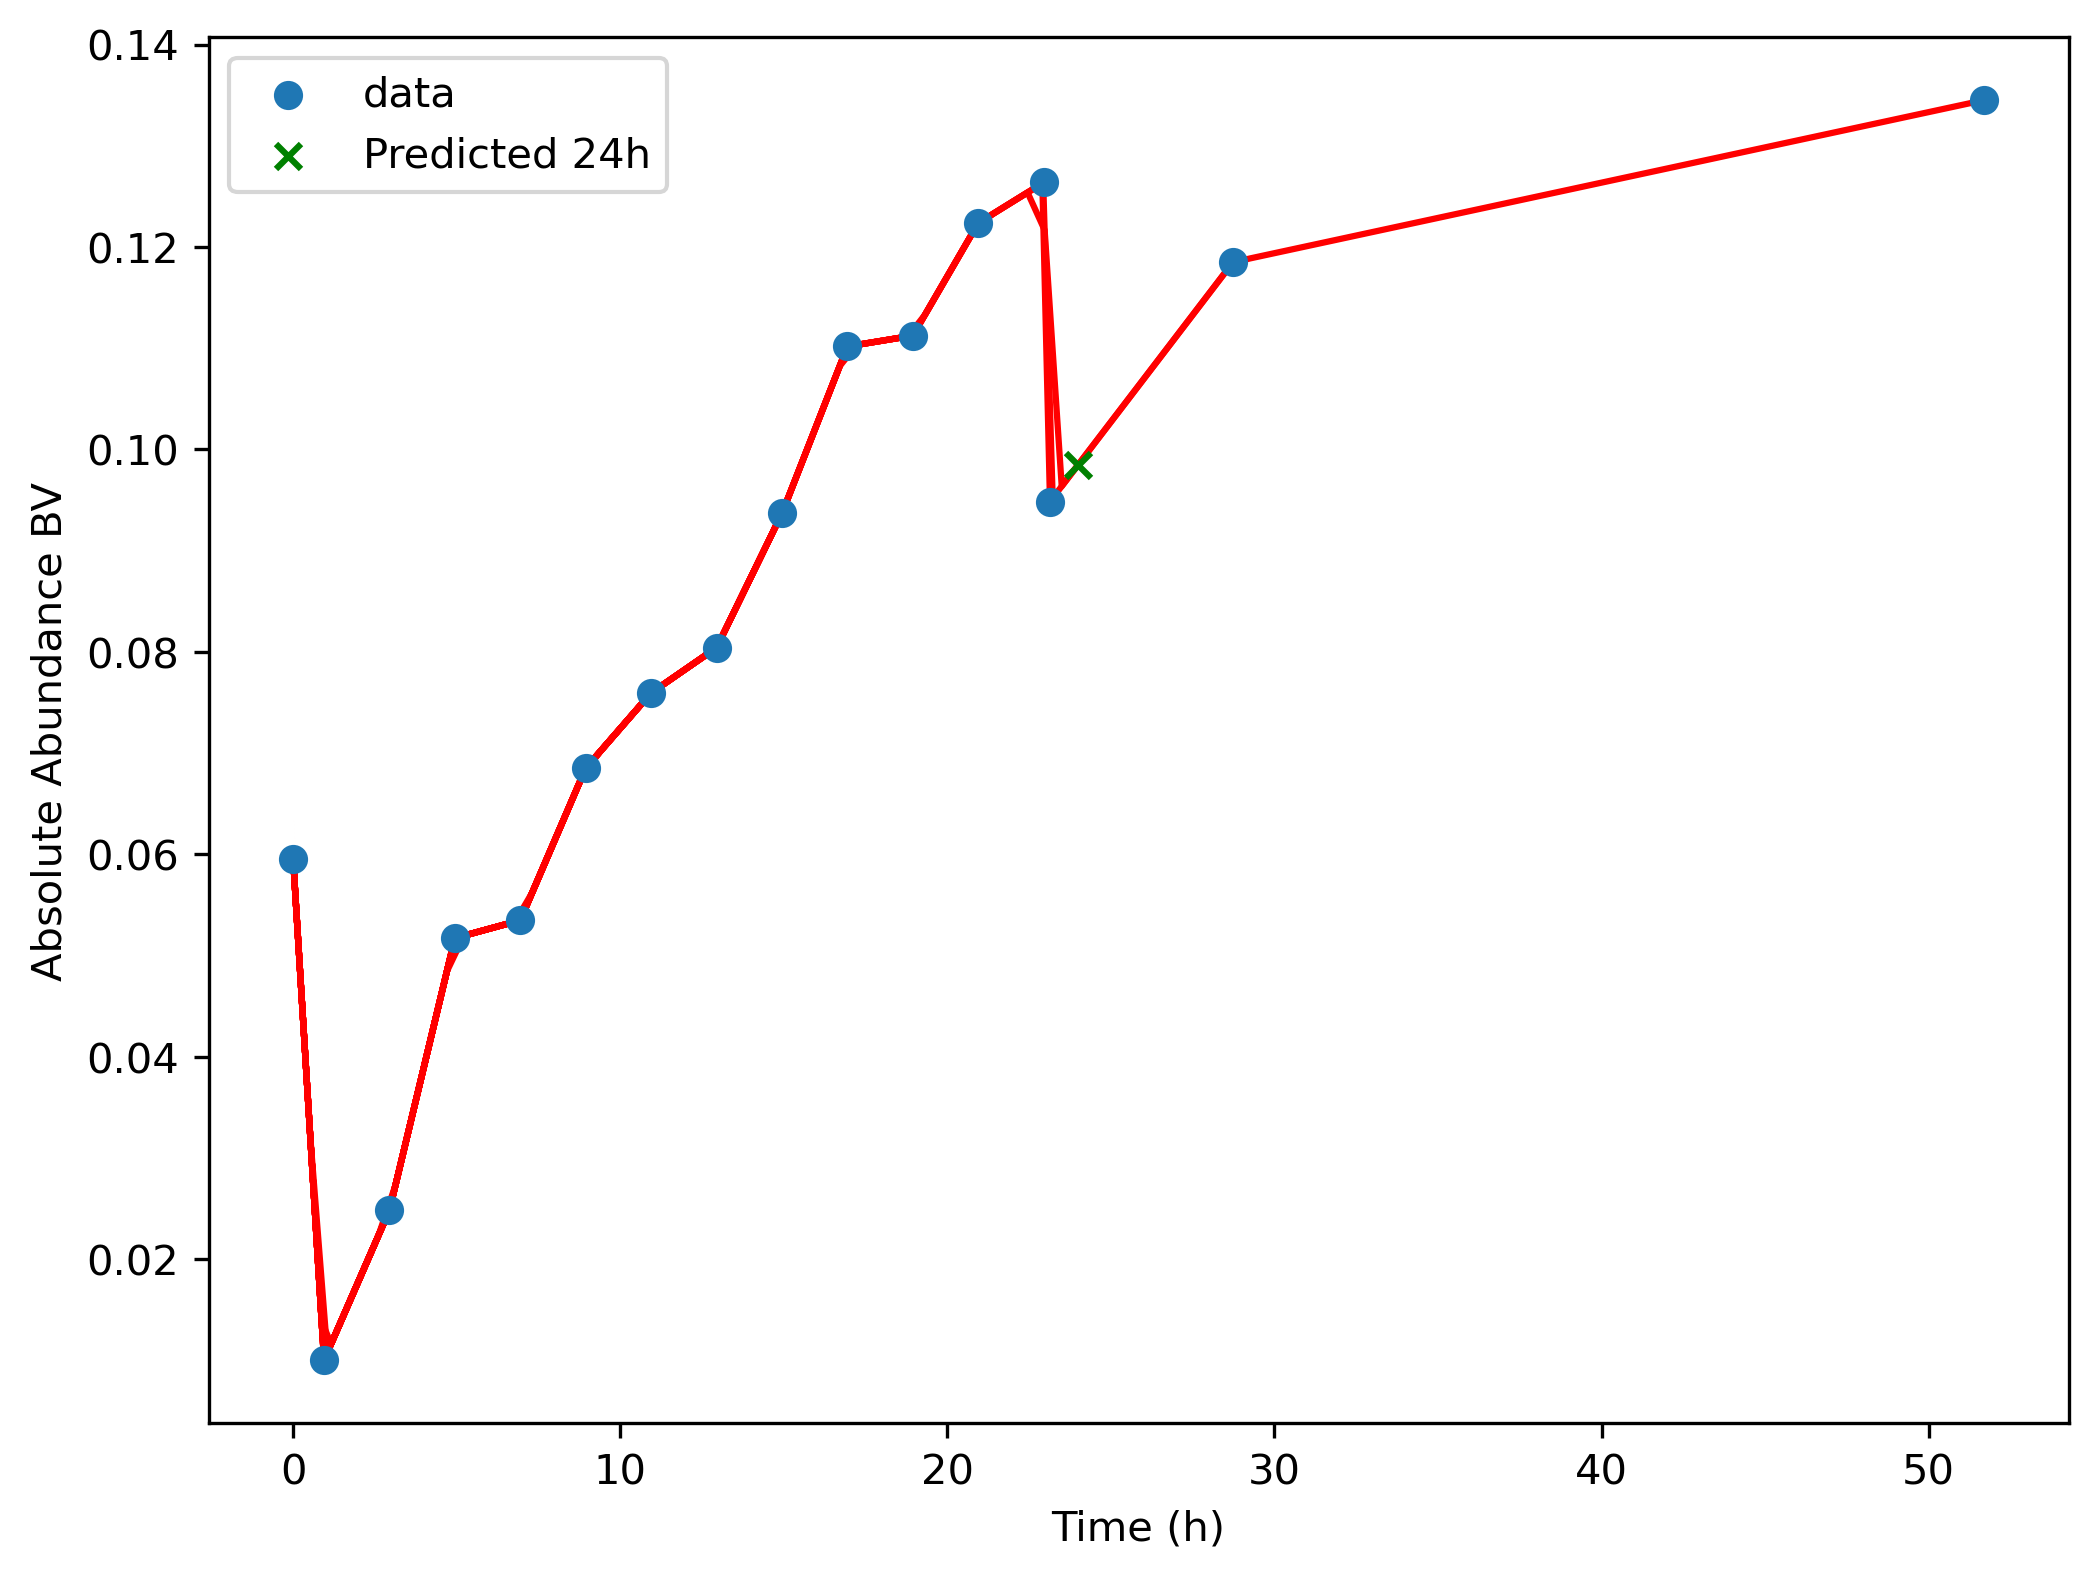

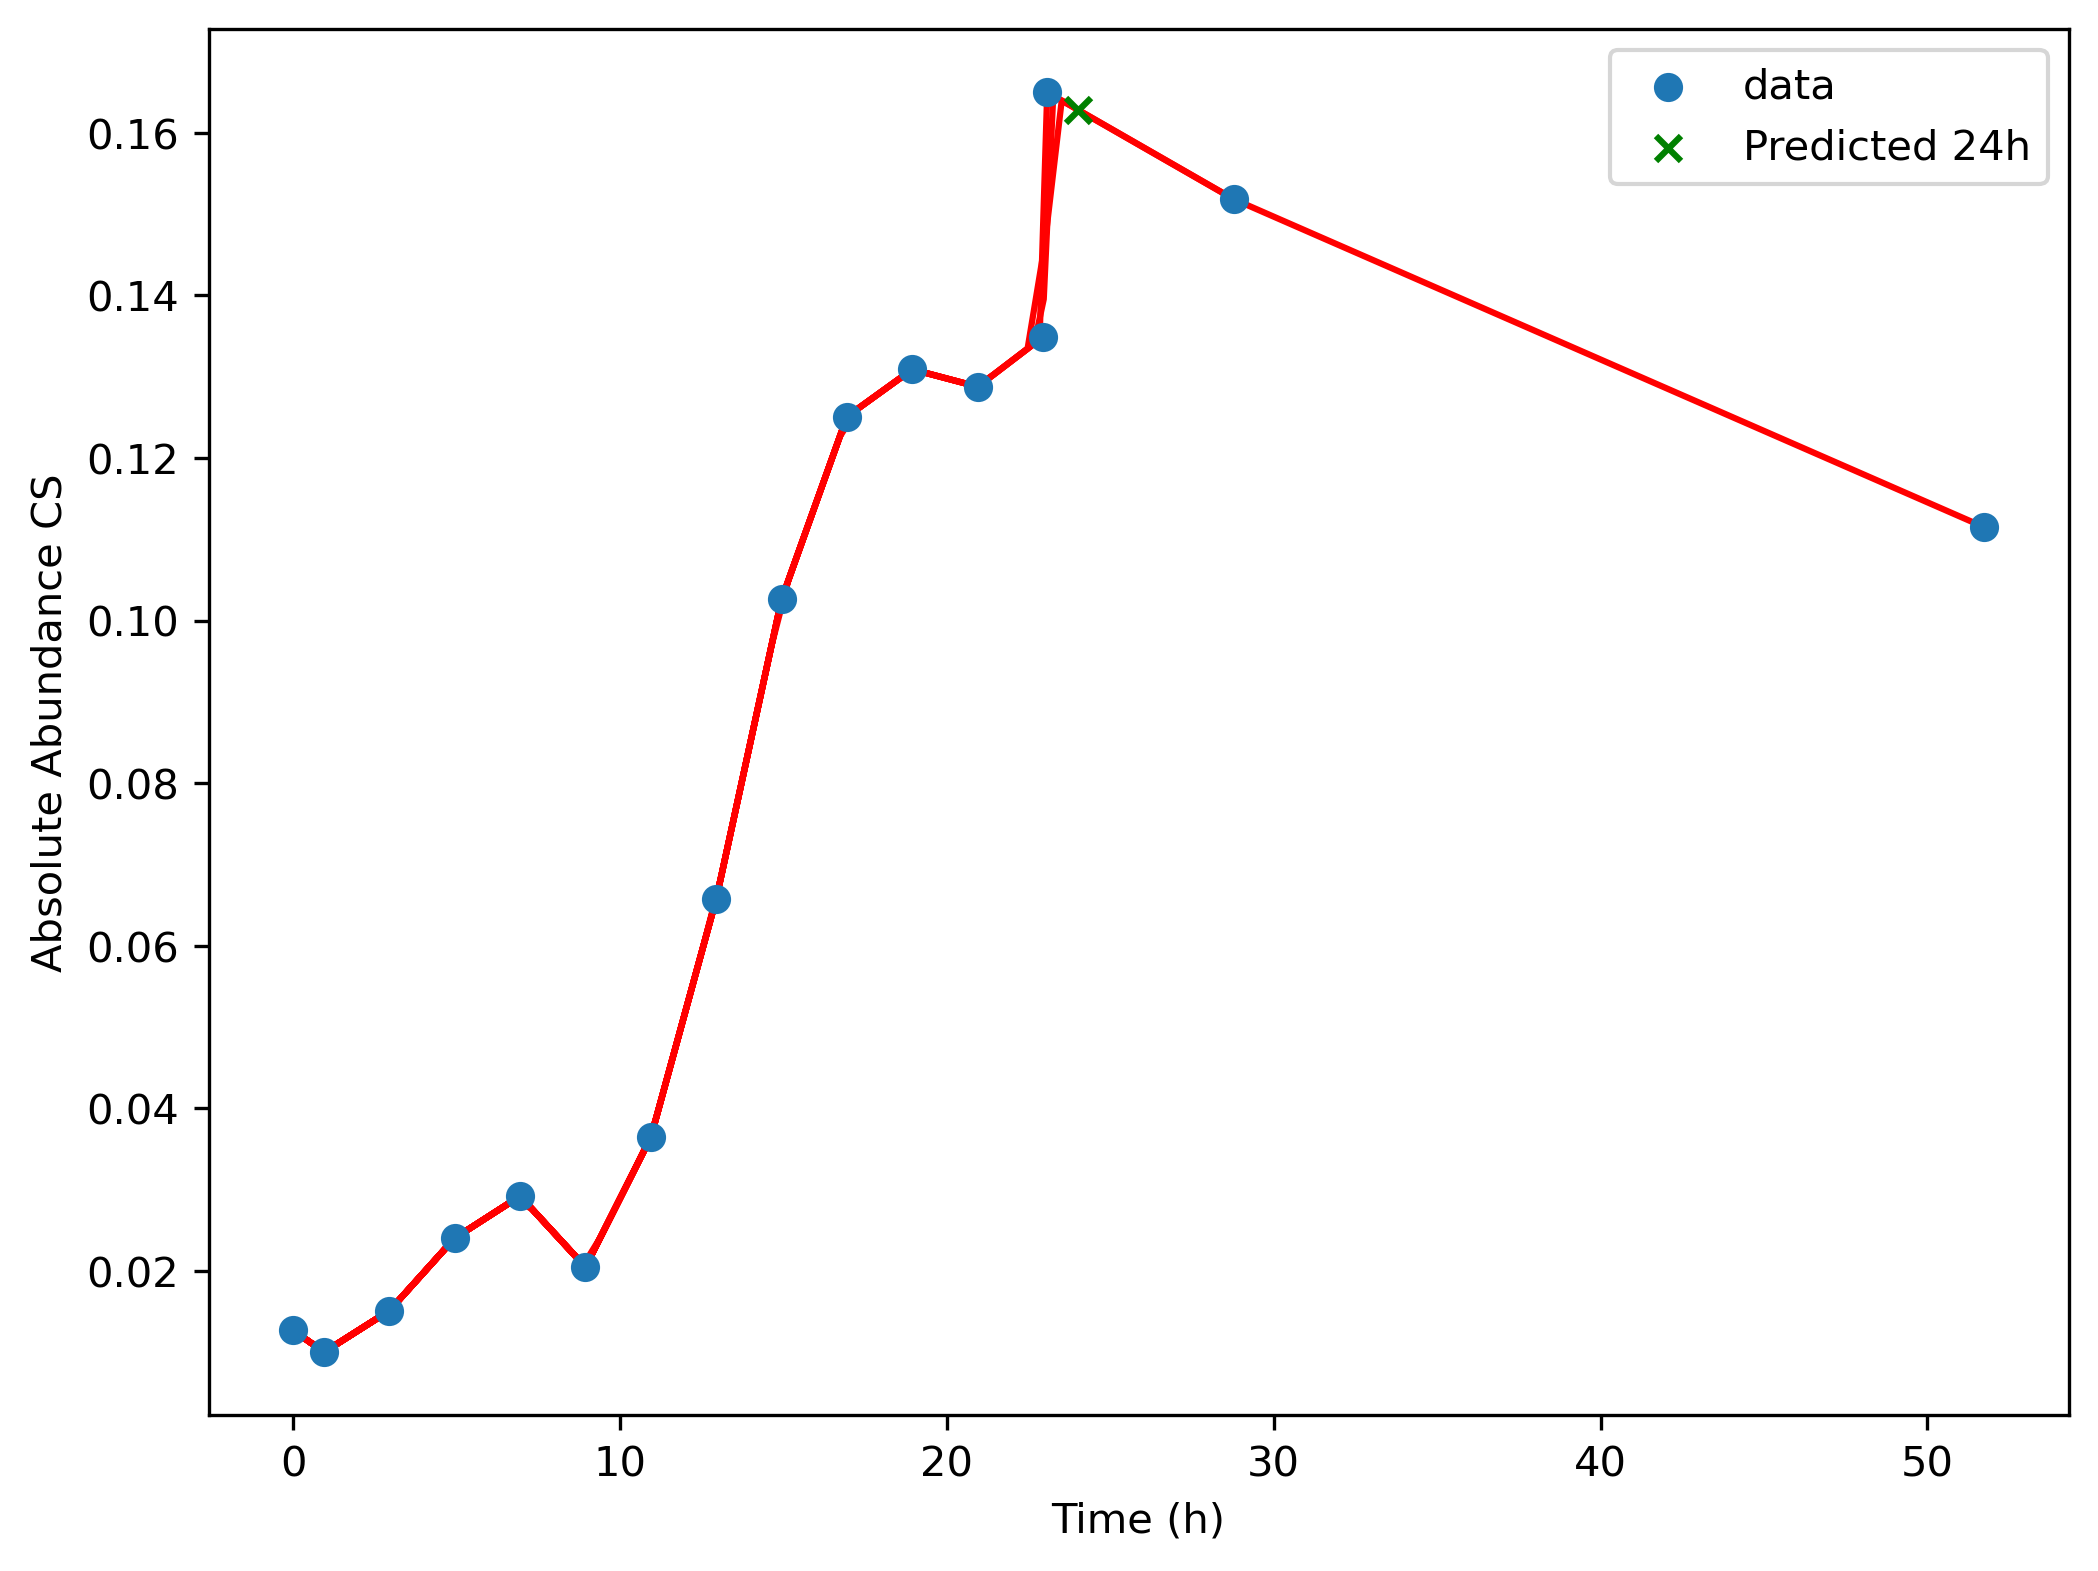

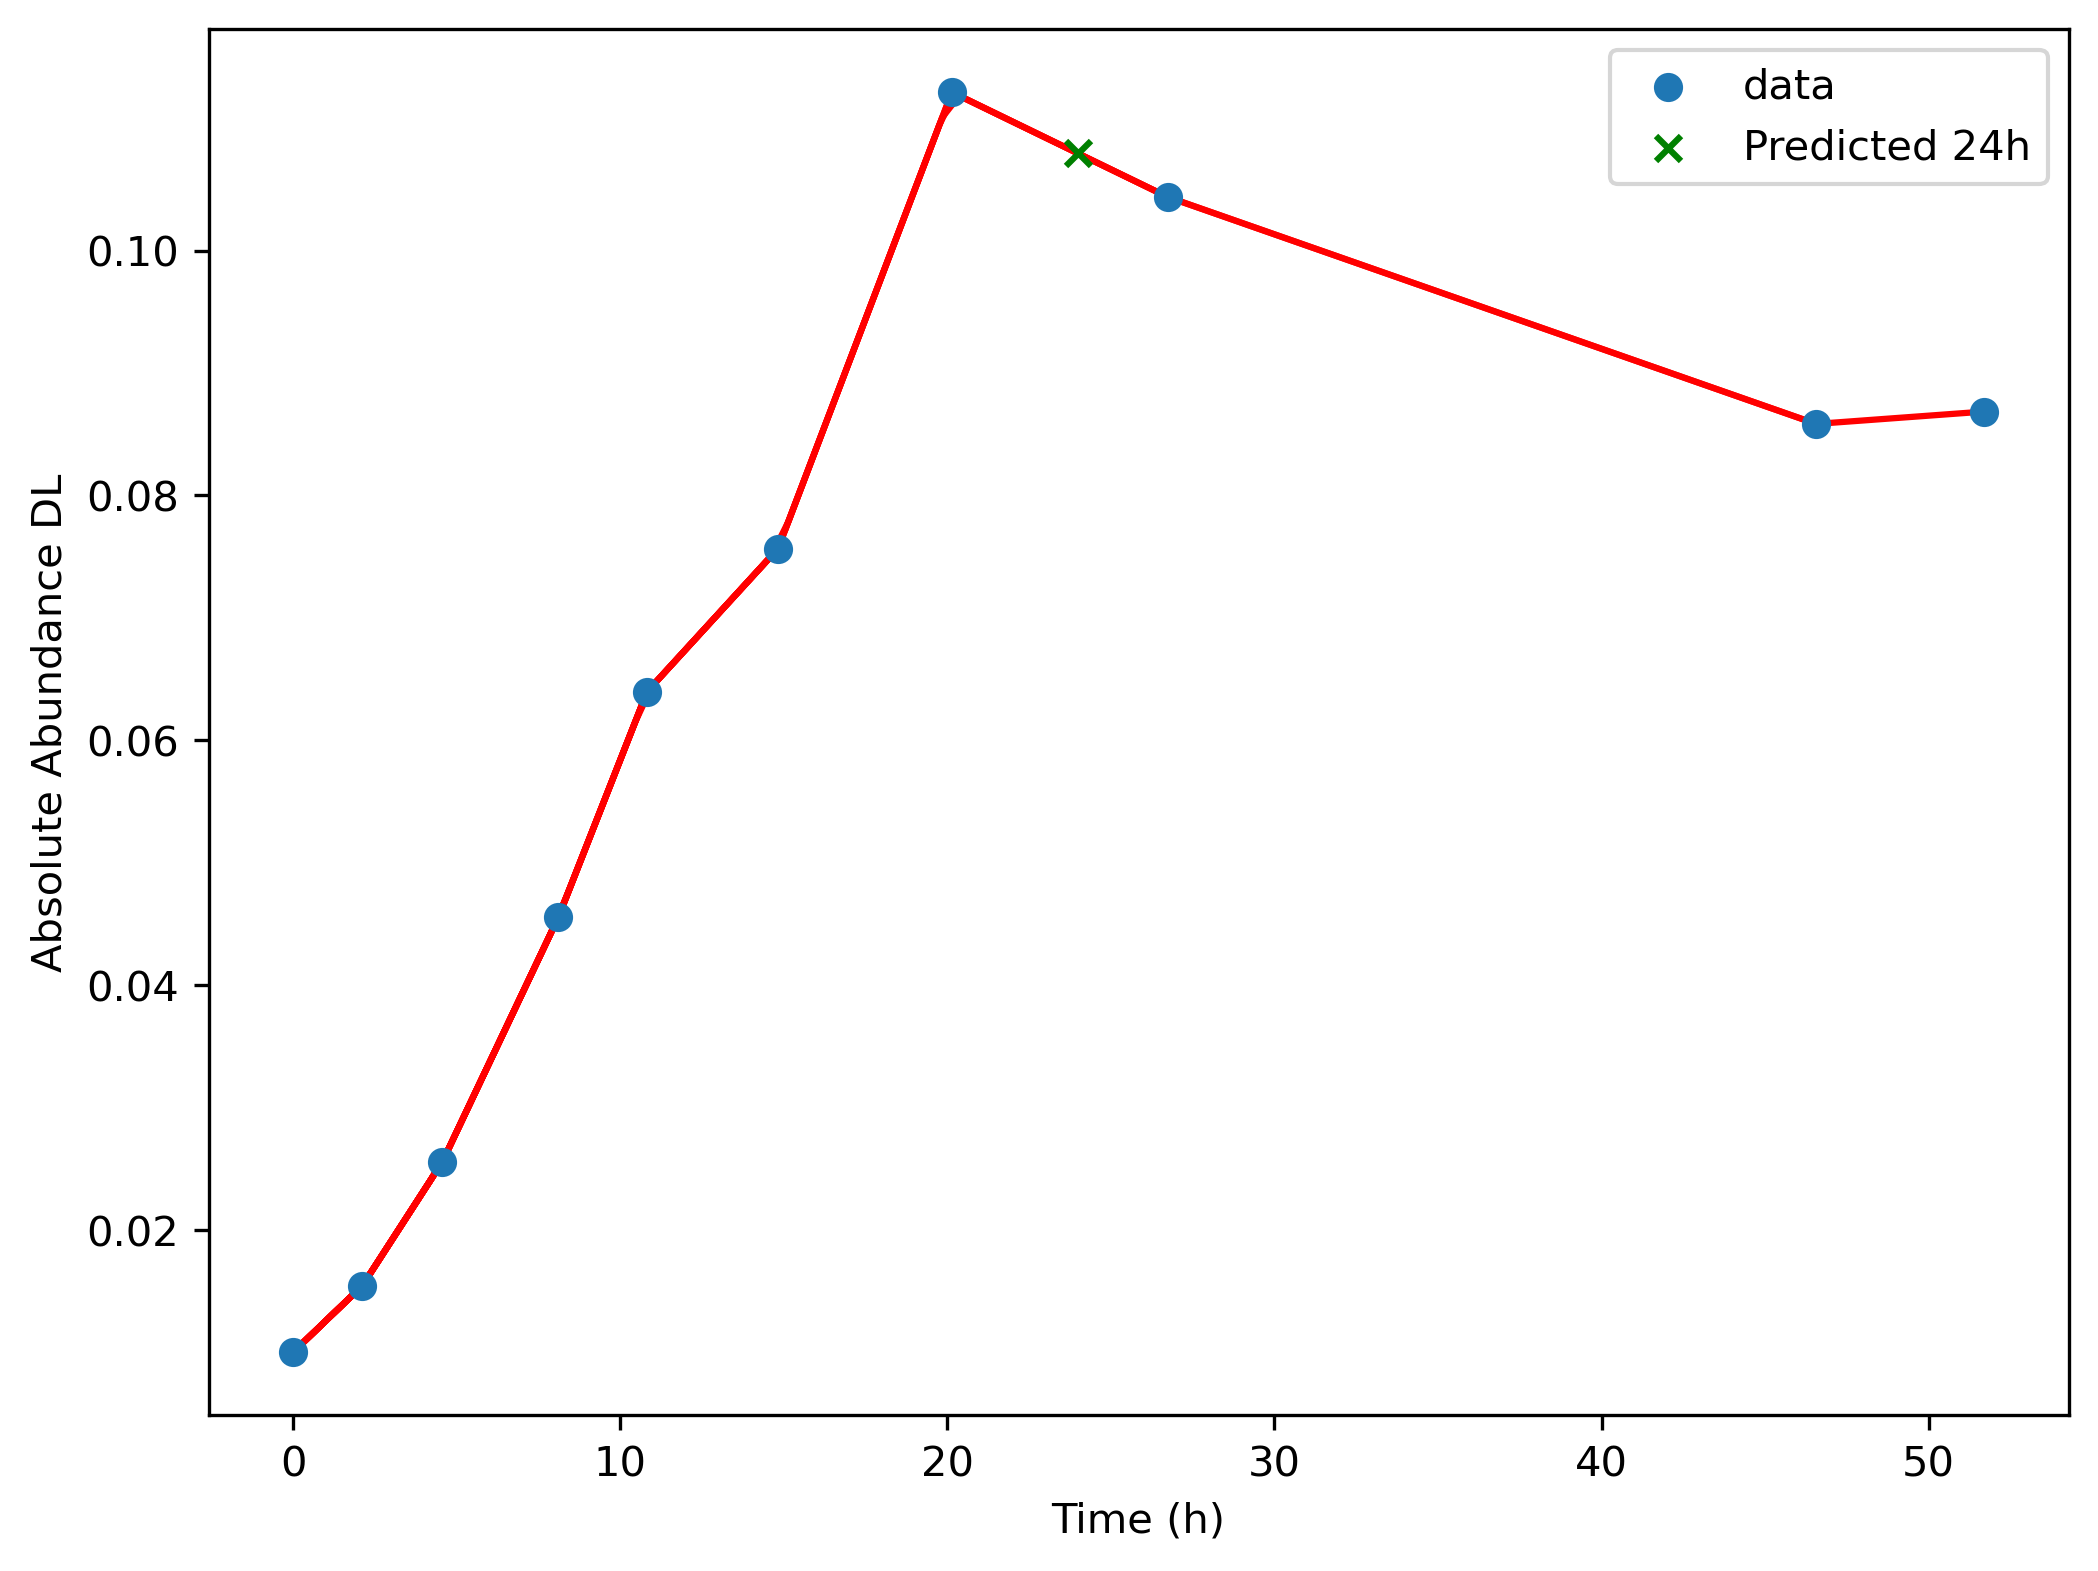

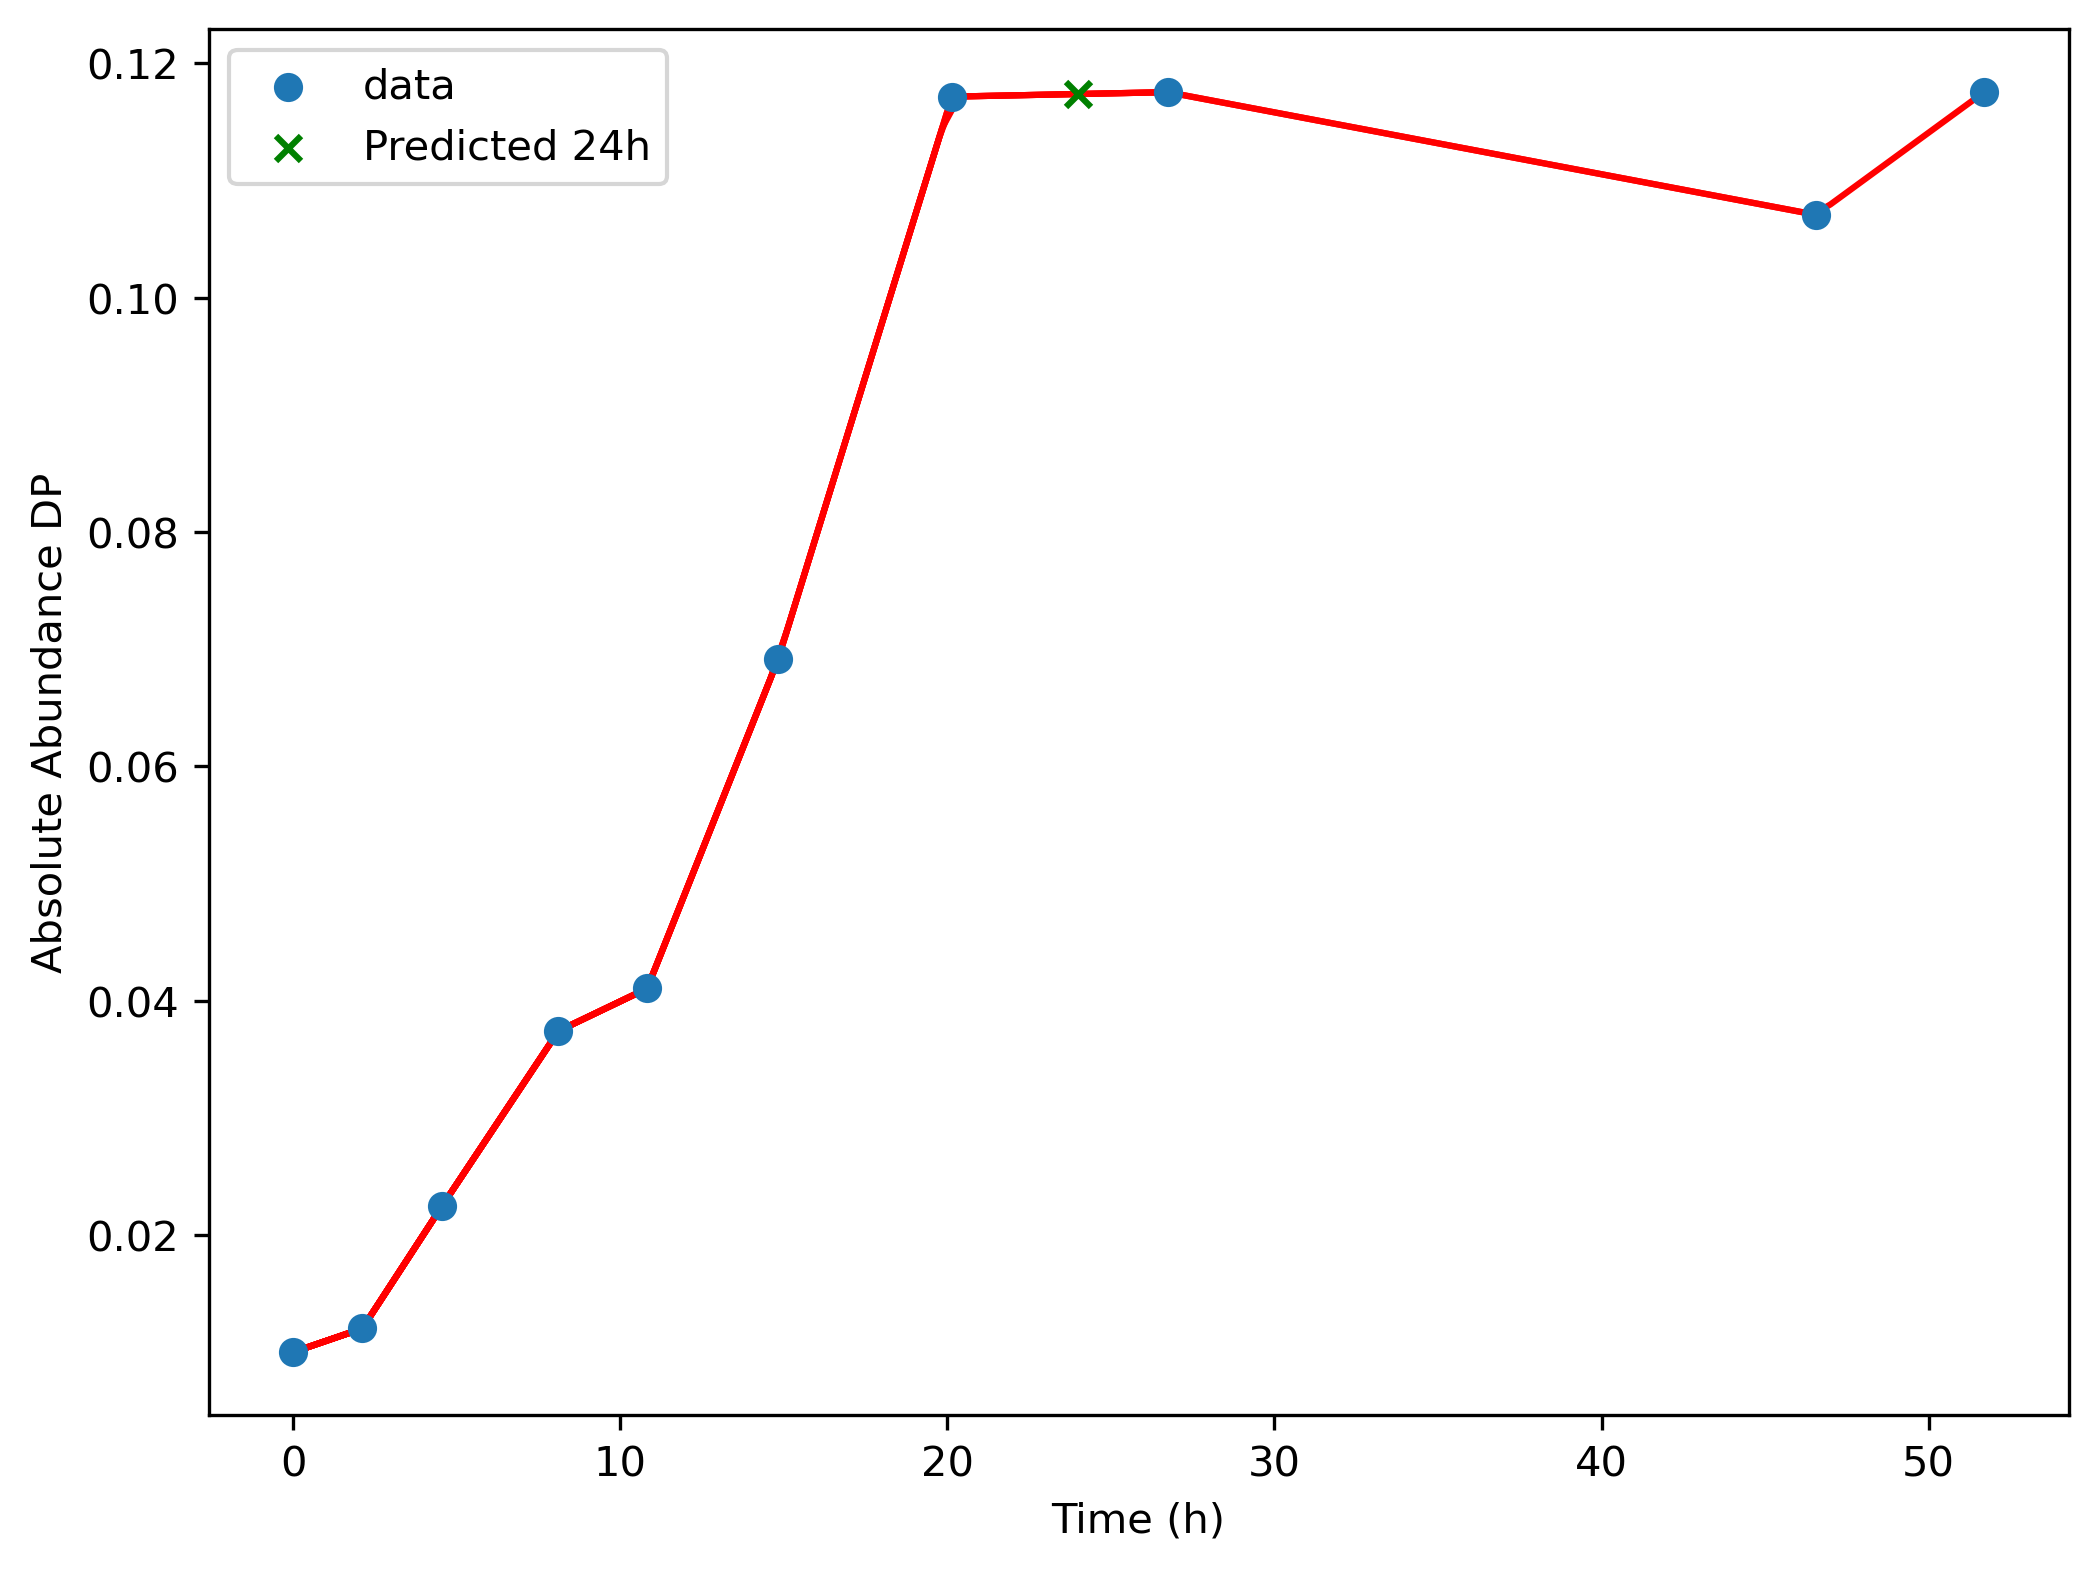

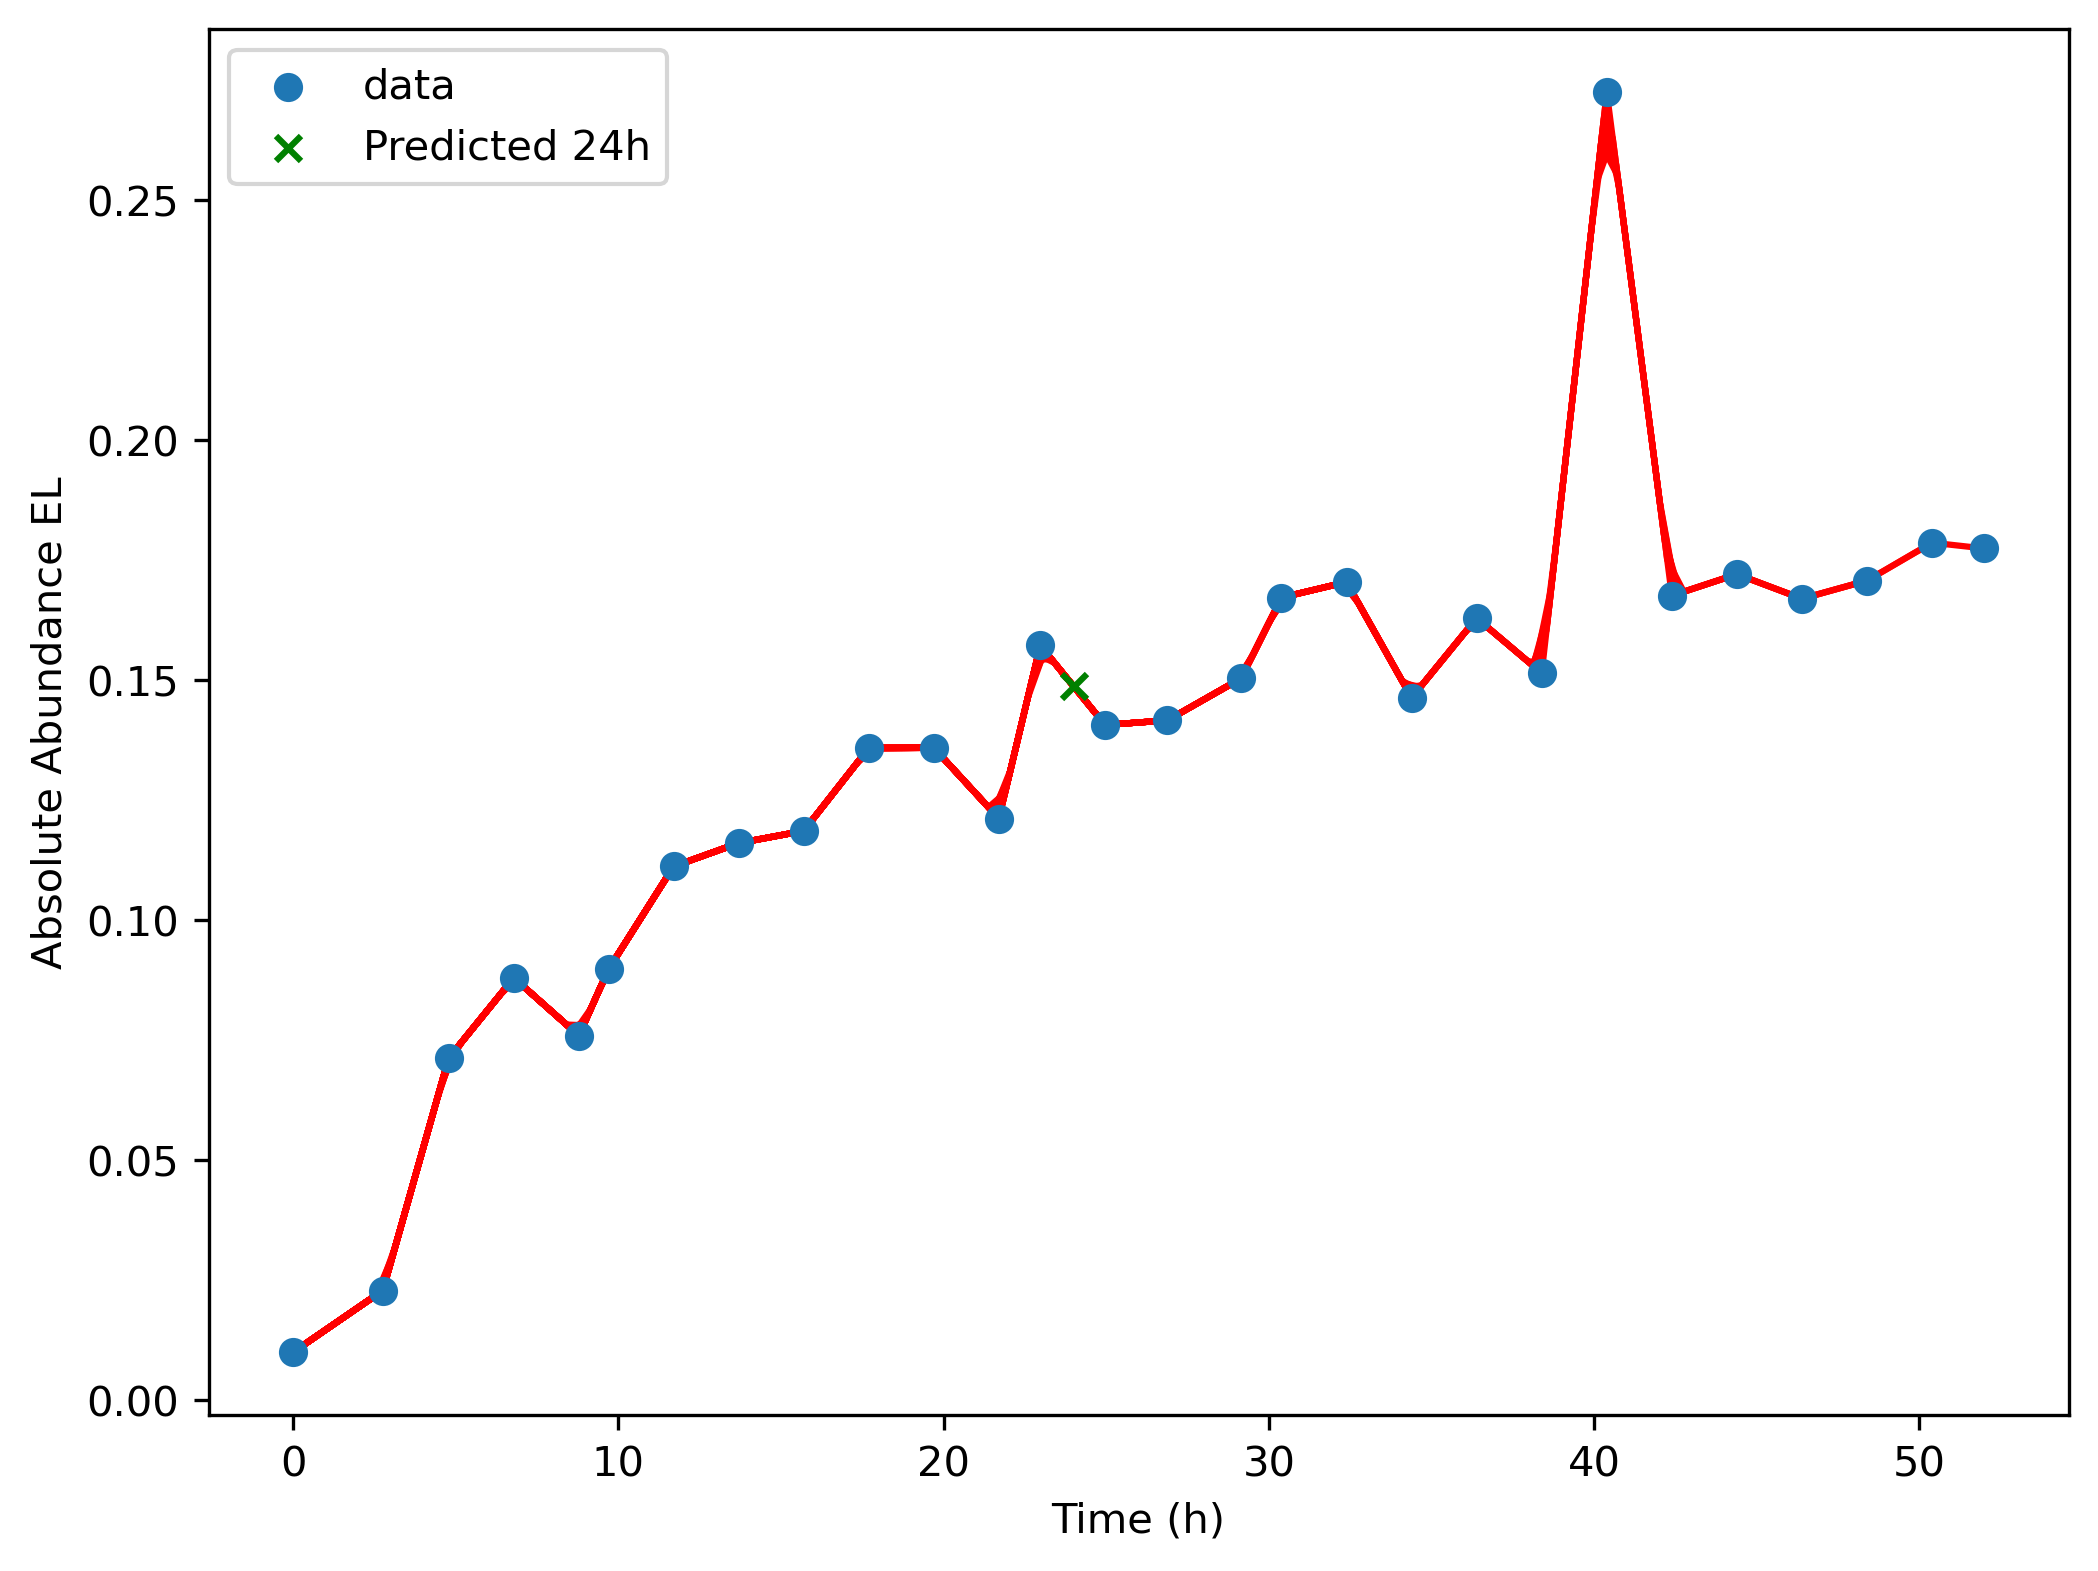

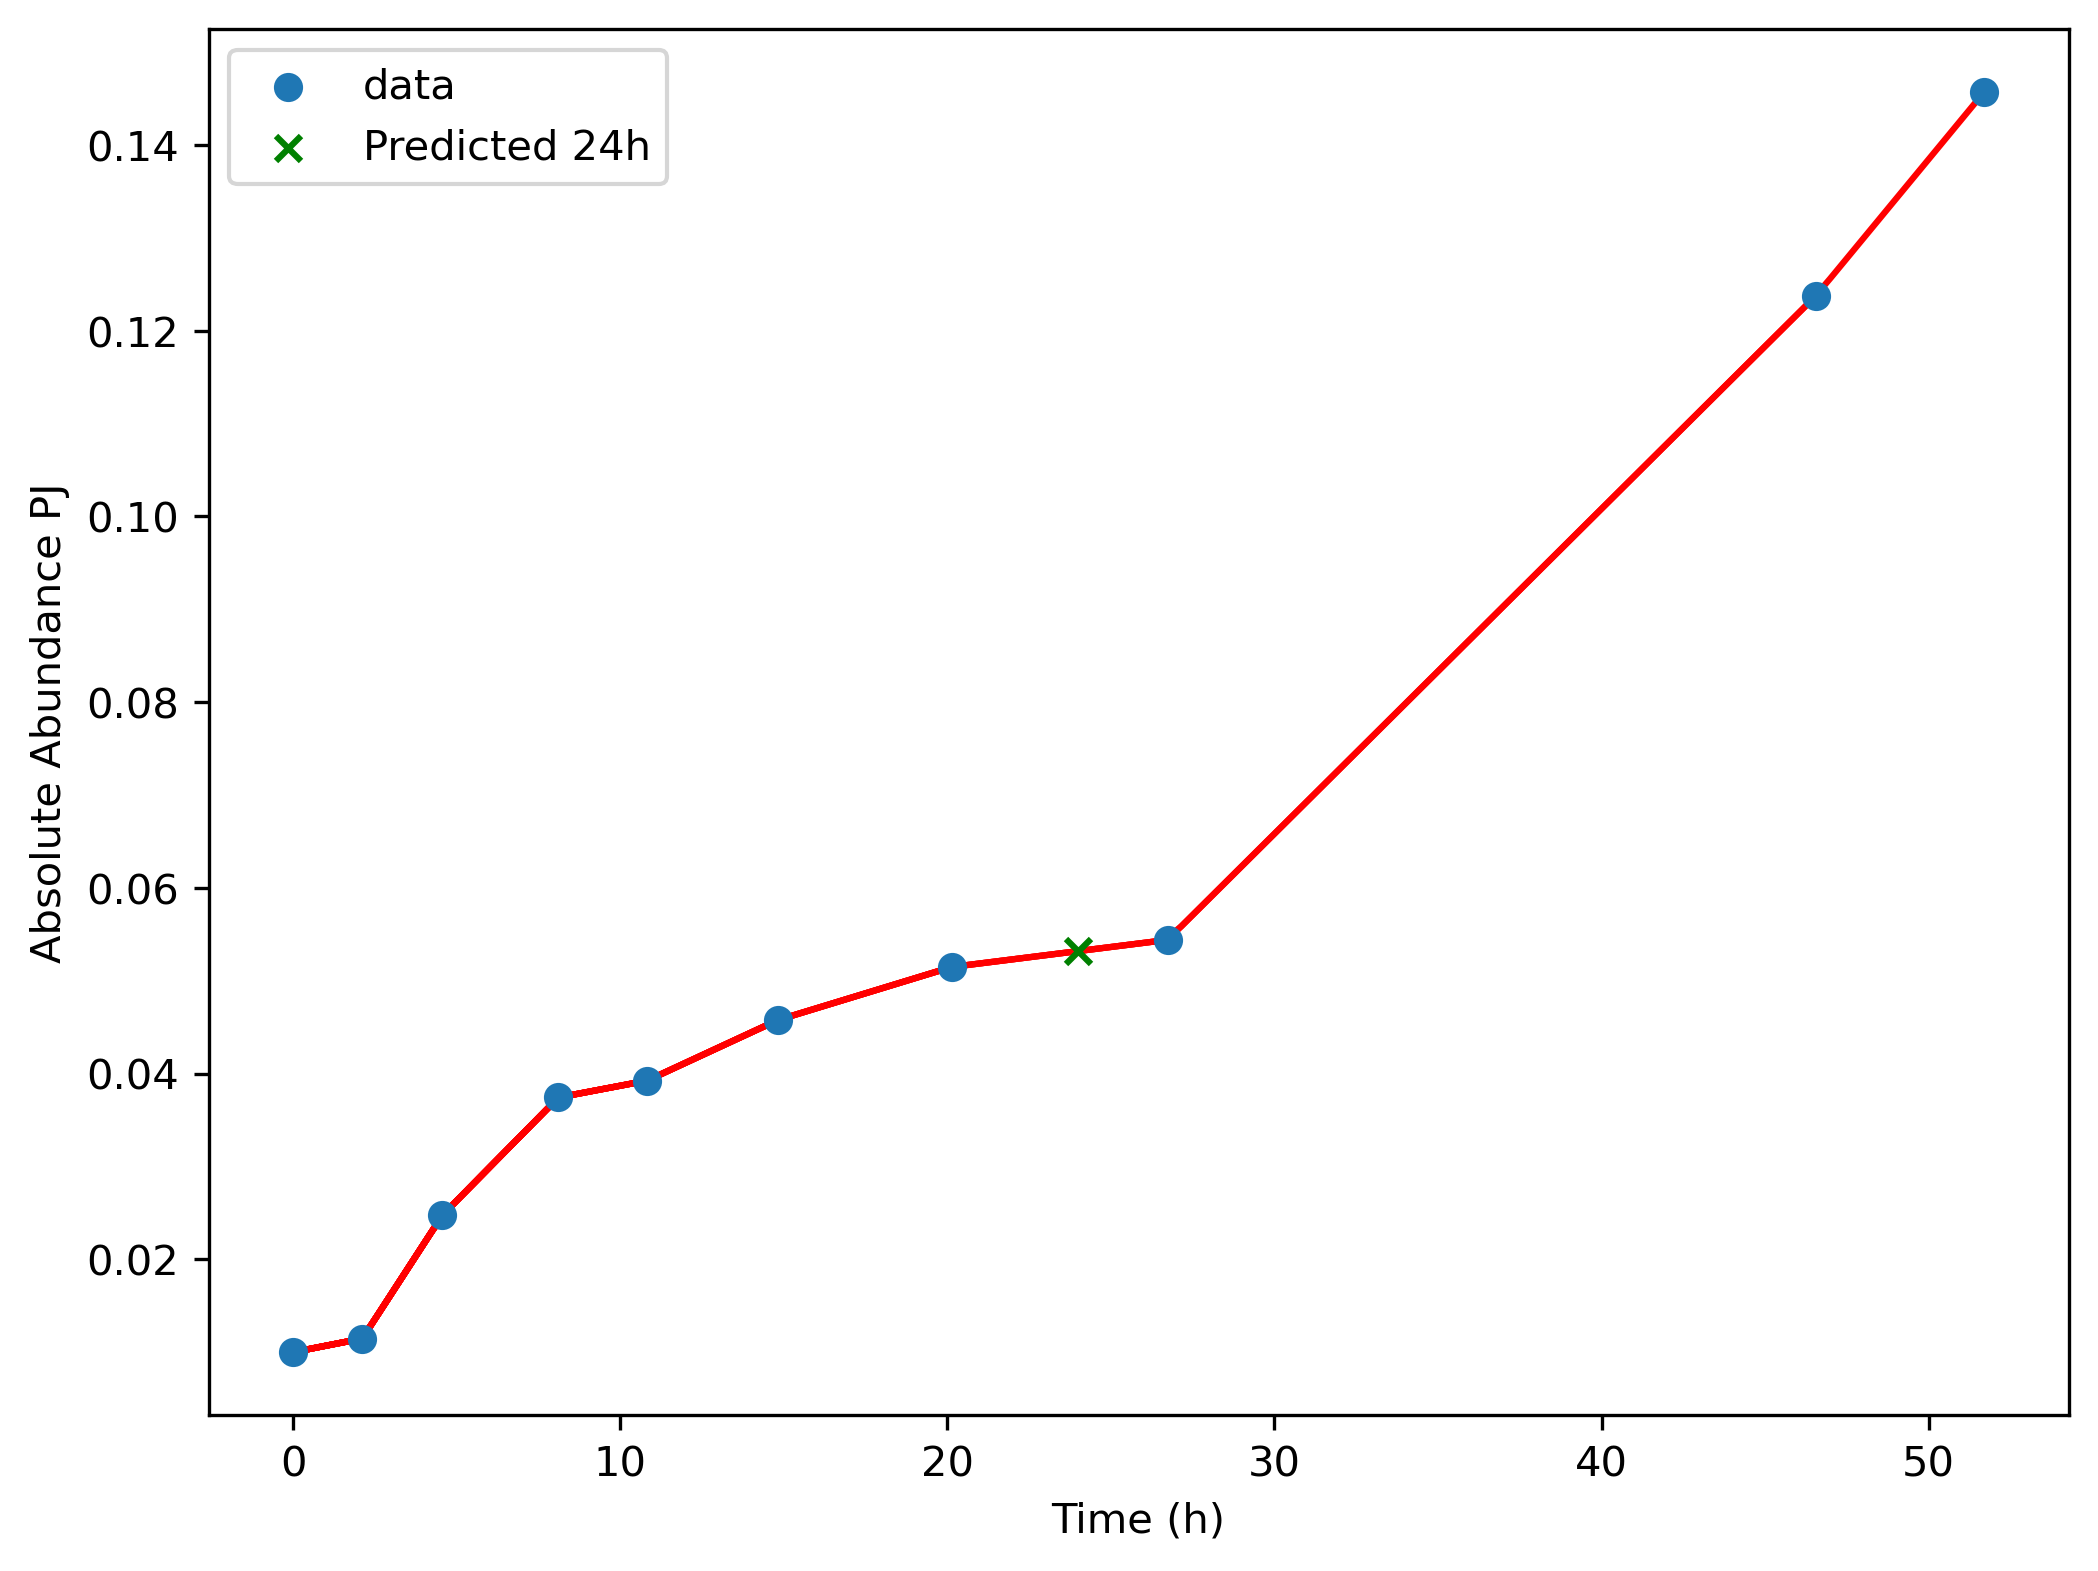

In [147]:
lami_df = pd.read_csv('Data/laminarin_full.csv')
lami_df = lami_df.rename(columns={
    'S1': 'PJ',
    'S2': 'BV',
    'S3': 'AC',
    'S4': 'DP',
    'S5': 'BT',
    'S6': 'DL',
    'S7': 'BH',
    'S8': 'BP',
    'S9': 'CS',
    'S10': 'EL'
})

conditions = lami_df['Treatments'].unique()
dict_conditions = {}
for condition in conditions:
    lami_cond = lami_df[lami_df['Treatments'] == condition]
    min_t = lami_cond['Time'].min()
    max_t = lami_cond['Time'].max()
    if max_t < 24:
        print(f"Condition {condition} has a max time of {max_t}h, which is less than 24h.")
        continue
    if min_t > 0:
        print(f"Condition {condition} has a min time of {min_t}h, which is greater than 0h.")
        continue
    if max_t == 24 and min_t == 0:
        dict_conditions[condition] = lami_cond[(lami_cond['Time'] == 0) | (lami_cond['Time'] == 24)].reset_index(drop=True)    
    else:
        # these are the monoculture conditions
        mono = condition[-2:]
        growth = lami_cond[mono]
        time = lami_cond['Time']
        # interpolate to get 24
        at_0 = lami_cond[lami_cond['Time'] == 0]
        interpolate = spi.make_interp_spline(
            time, growth, k = 1)
        fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
        time_sim = np.linspace(0, time, 100)
        pred_24 = interpolate(24)
        ax.scatter(time, growth, zorder = 2, label='data')  
        ax.plot(time_sim, interpolate(time_sim), color='red', zorder = 1)
        ax.scatter(24, pred_24,  color='green', marker='x', zorder = 3, label = 'Predicted 24h')
        ax.legend()
        ax.set_xlabel('Time (h)')
        ax.set_ylabel(f'Absolute Abundance {mono}')
        cond_024 = lami_cond[lami_cond['Time'] == 0]
        pred_24 = cond_024.copy().reset_index(drop=True)
        pred_24['Time'] = 24
        pred_24['Treatments'] = condition
        pred_24[mono] = interpolate(24)
        cond_024 = pd.concat([cond_024, pred_24], axis=0)
        cond_024 = cond_024.reset_index(drop=True)
        dict_conditions[condition] = cond_024

df_lami_treated = pd.concat(dict_conditions.values(), axis=0, ignore_index=True)

df_lami_treated.to_csv('Data/laminarin_treated.csv', index=False)

# No Carb

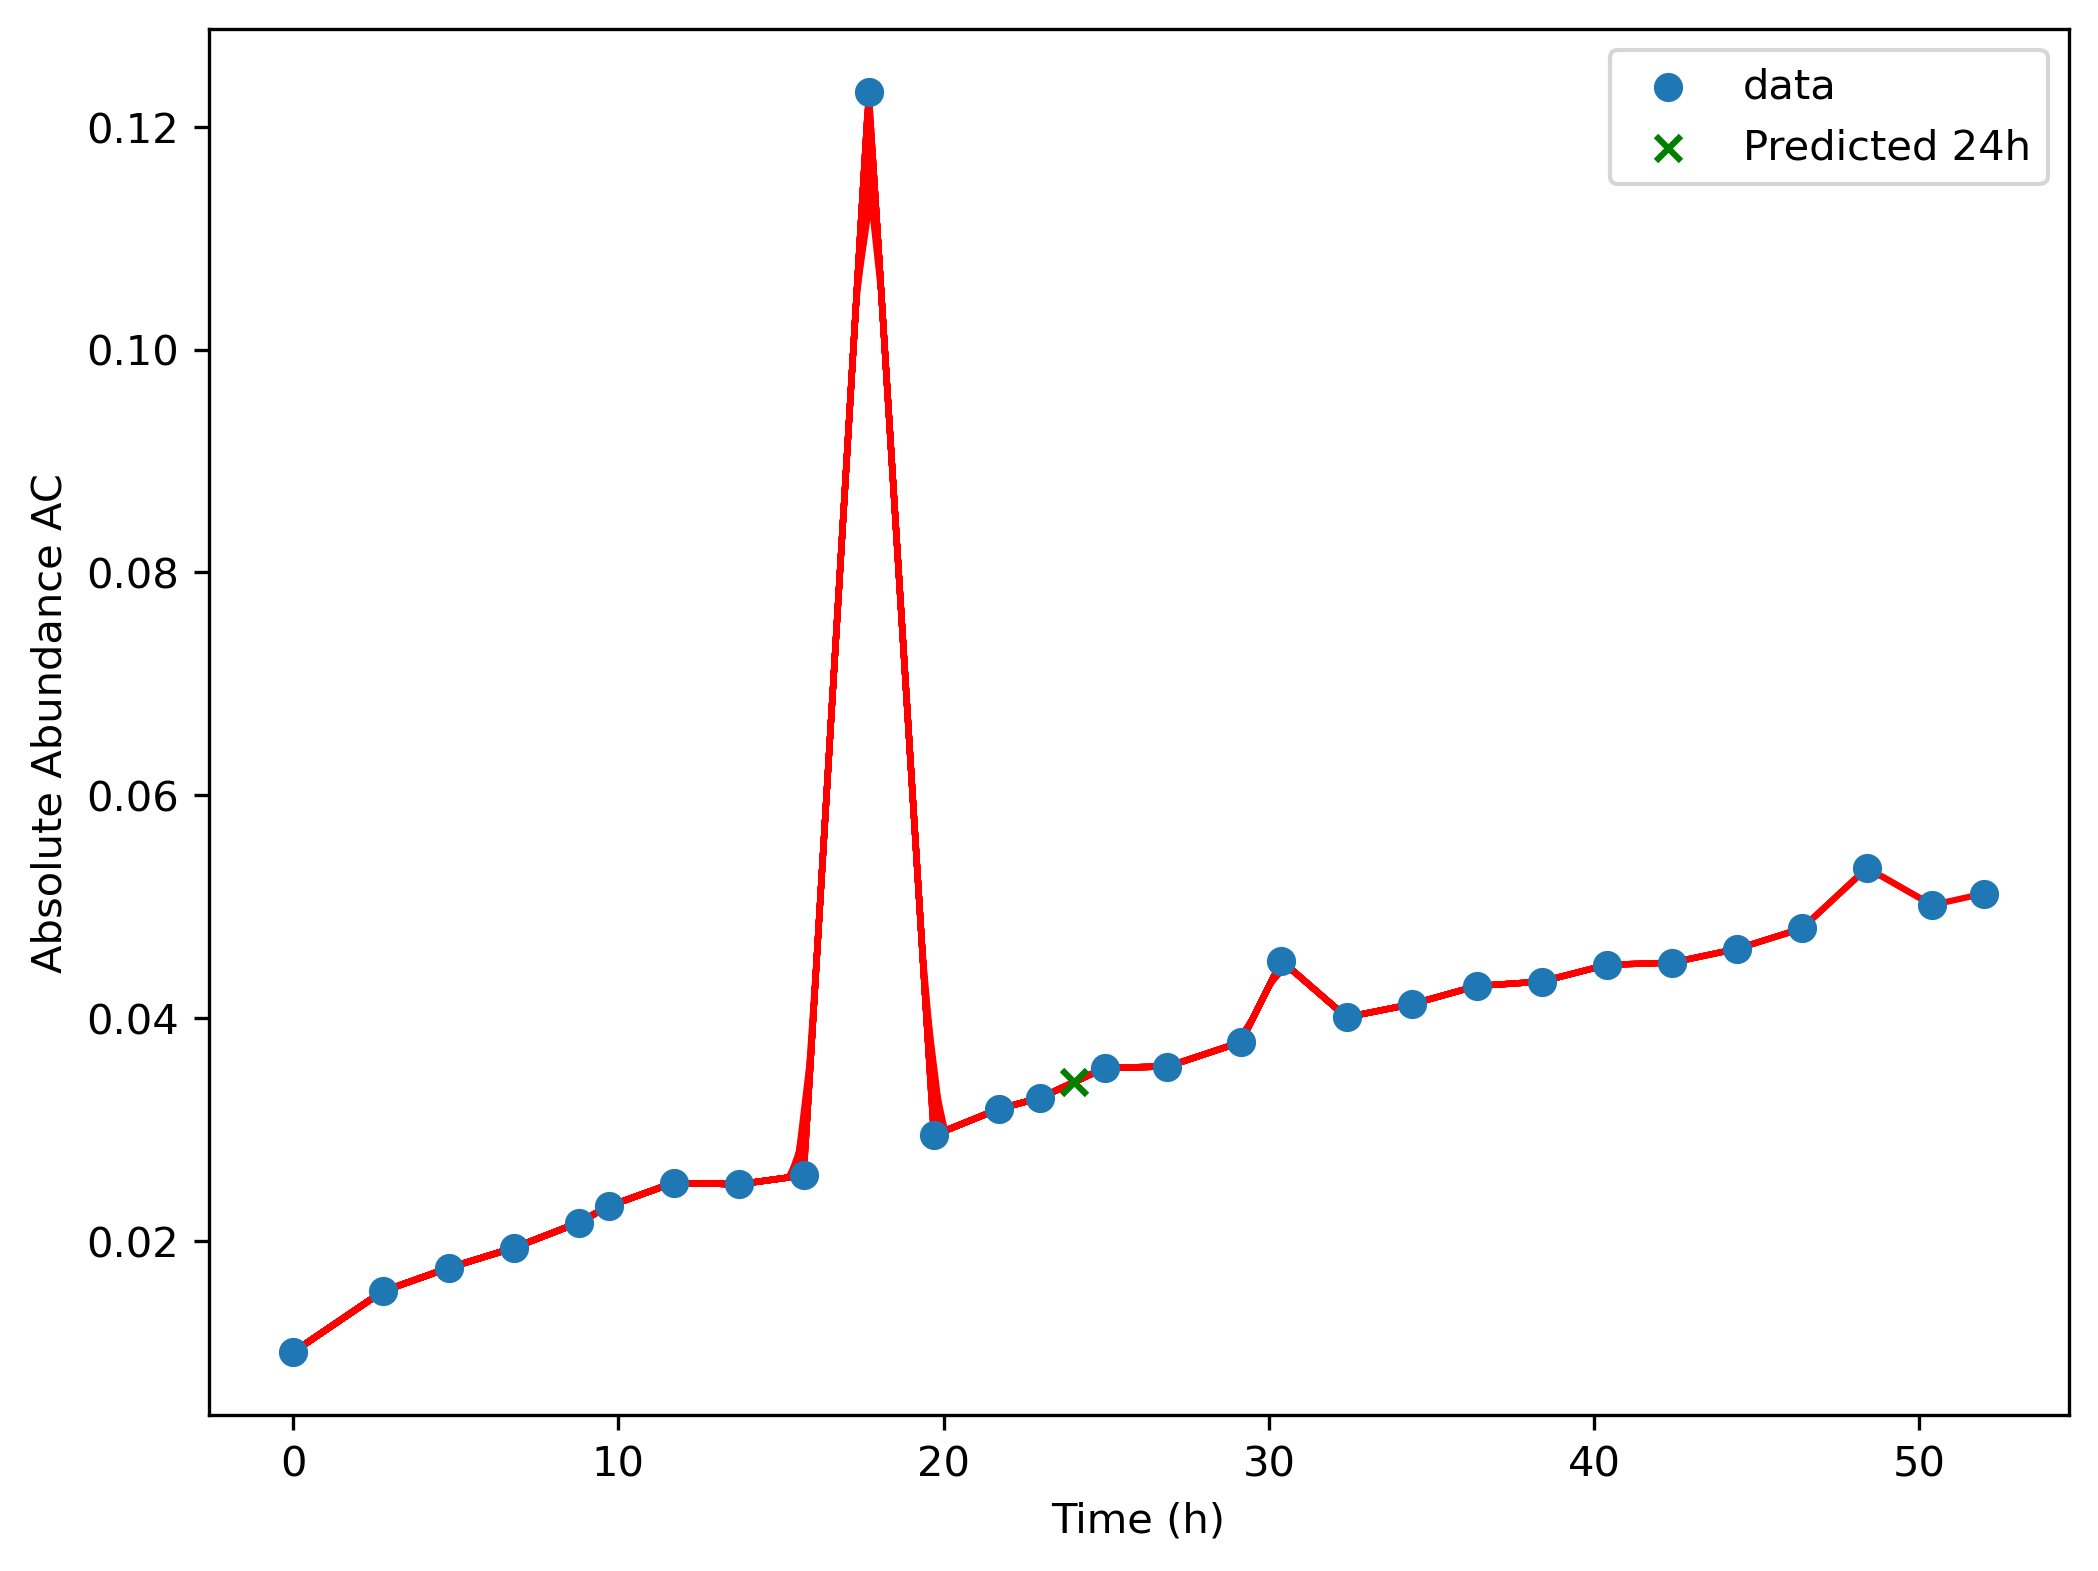

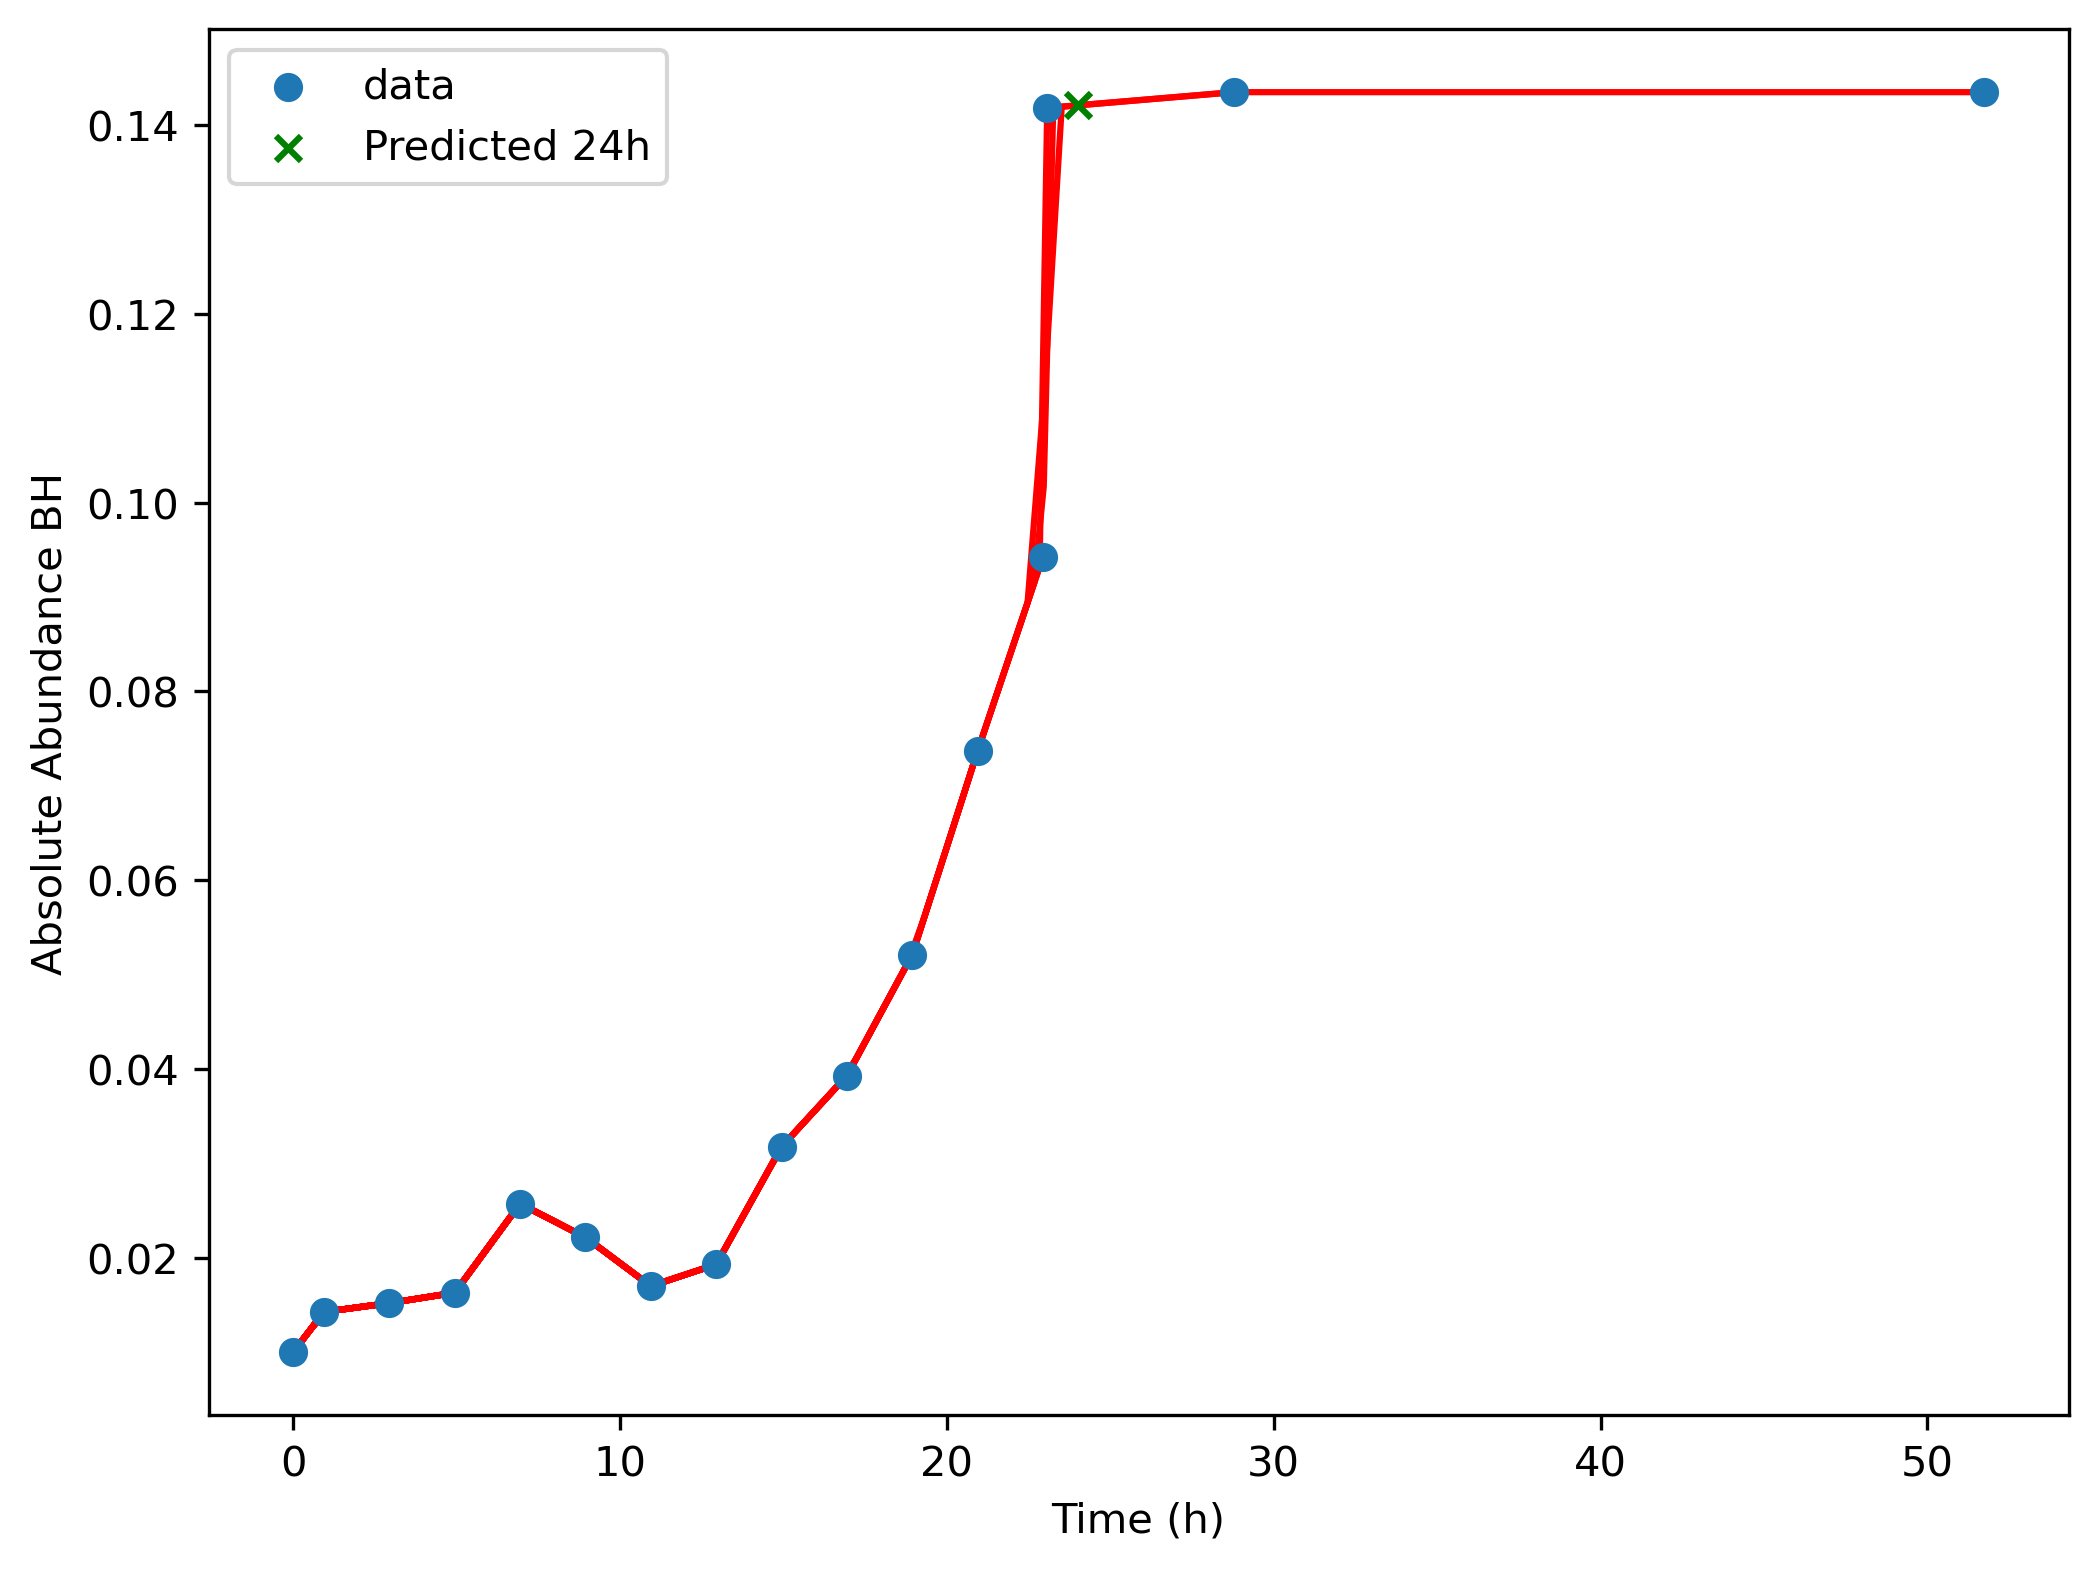

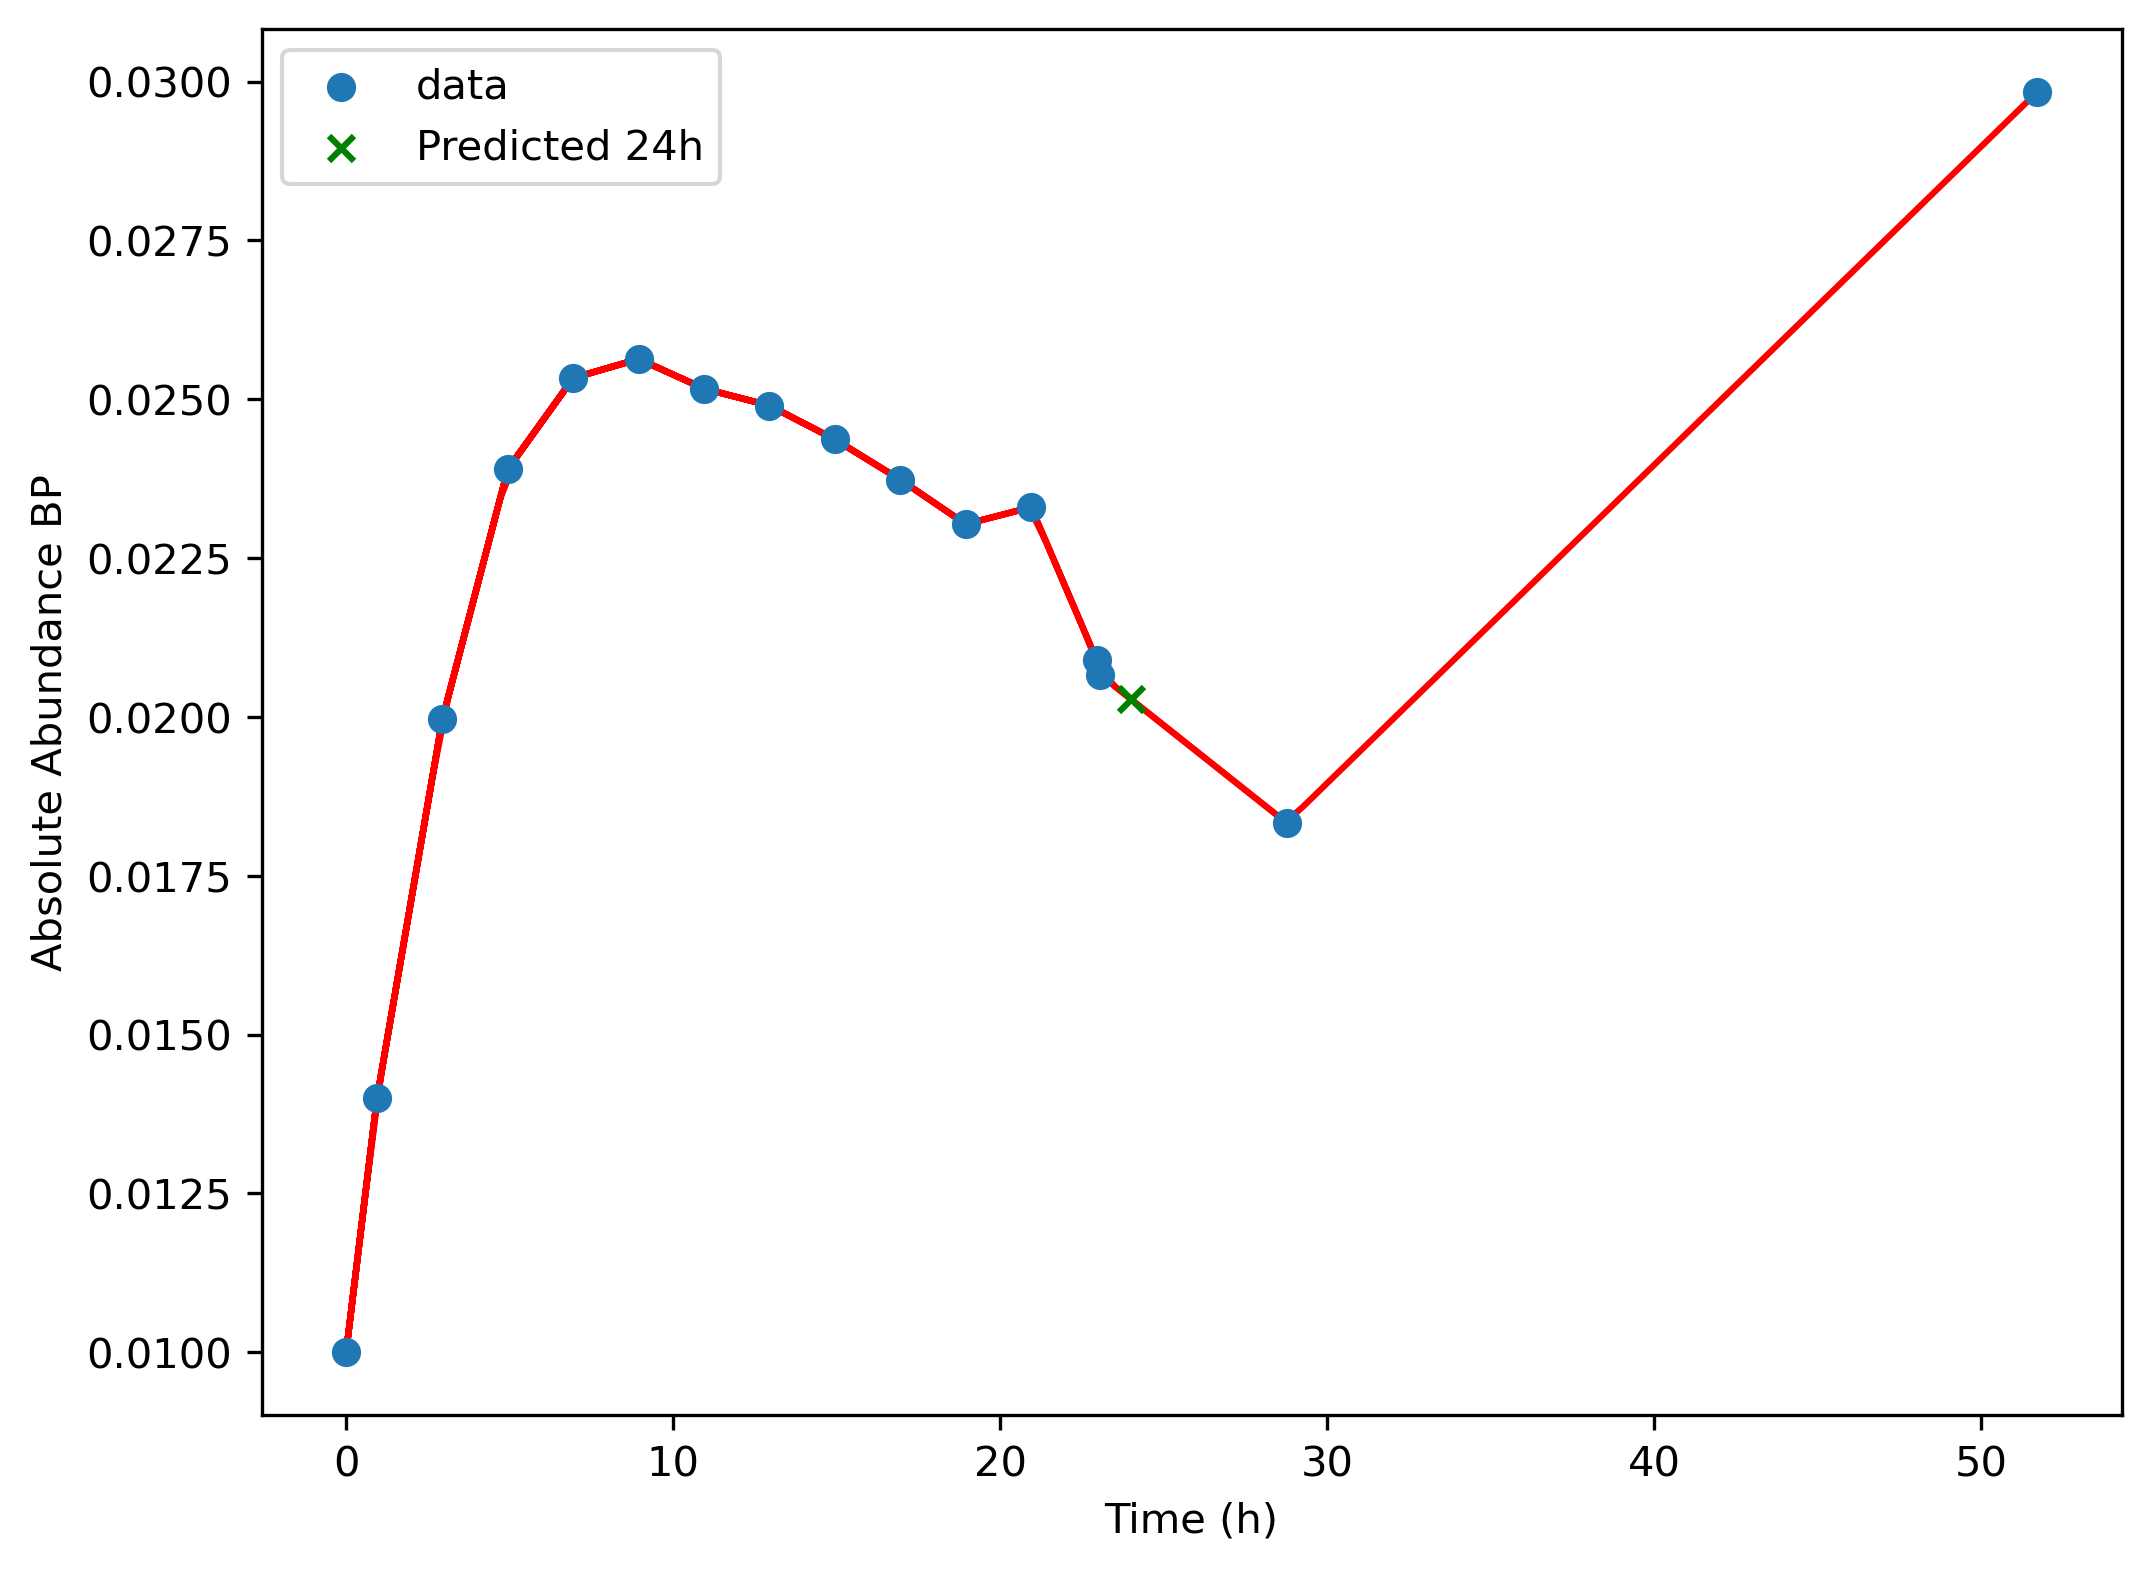

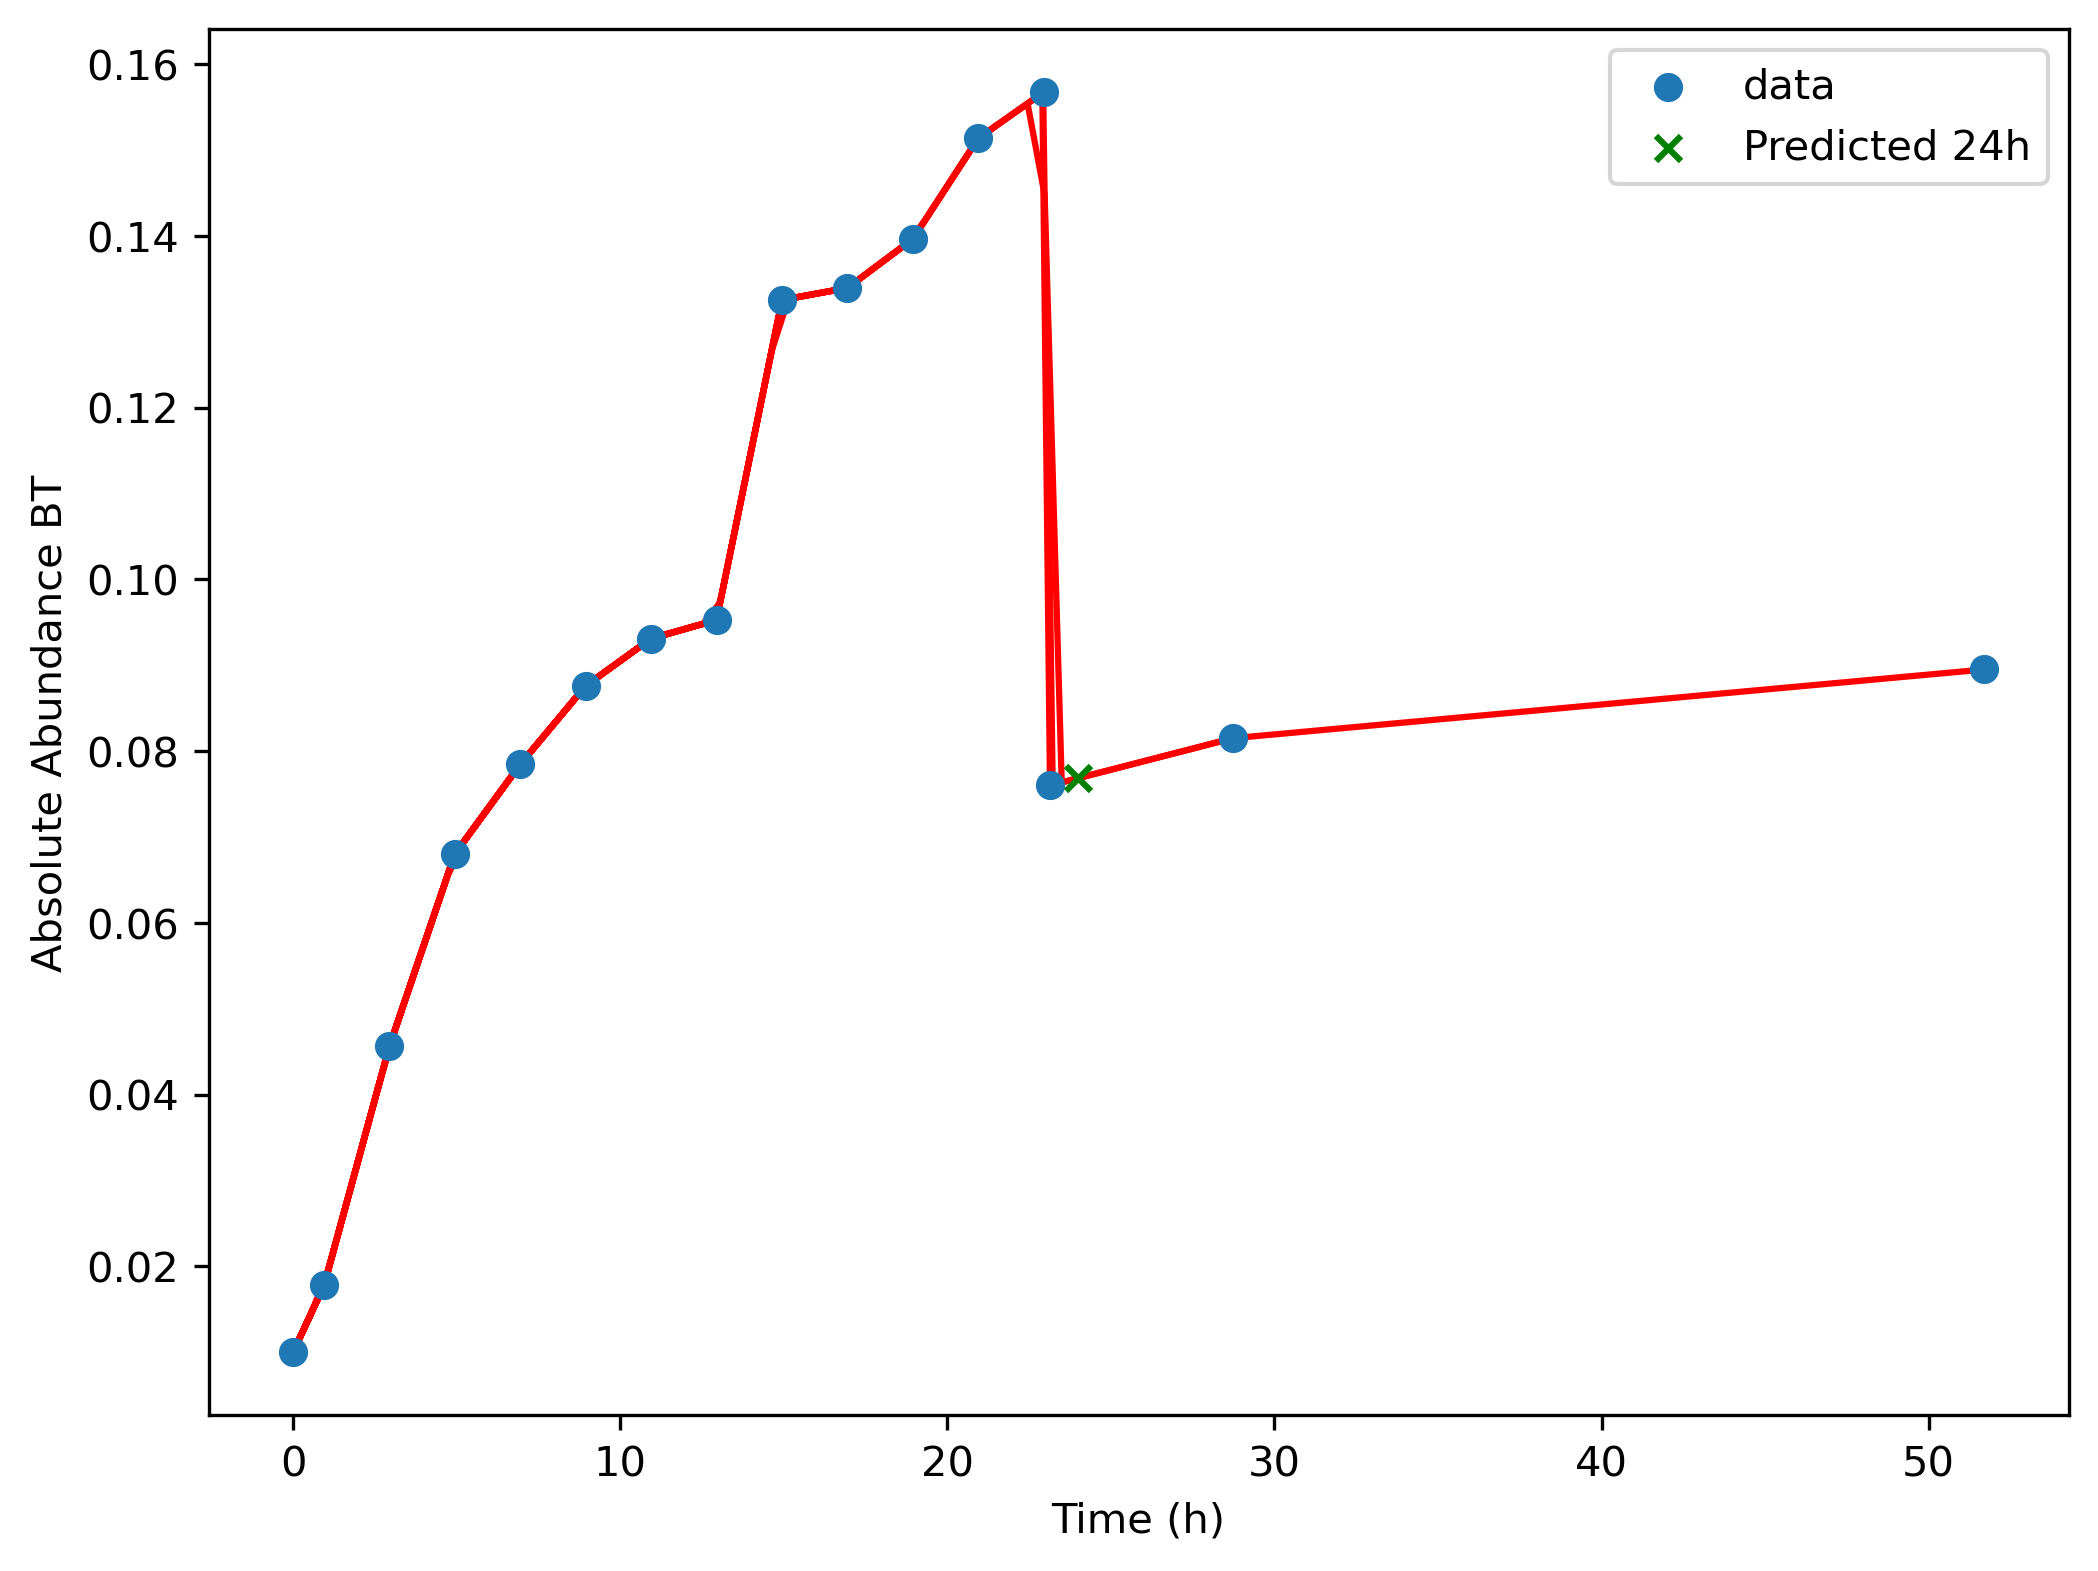

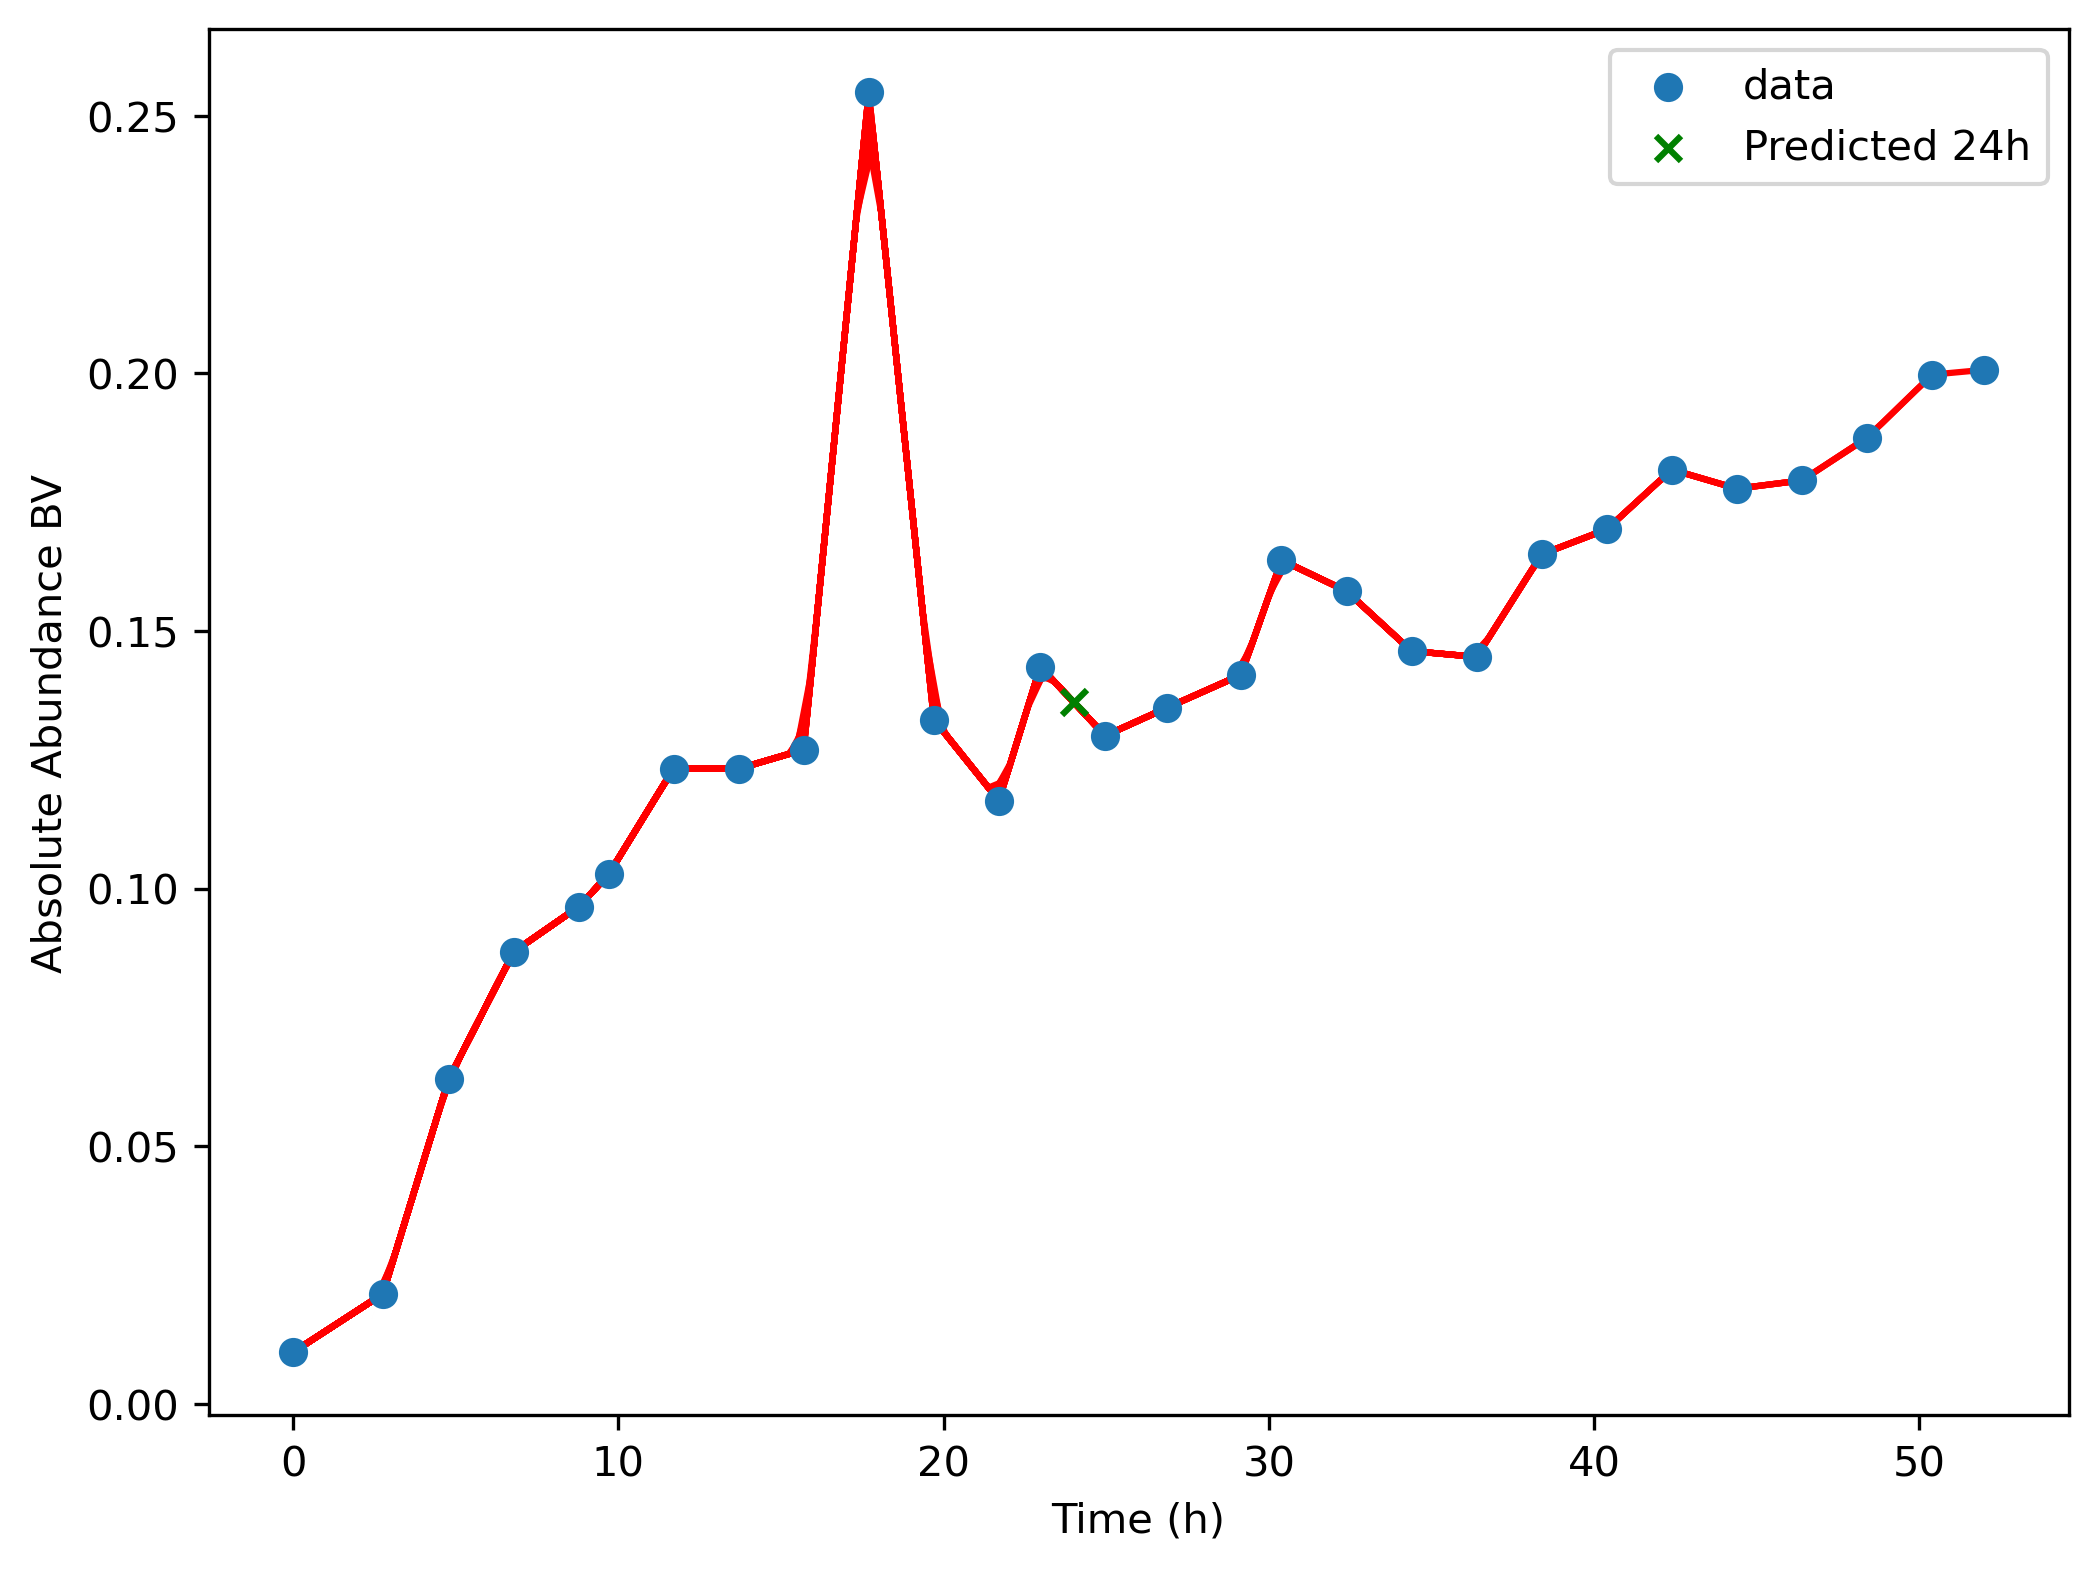

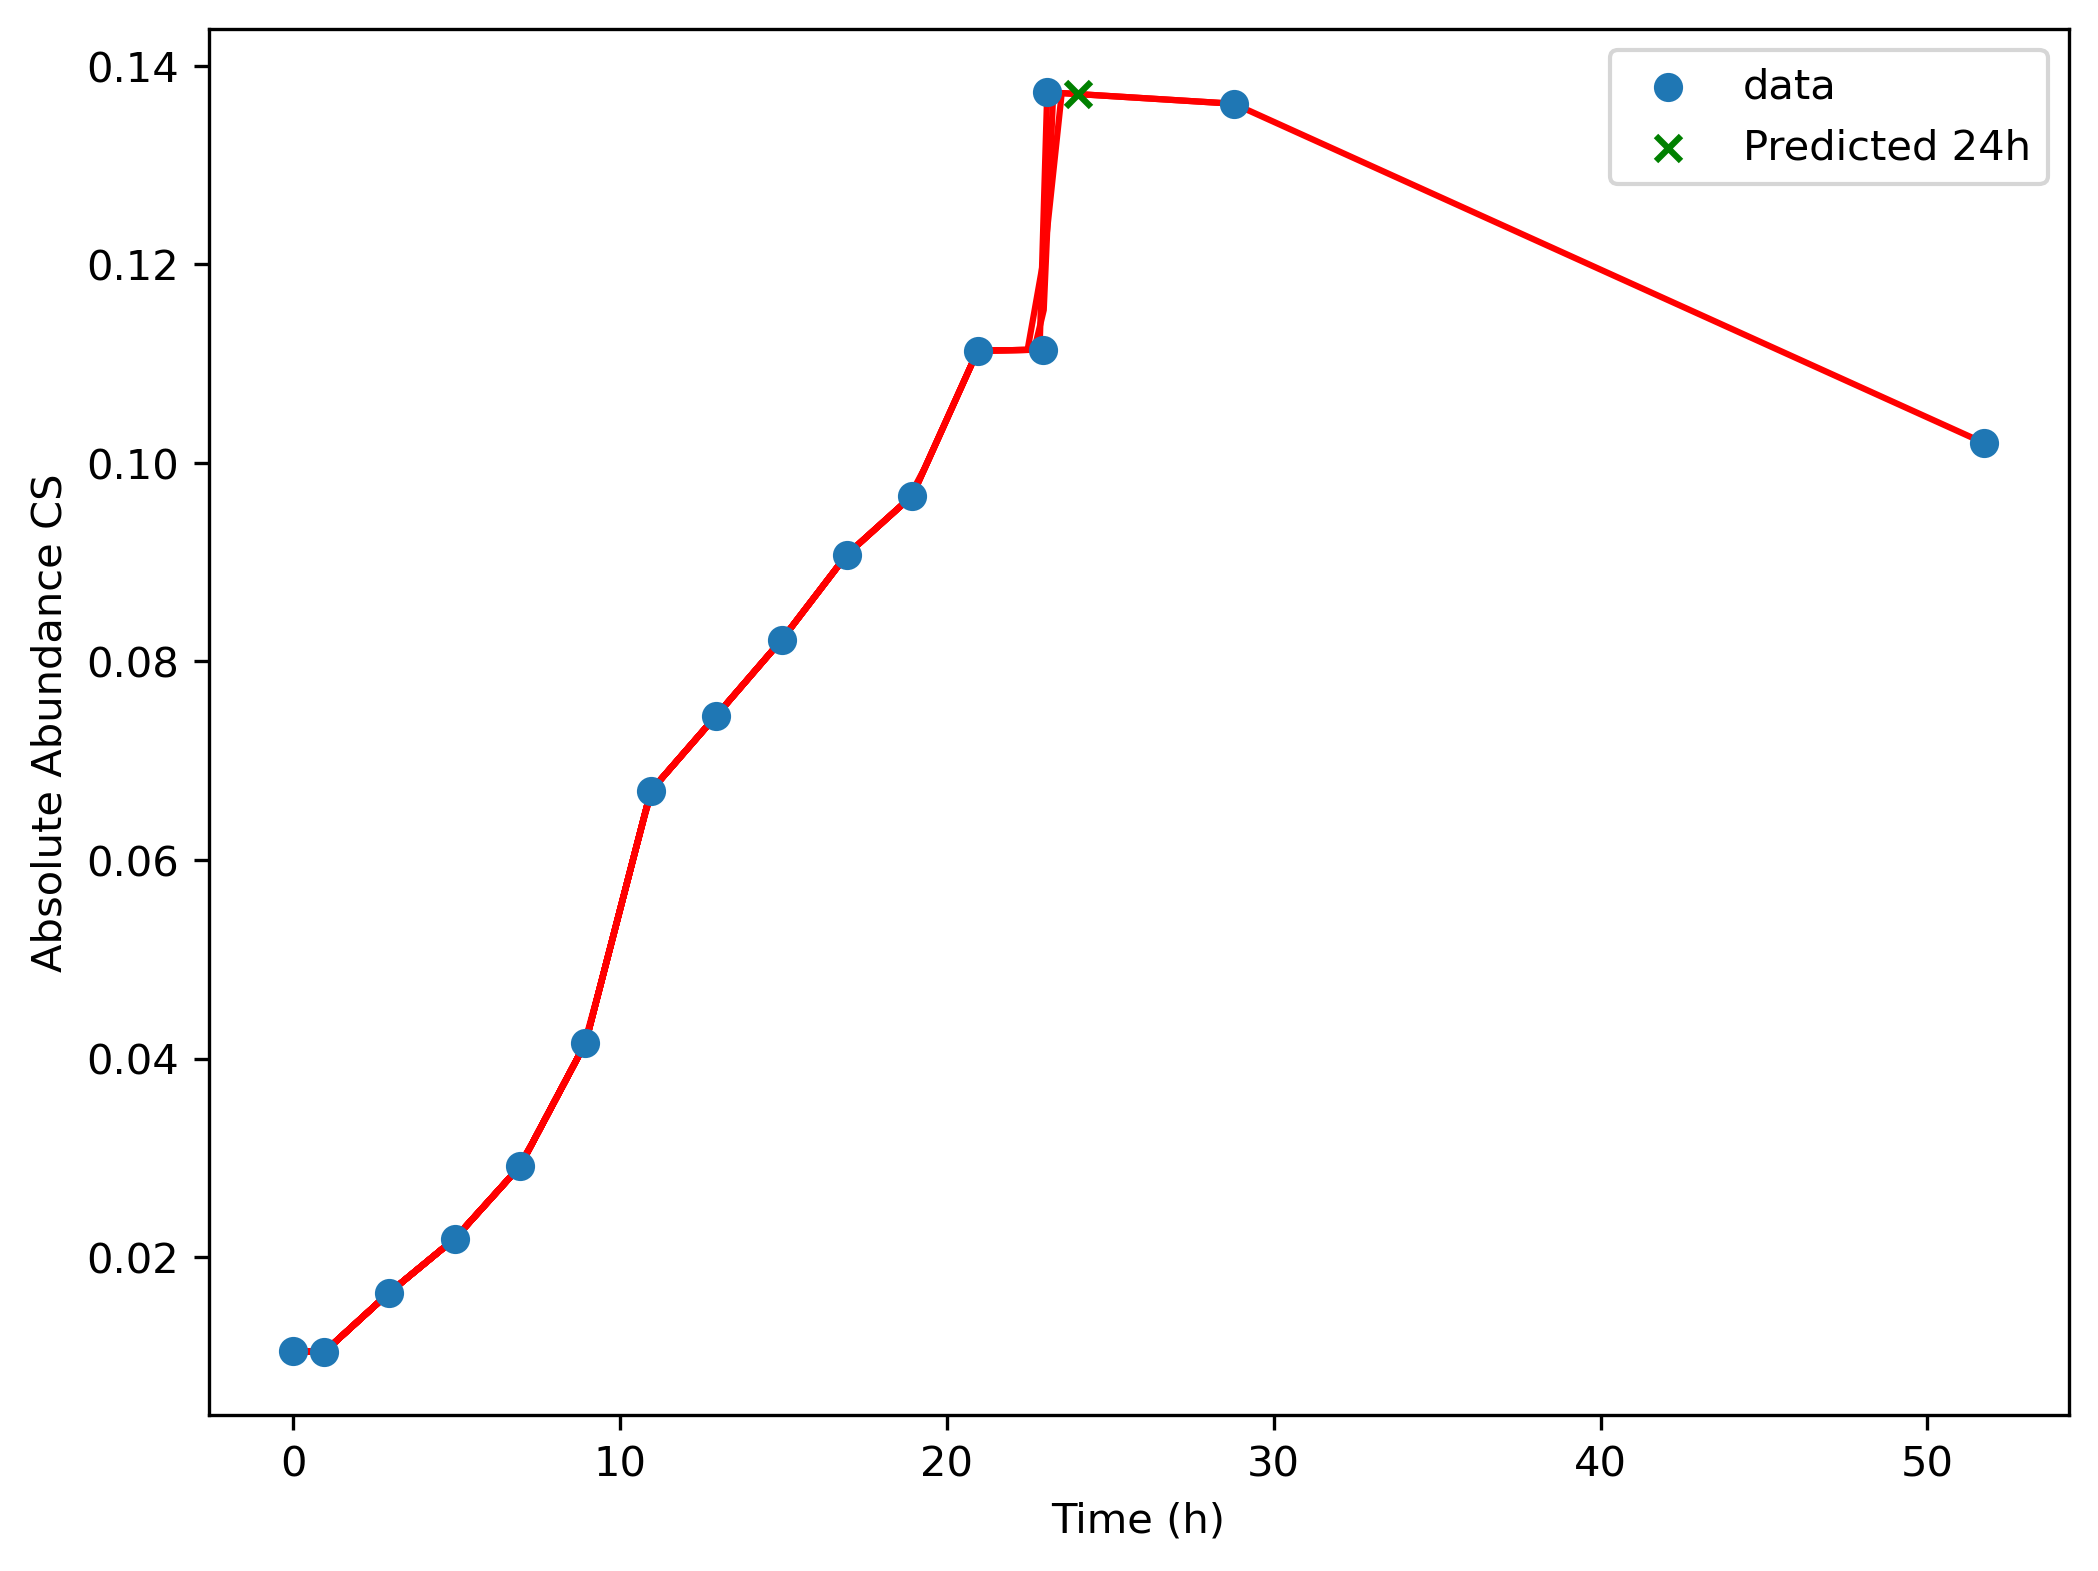

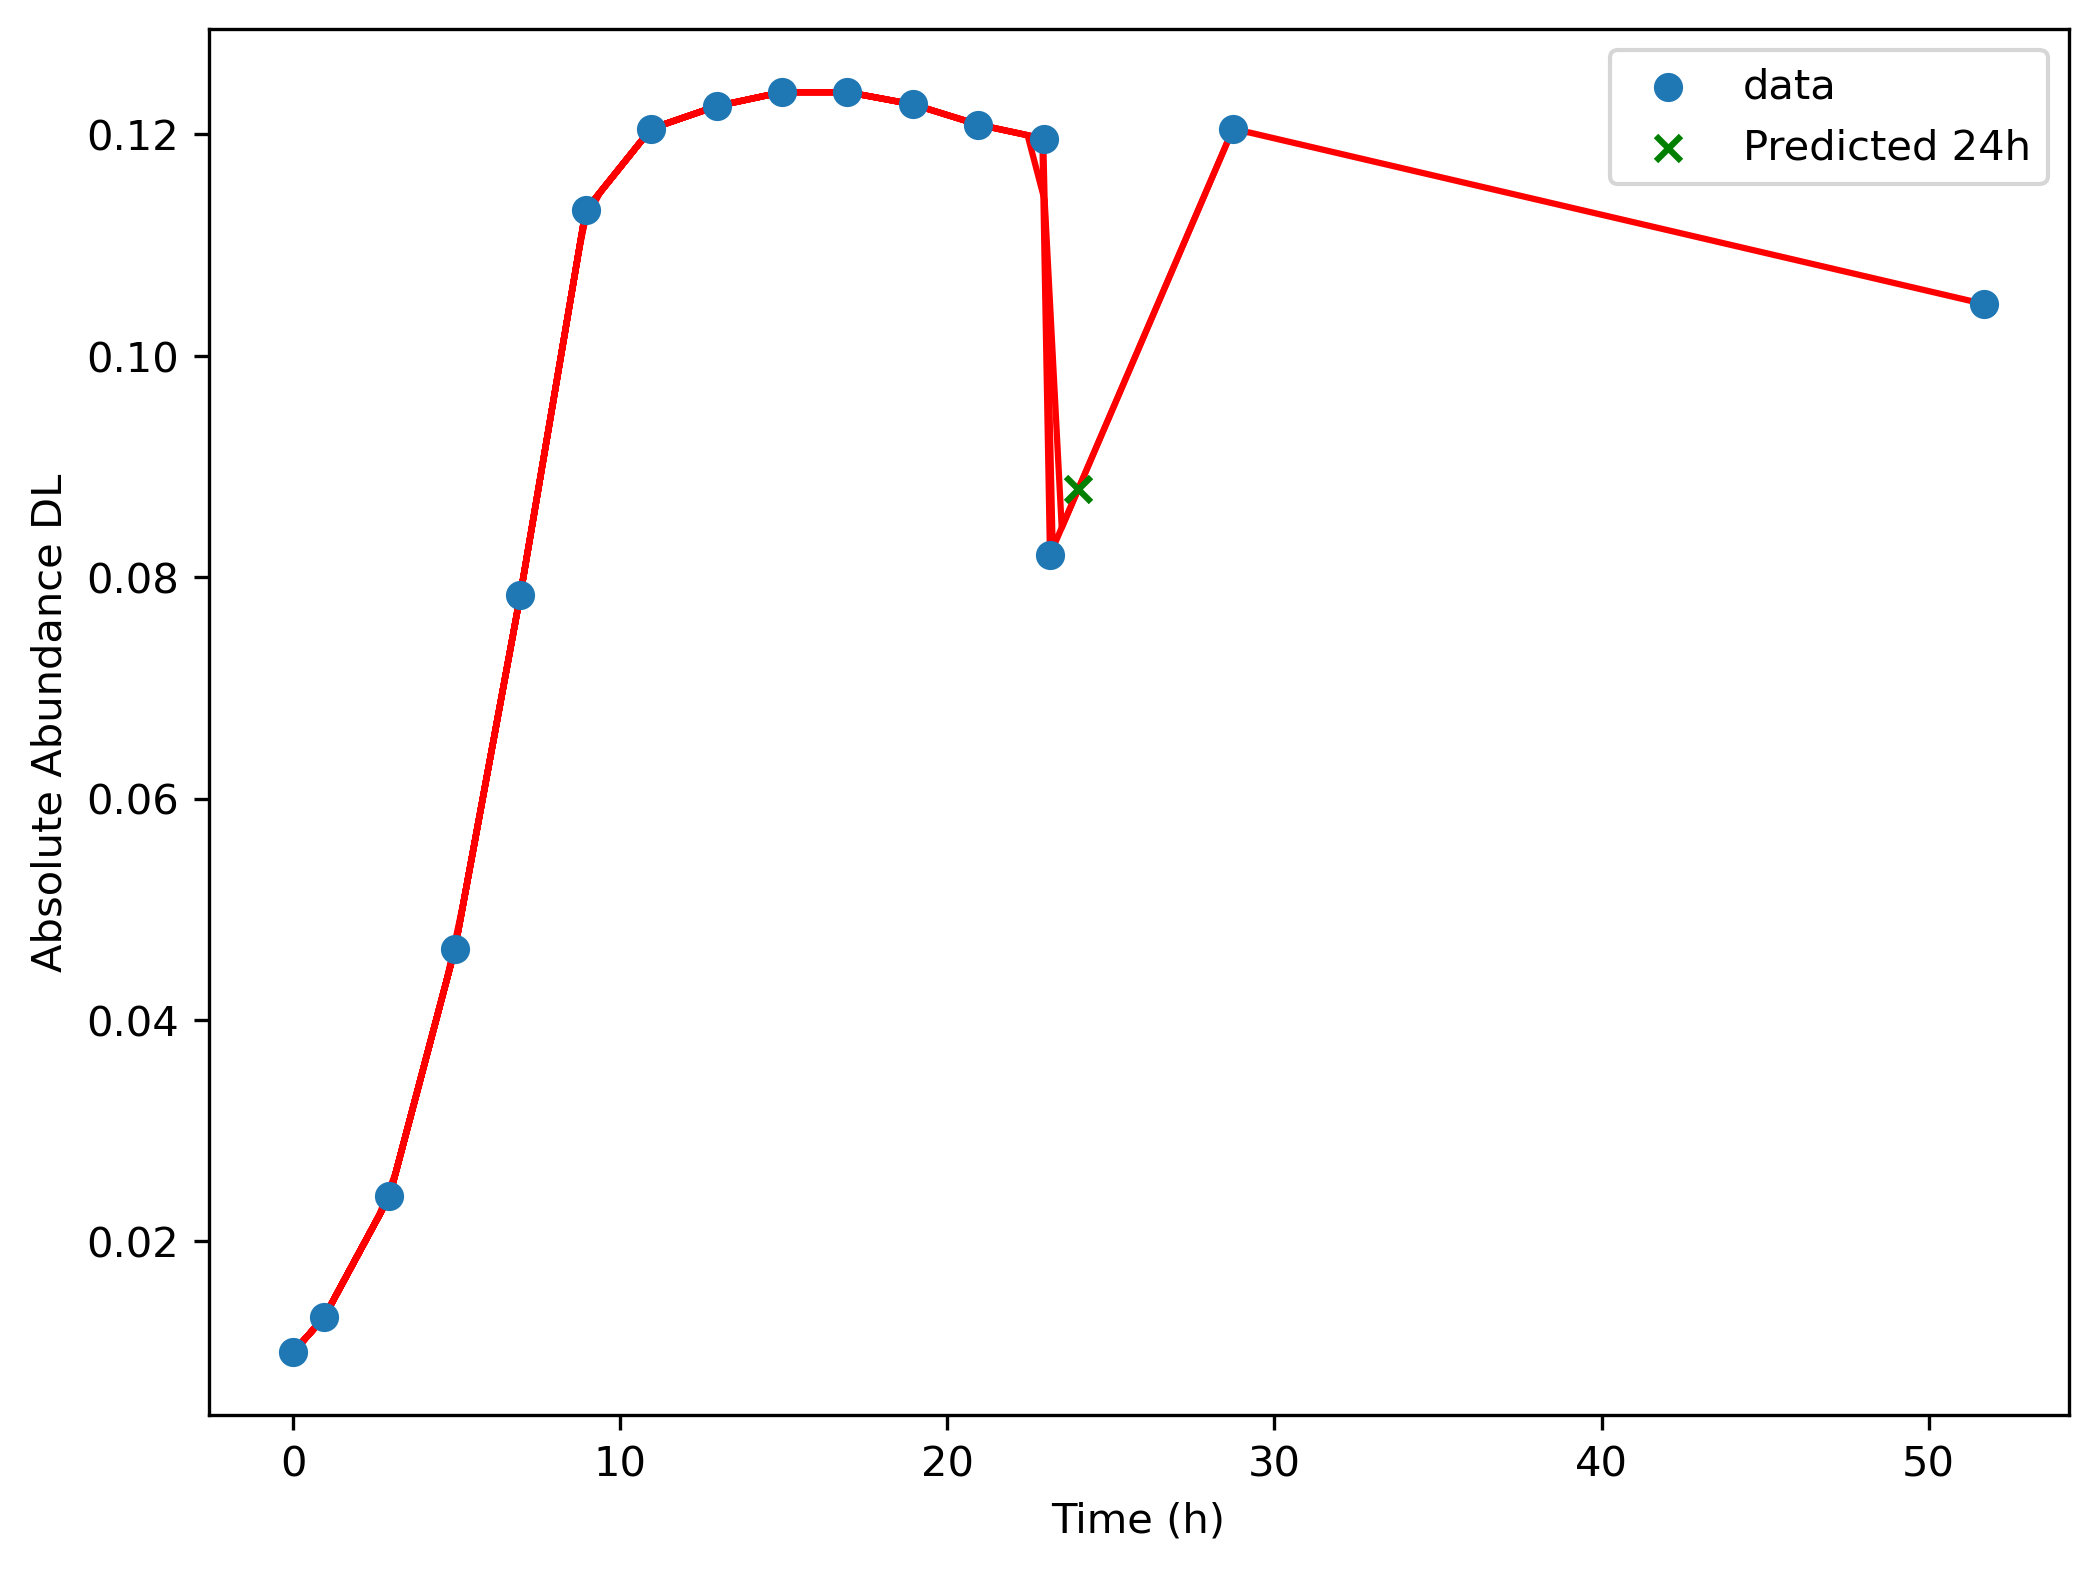

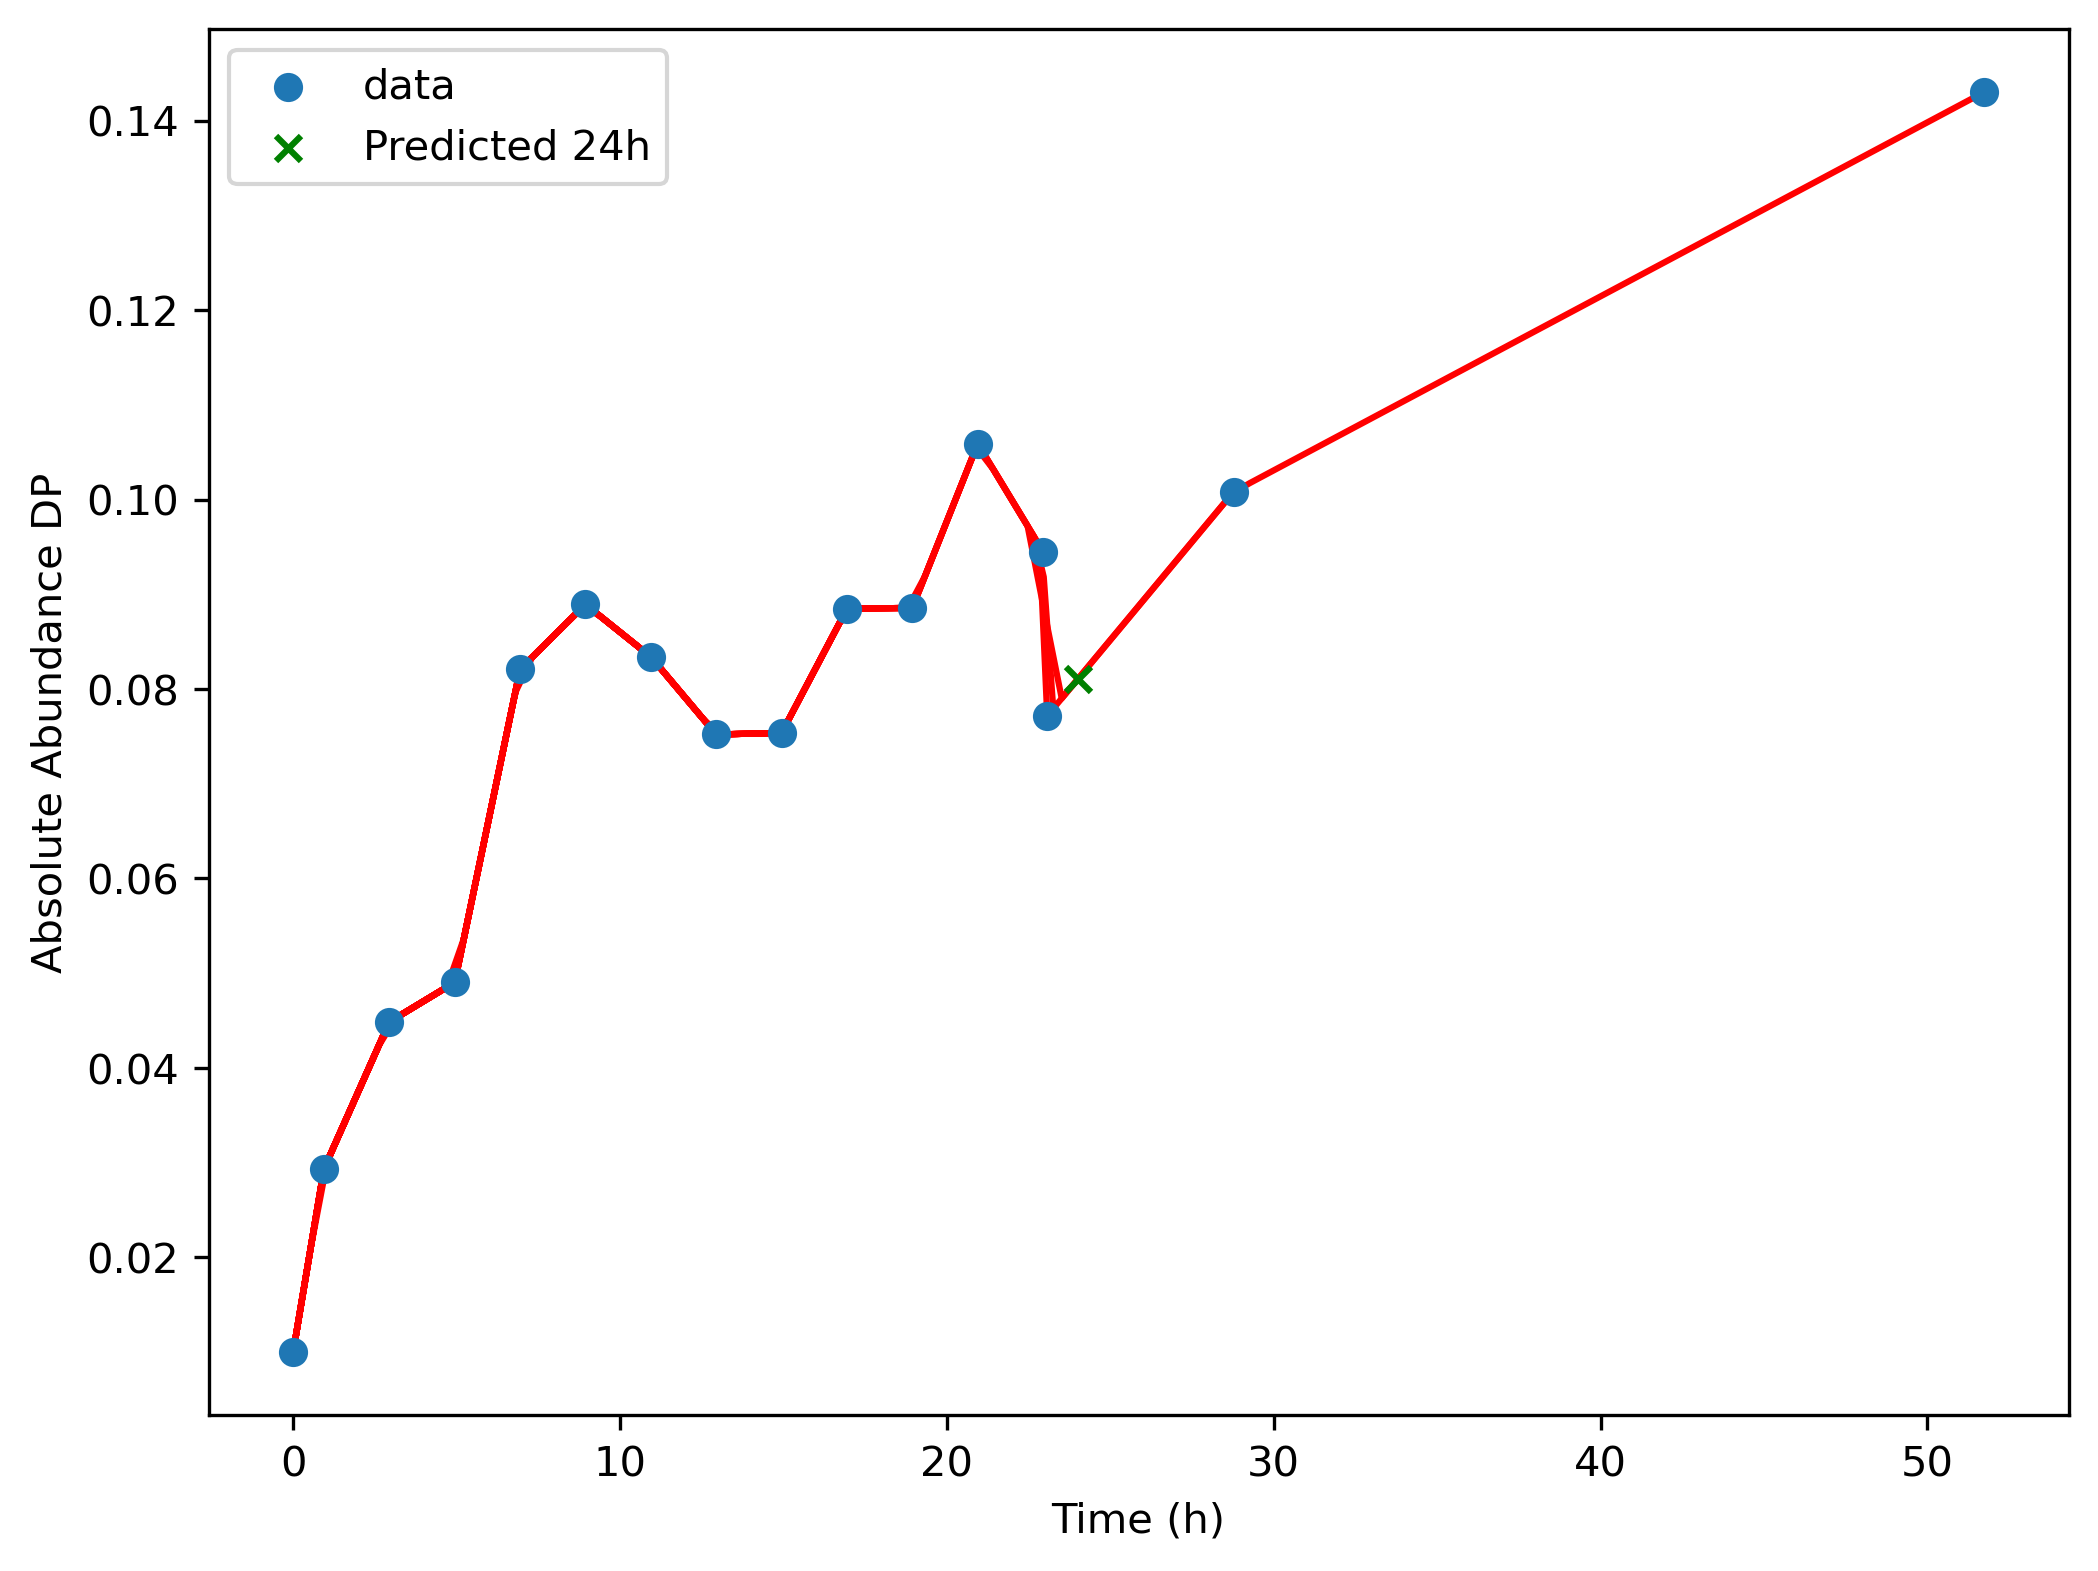

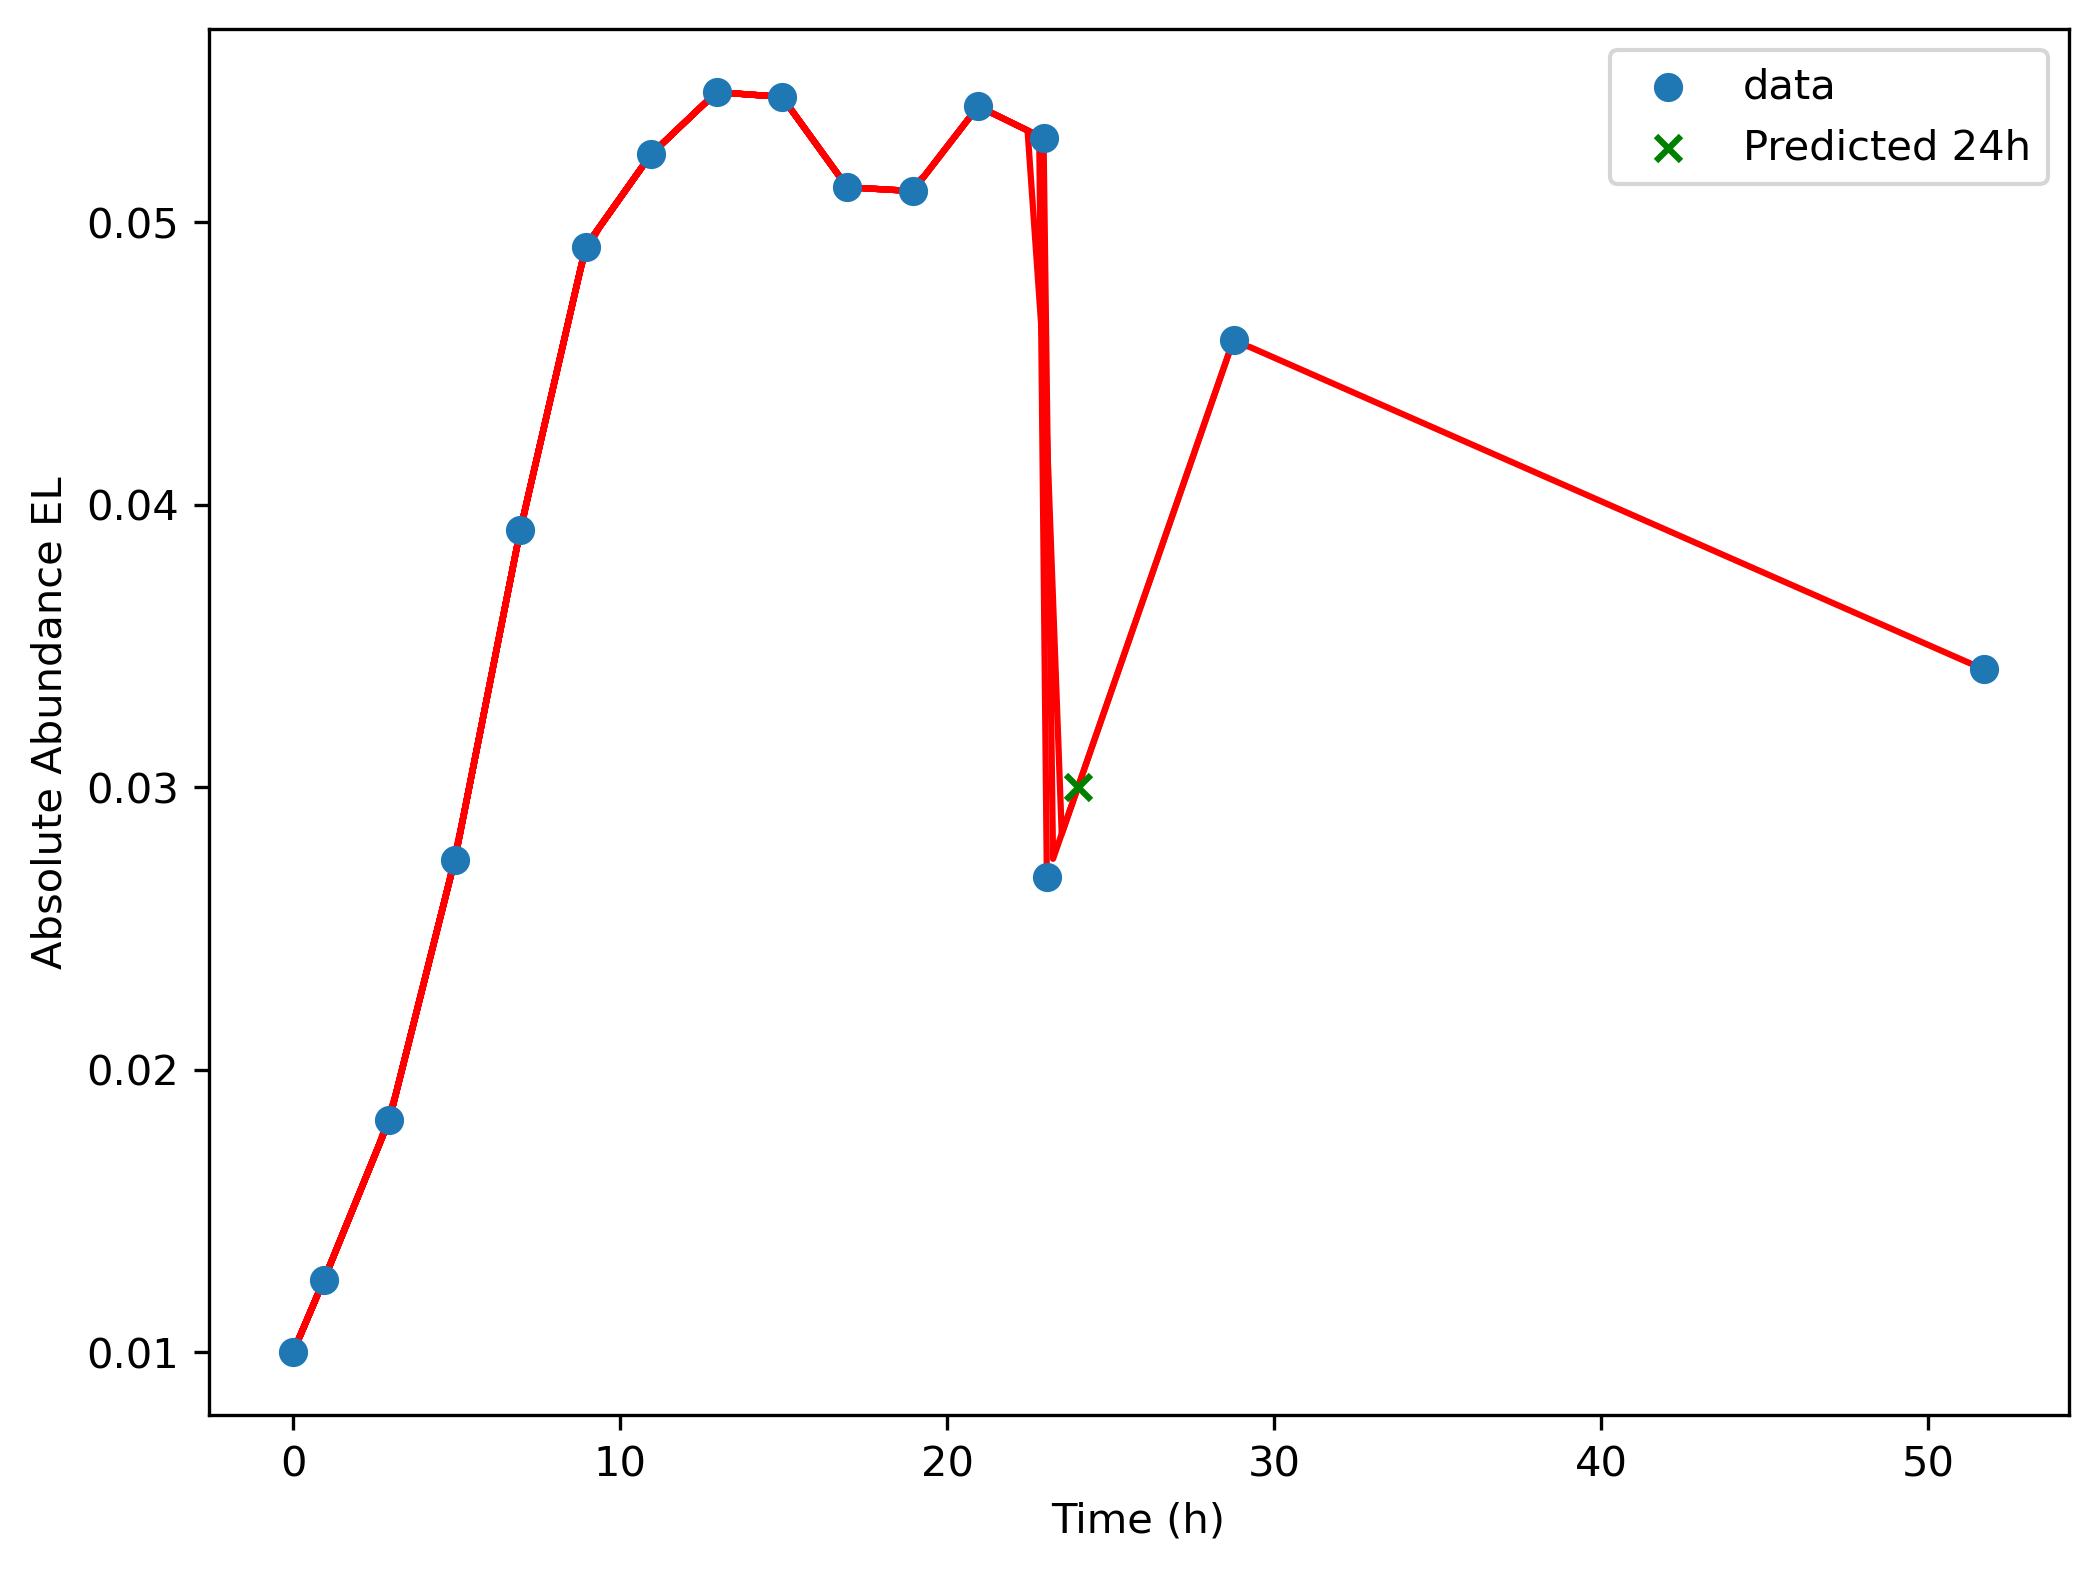

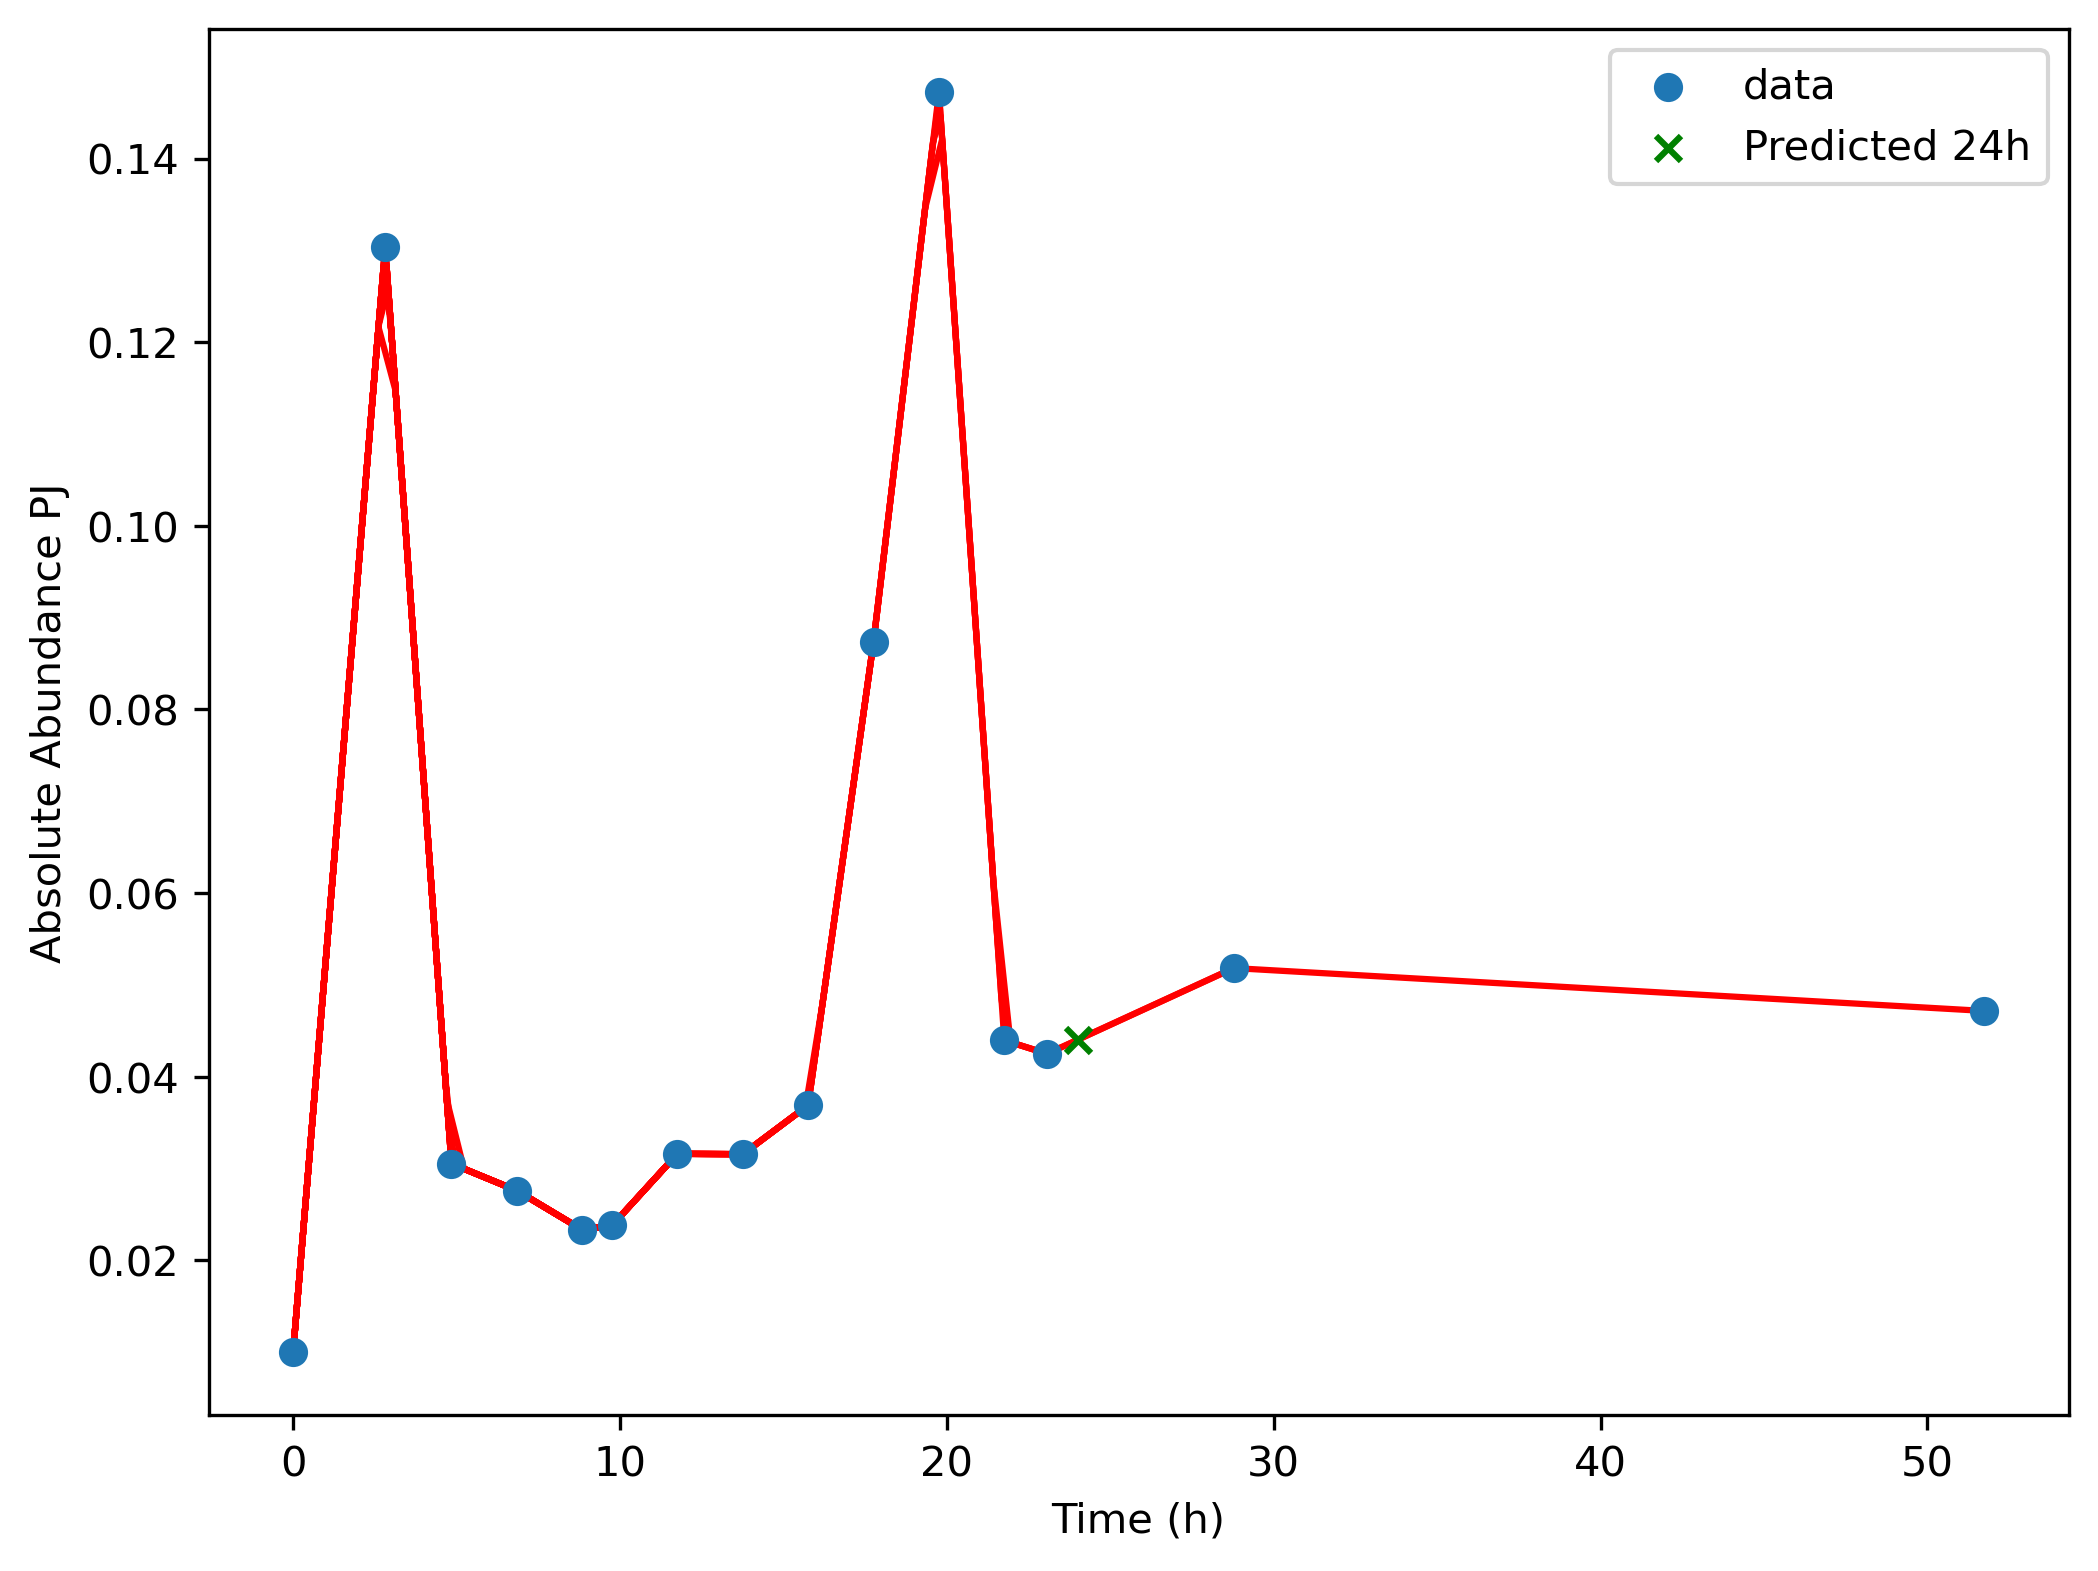

In [148]:
nocarb_df = pd.read_csv('Data/No carb_full.csv')
nocarb_df = nocarb_df.rename(columns={
    'S1': 'PJ',
    'S2': 'BV',
    'S3': 'AC',
    'S4': 'DP',
    'S5': 'BT',
    'S6': 'DL',
    'S7': 'BH',
    'S8': 'BP',
    'S9': 'CS',
    'S10': 'EL'
})

conditions = nocarb_df['Treatments'].unique()
dict_conditions = {}
for condition in conditions:
    nocarb_cond = nocarb_df[nocarb_df['Treatments'] == condition]
    min_t = nocarb_cond['Time'].min()
    max_t = nocarb_cond['Time'].max()
    if max_t < 24:
        print(f"Condition {condition} has a max time of {max_t}h, which is less than 24h.")
        continue
    elif min_t > 0:
        print(f"Condition {condition} has a min time of {min_t}h, which is greater than 0h.")
        continue
    elif max_t == 24 and min_t == 0:
        dict_conditions[condition] = nocarb_cond[(nocarb_cond['Time'] == 0) | (nocarb_cond['Time'] == 24)].reset_index(drop=True)    
    else:
        # these are the monoculture conditions
        mono = condition[-2:]
        growth = nocarb_cond[mono]
        time = nocarb_cond['Time']
        # interpolate to get 24
        at_0 = nocarb_cond[nocarb_cond['Time'] == 0]
        interpolate = spi.make_interp_spline(
            time, growth, k = 1)
        fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
        time_sim = np.linspace(0, time, 100)
        pred_24 = interpolate(24)
        ax.scatter(time, growth, zorder = 2, label='data')  
        ax.plot(time_sim, interpolate(time_sim), color='red', zorder = 1)
        ax.scatter(24, pred_24,  color='green', marker='x', zorder = 3, label = 'Predicted 24h')
        ax.legend()
        ax.set_xlabel('Time (h)')
        ax.set_ylabel(f'Absolute Abundance {mono}')
        cond_024 = nocarb_cond[nocarb_cond['Time'] == 0]
        pred_24 = cond_024.copy().reset_index(drop=True)
        pred_24['Time'] = 24
        pred_24['Treatments'] = condition
        pred_24[mono] = interpolate(24)
        cond_024 = pd.concat([cond_024, pred_24], axis=0)
        cond_024 = cond_024.reset_index(drop=True)
        dict_conditions[condition] = cond_024


df_nocarb_treated = pd.concat(dict_conditions.values(), axis=0, ignore_index=True)

df_nocarb_treated.to_csv('Data/NoCarb_treated.csv', index=False)

# Xylan

Condition subcomm3 has a max time of 12.0h, which is less than 24h.
Condition subcomm7 has a max time of 12.0h, which is less than 24h.
Condition subcomm8 has a max time of 12.0h, which is less than 24h.


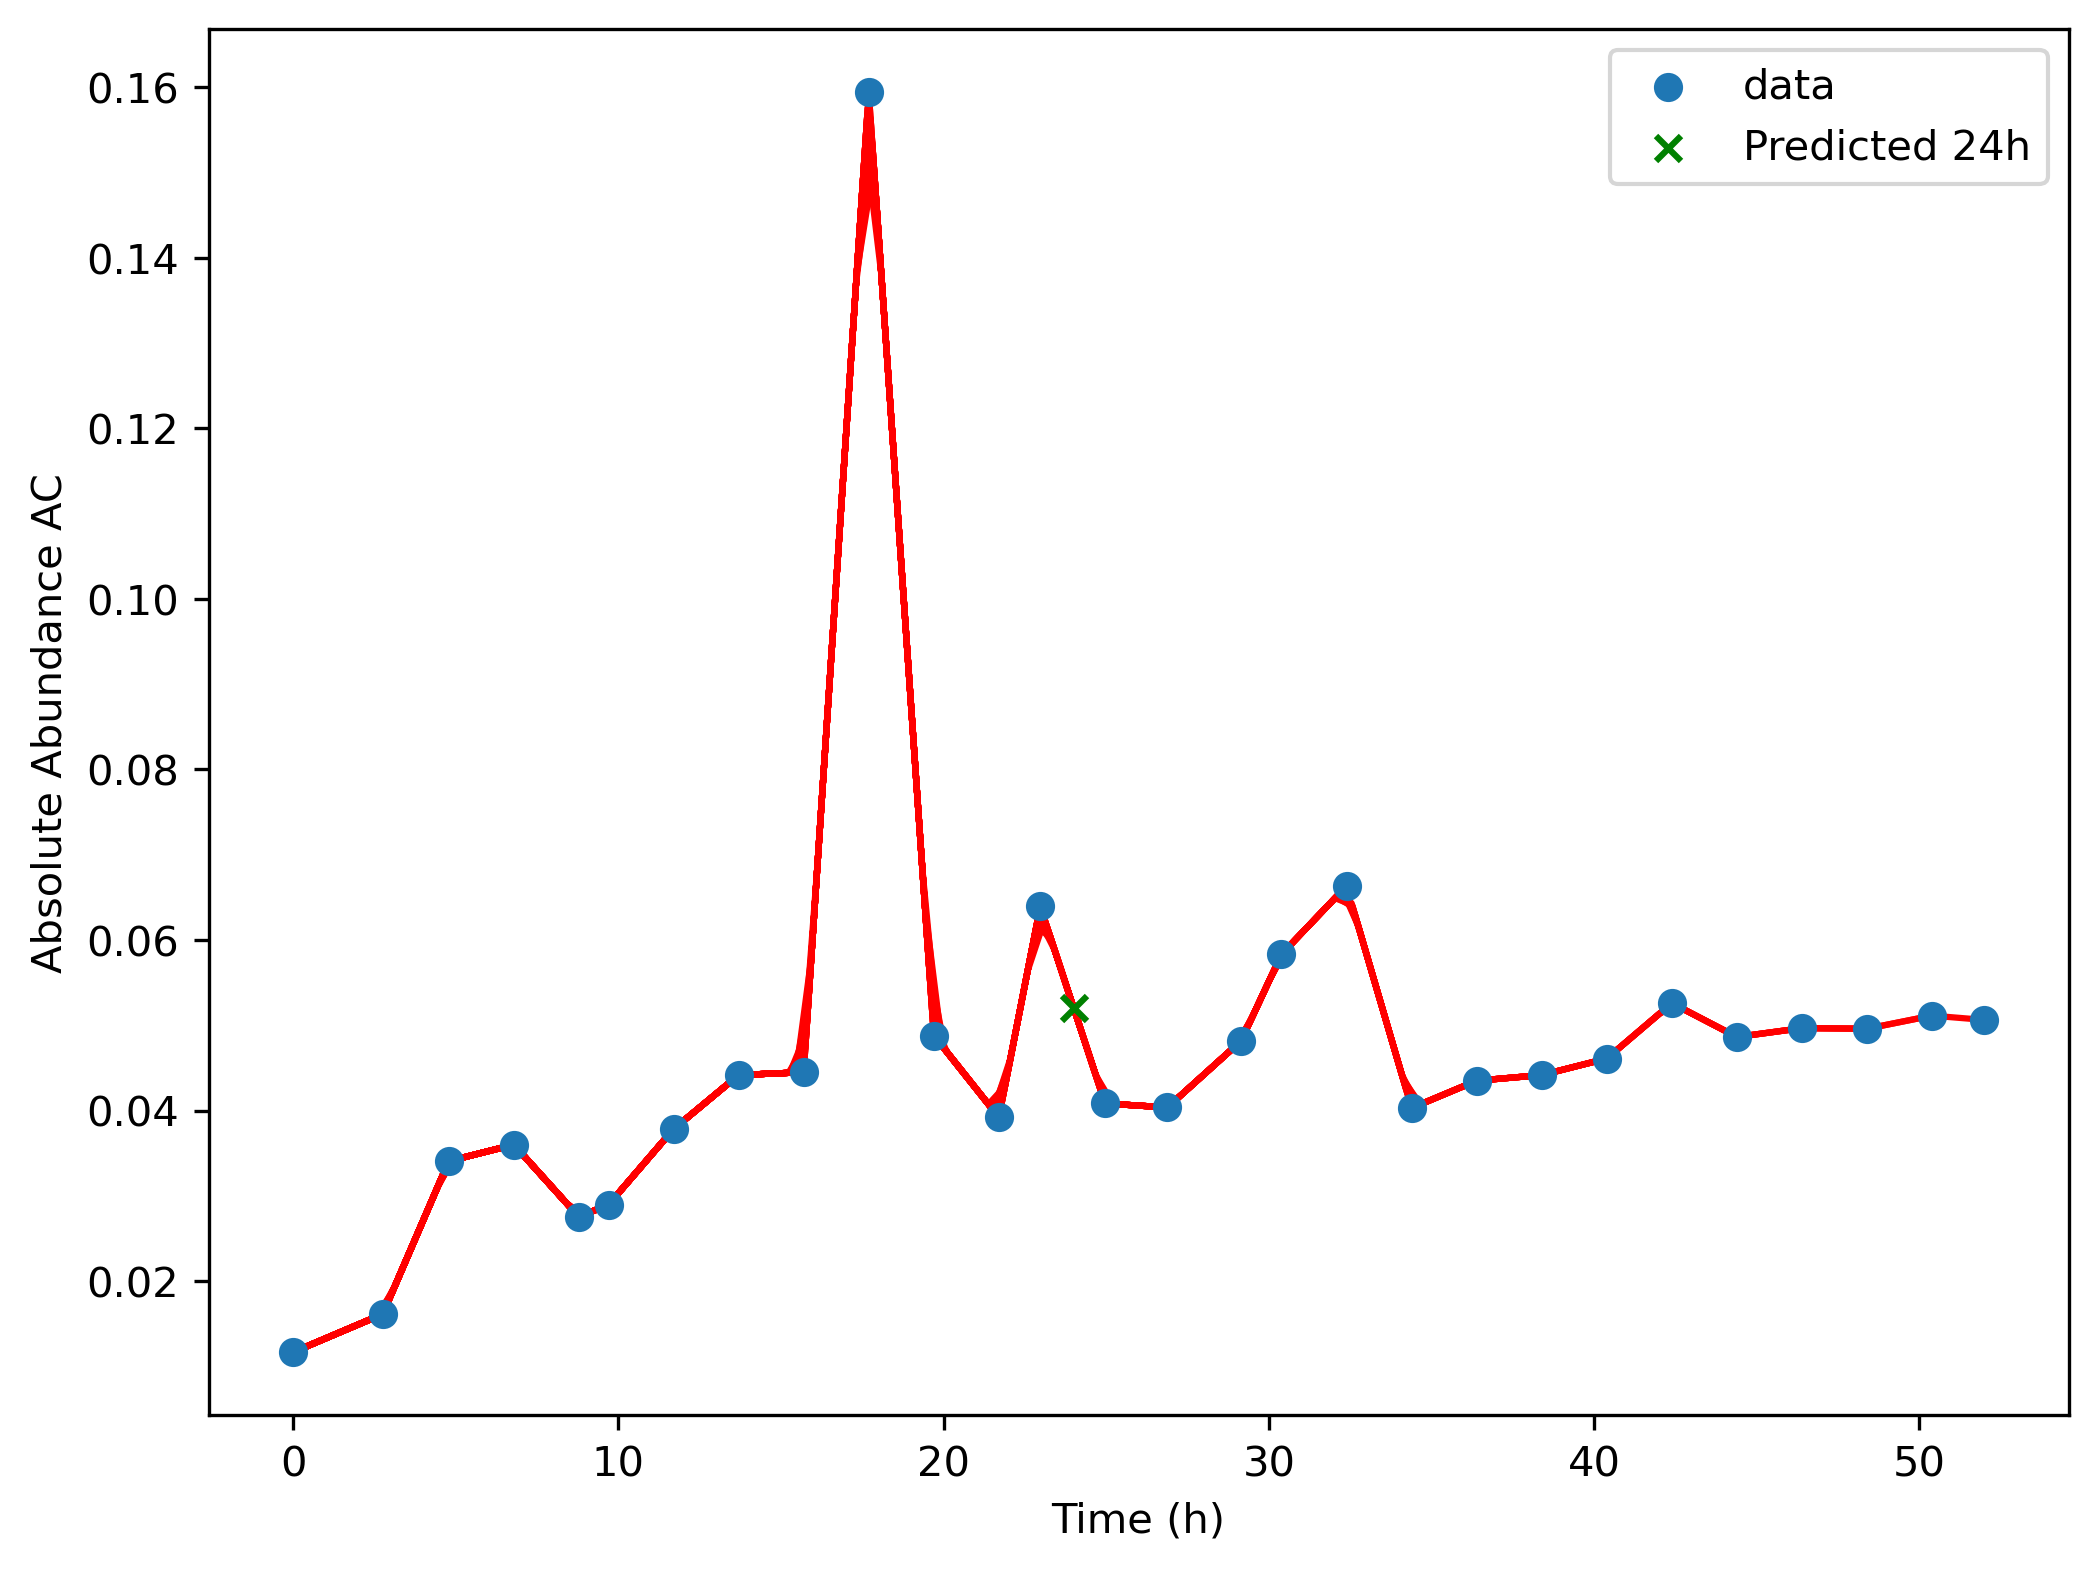

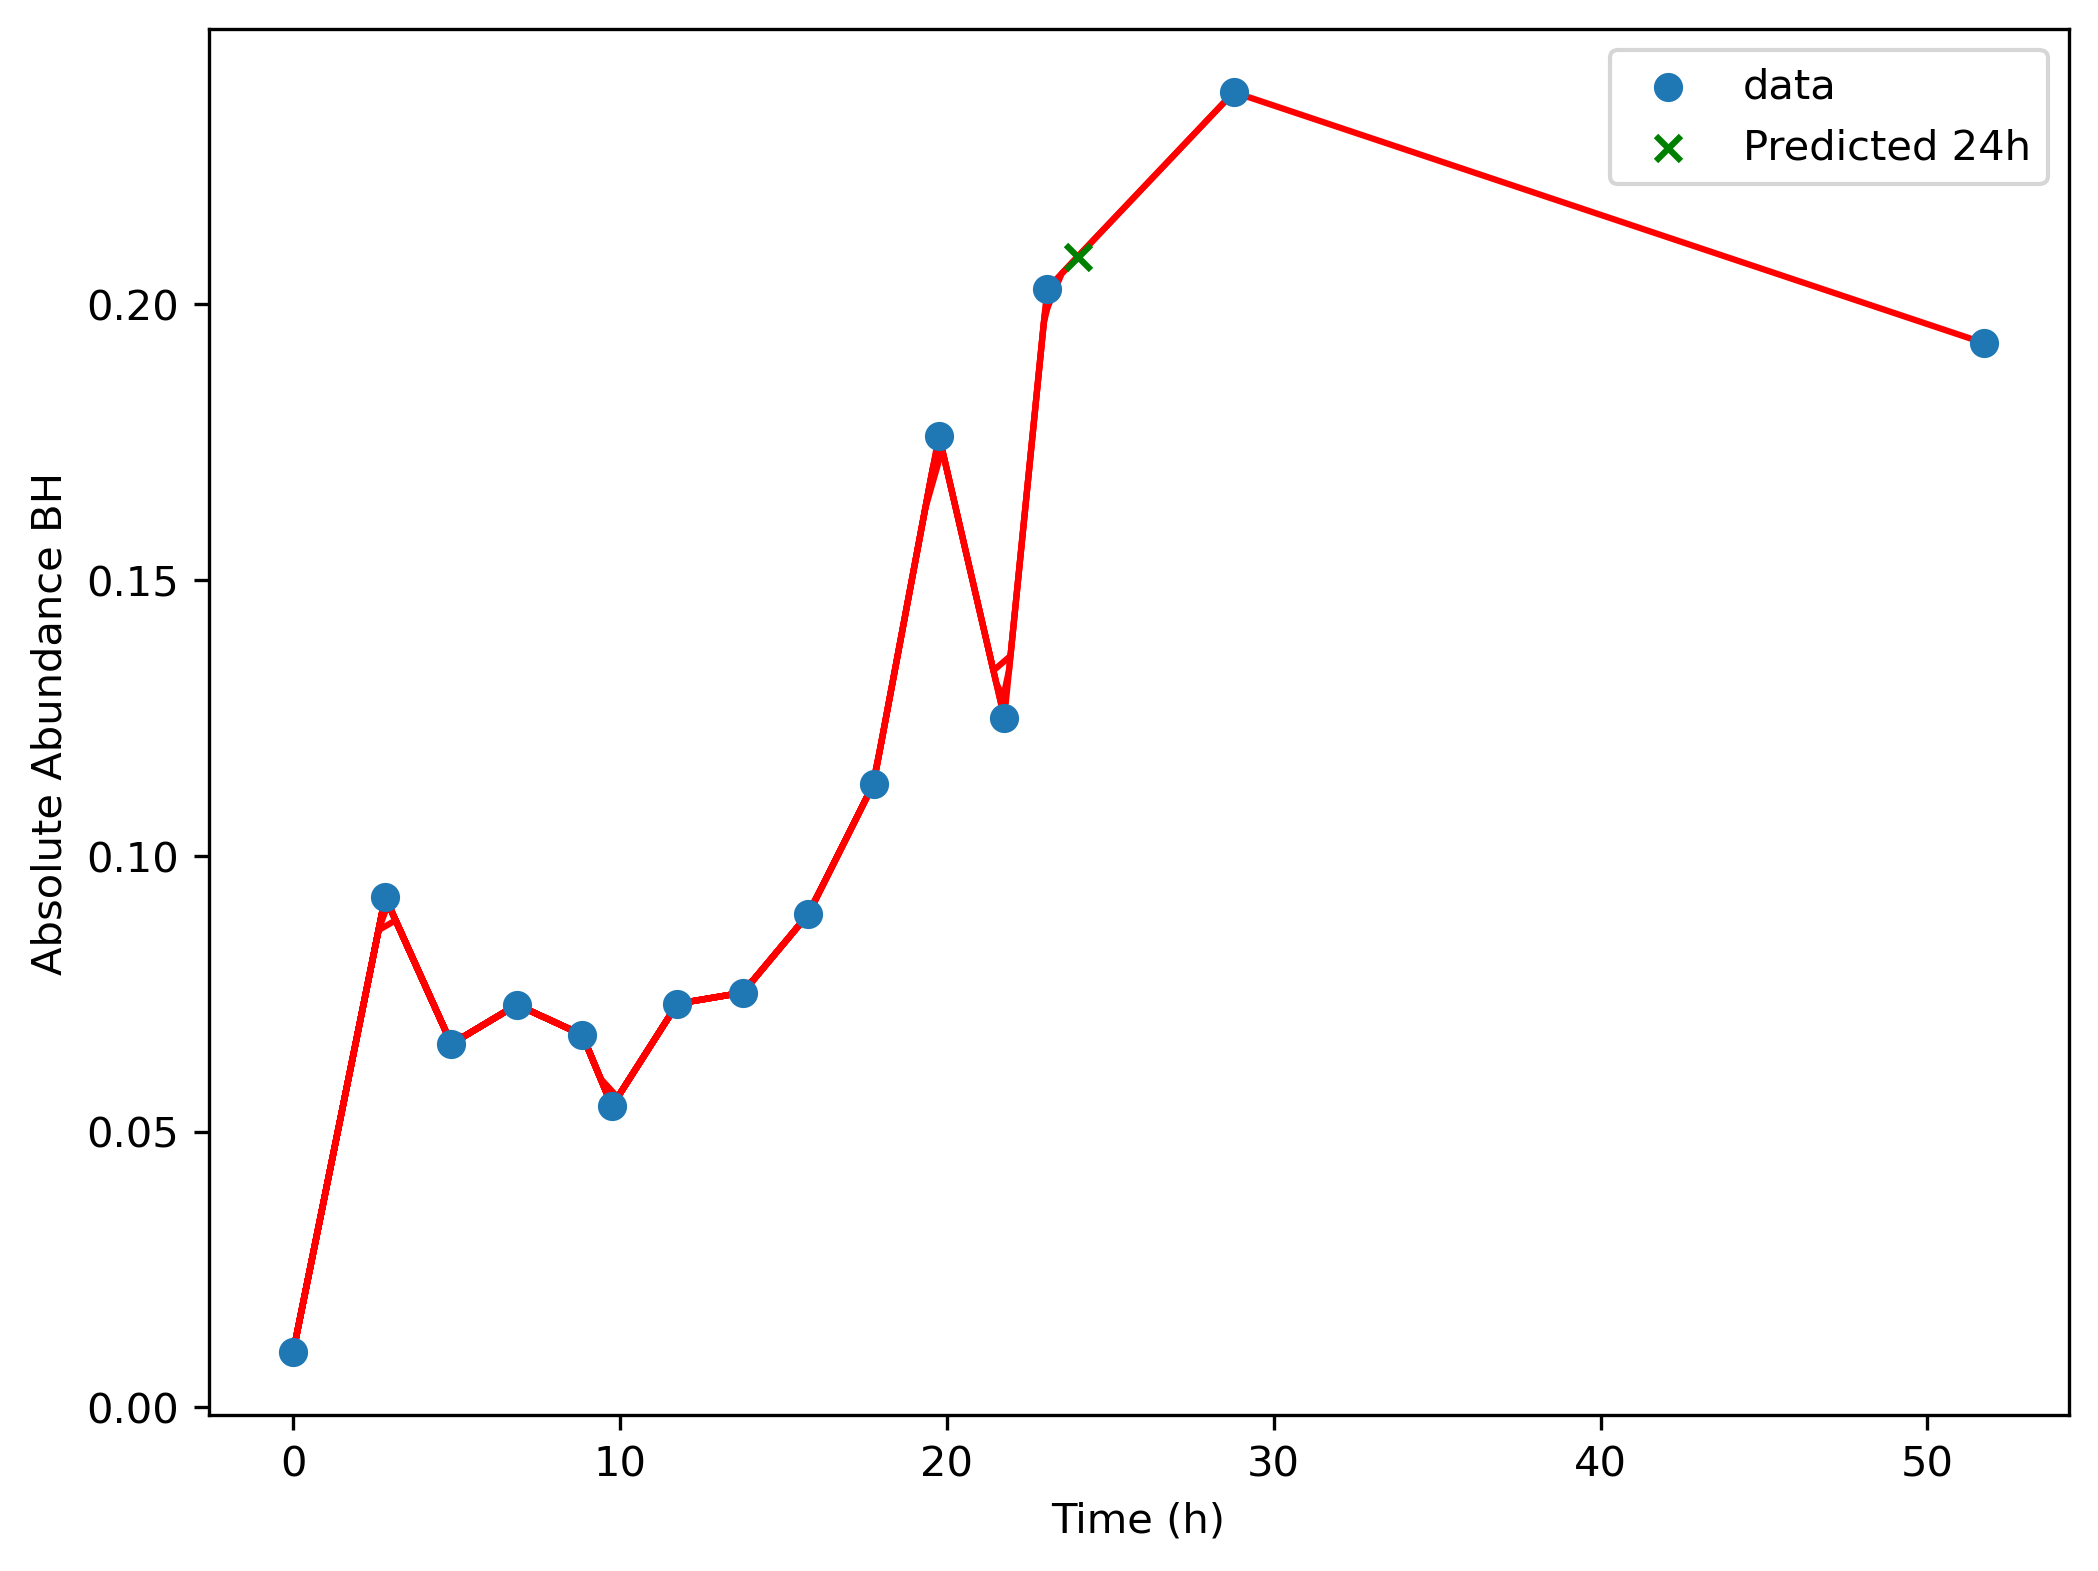

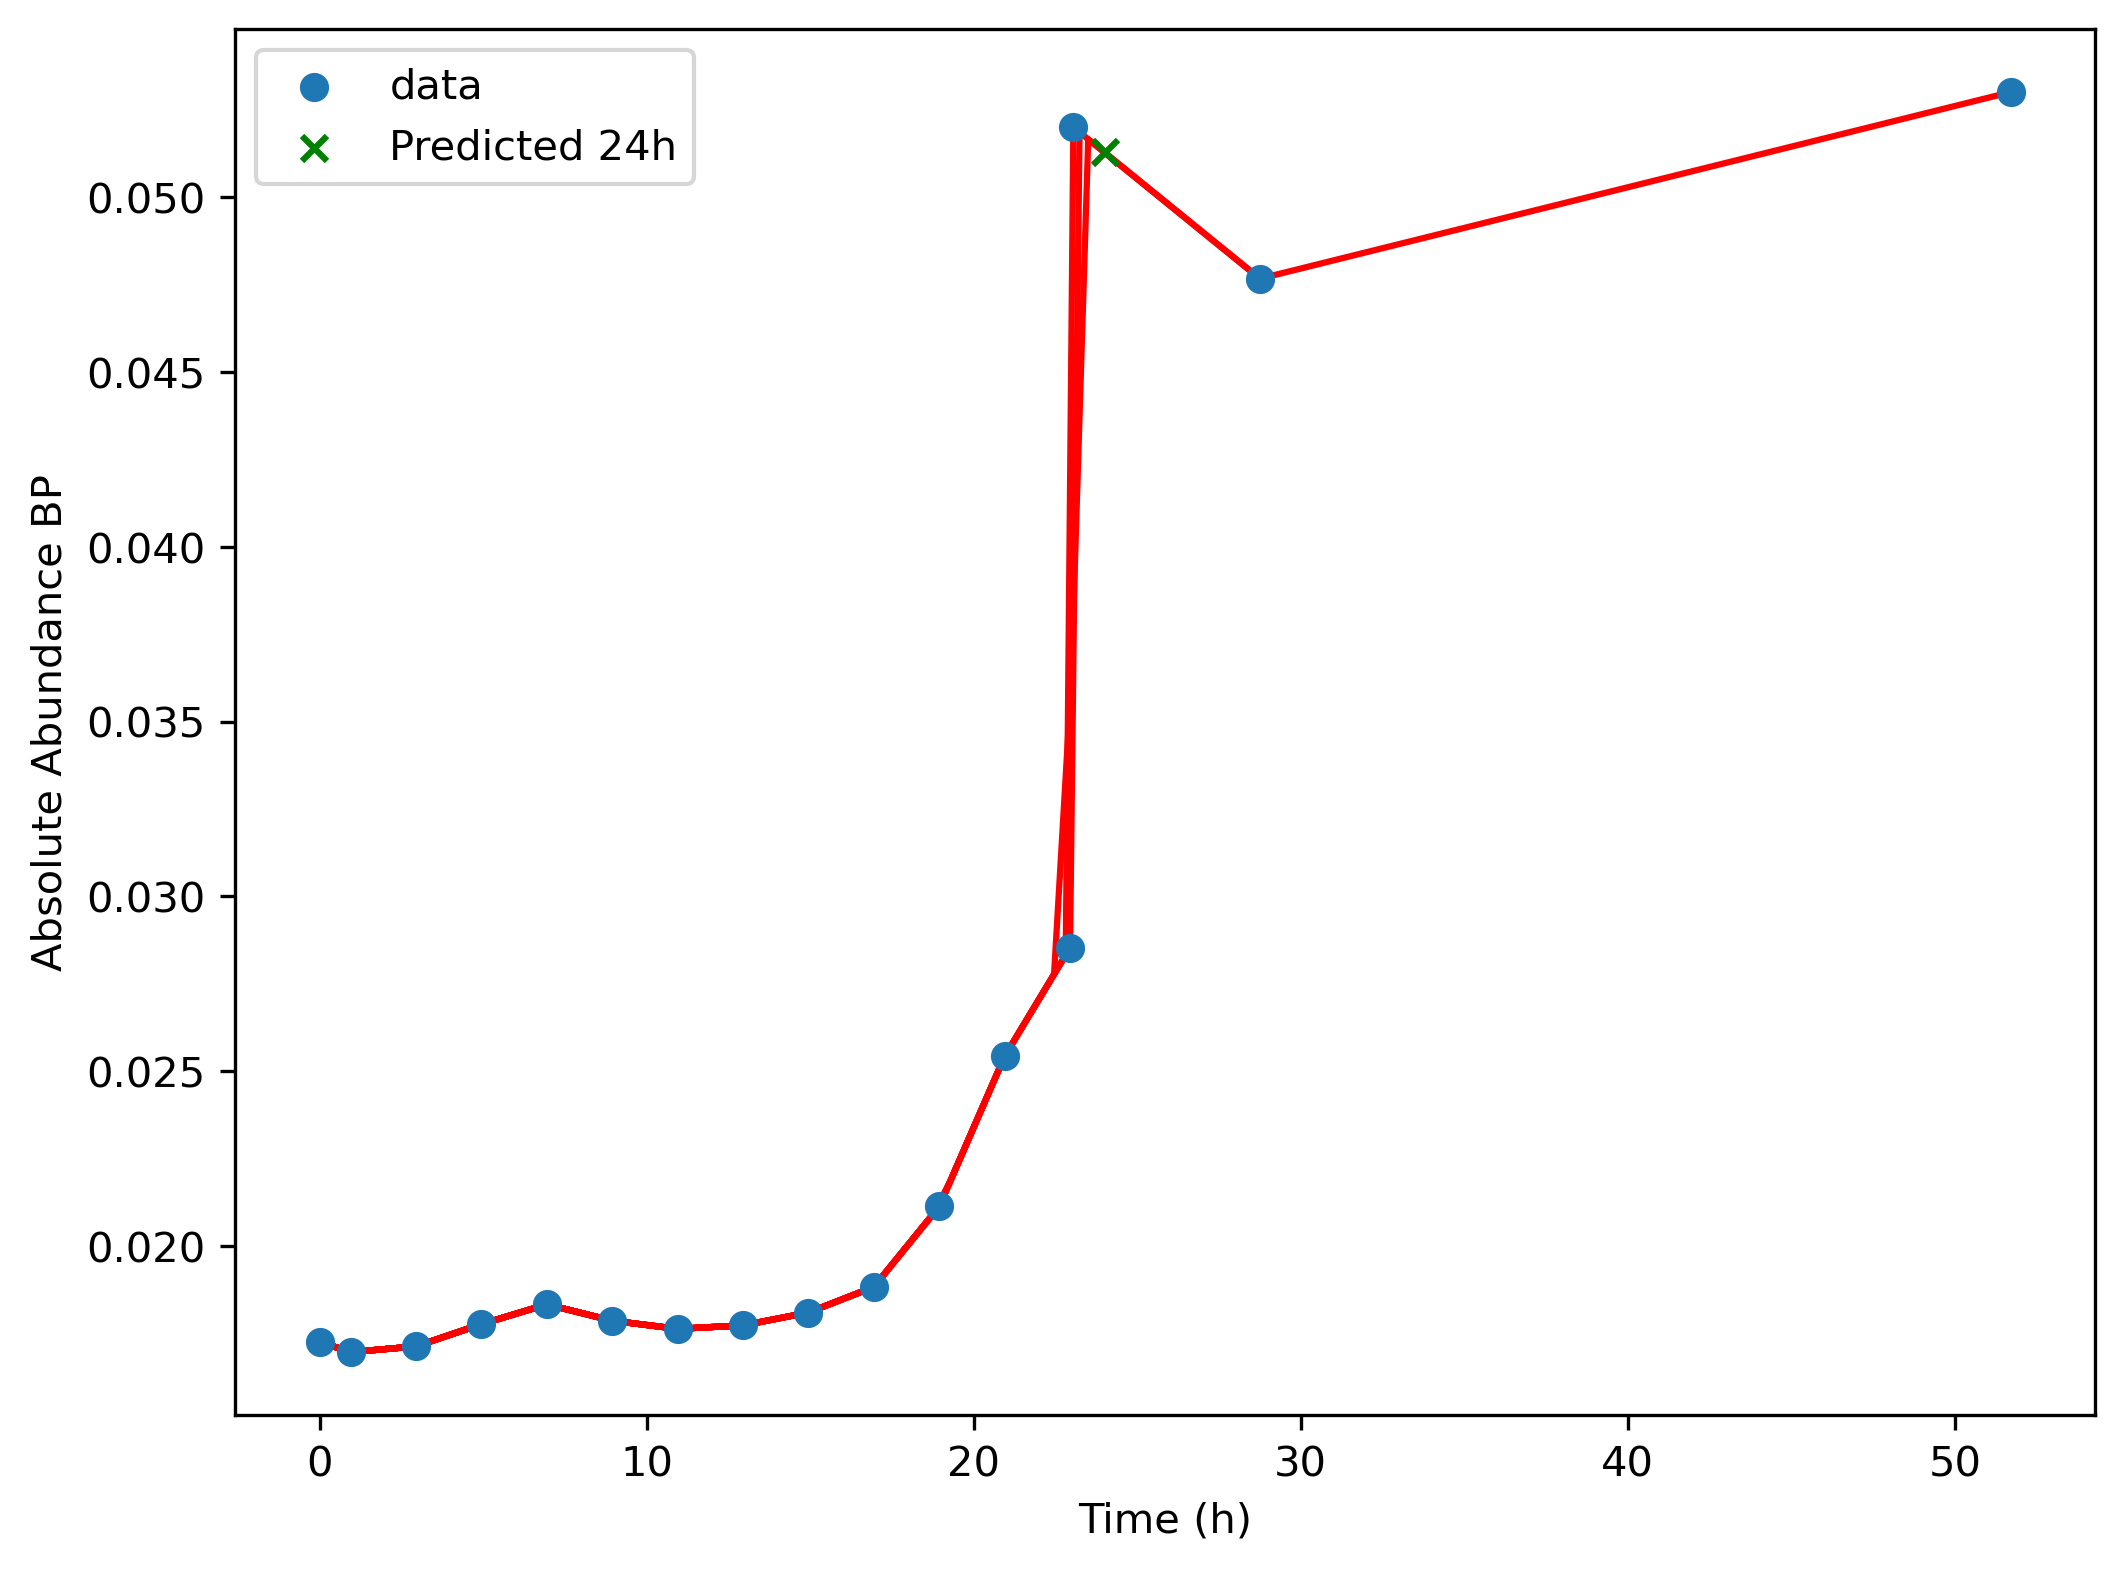

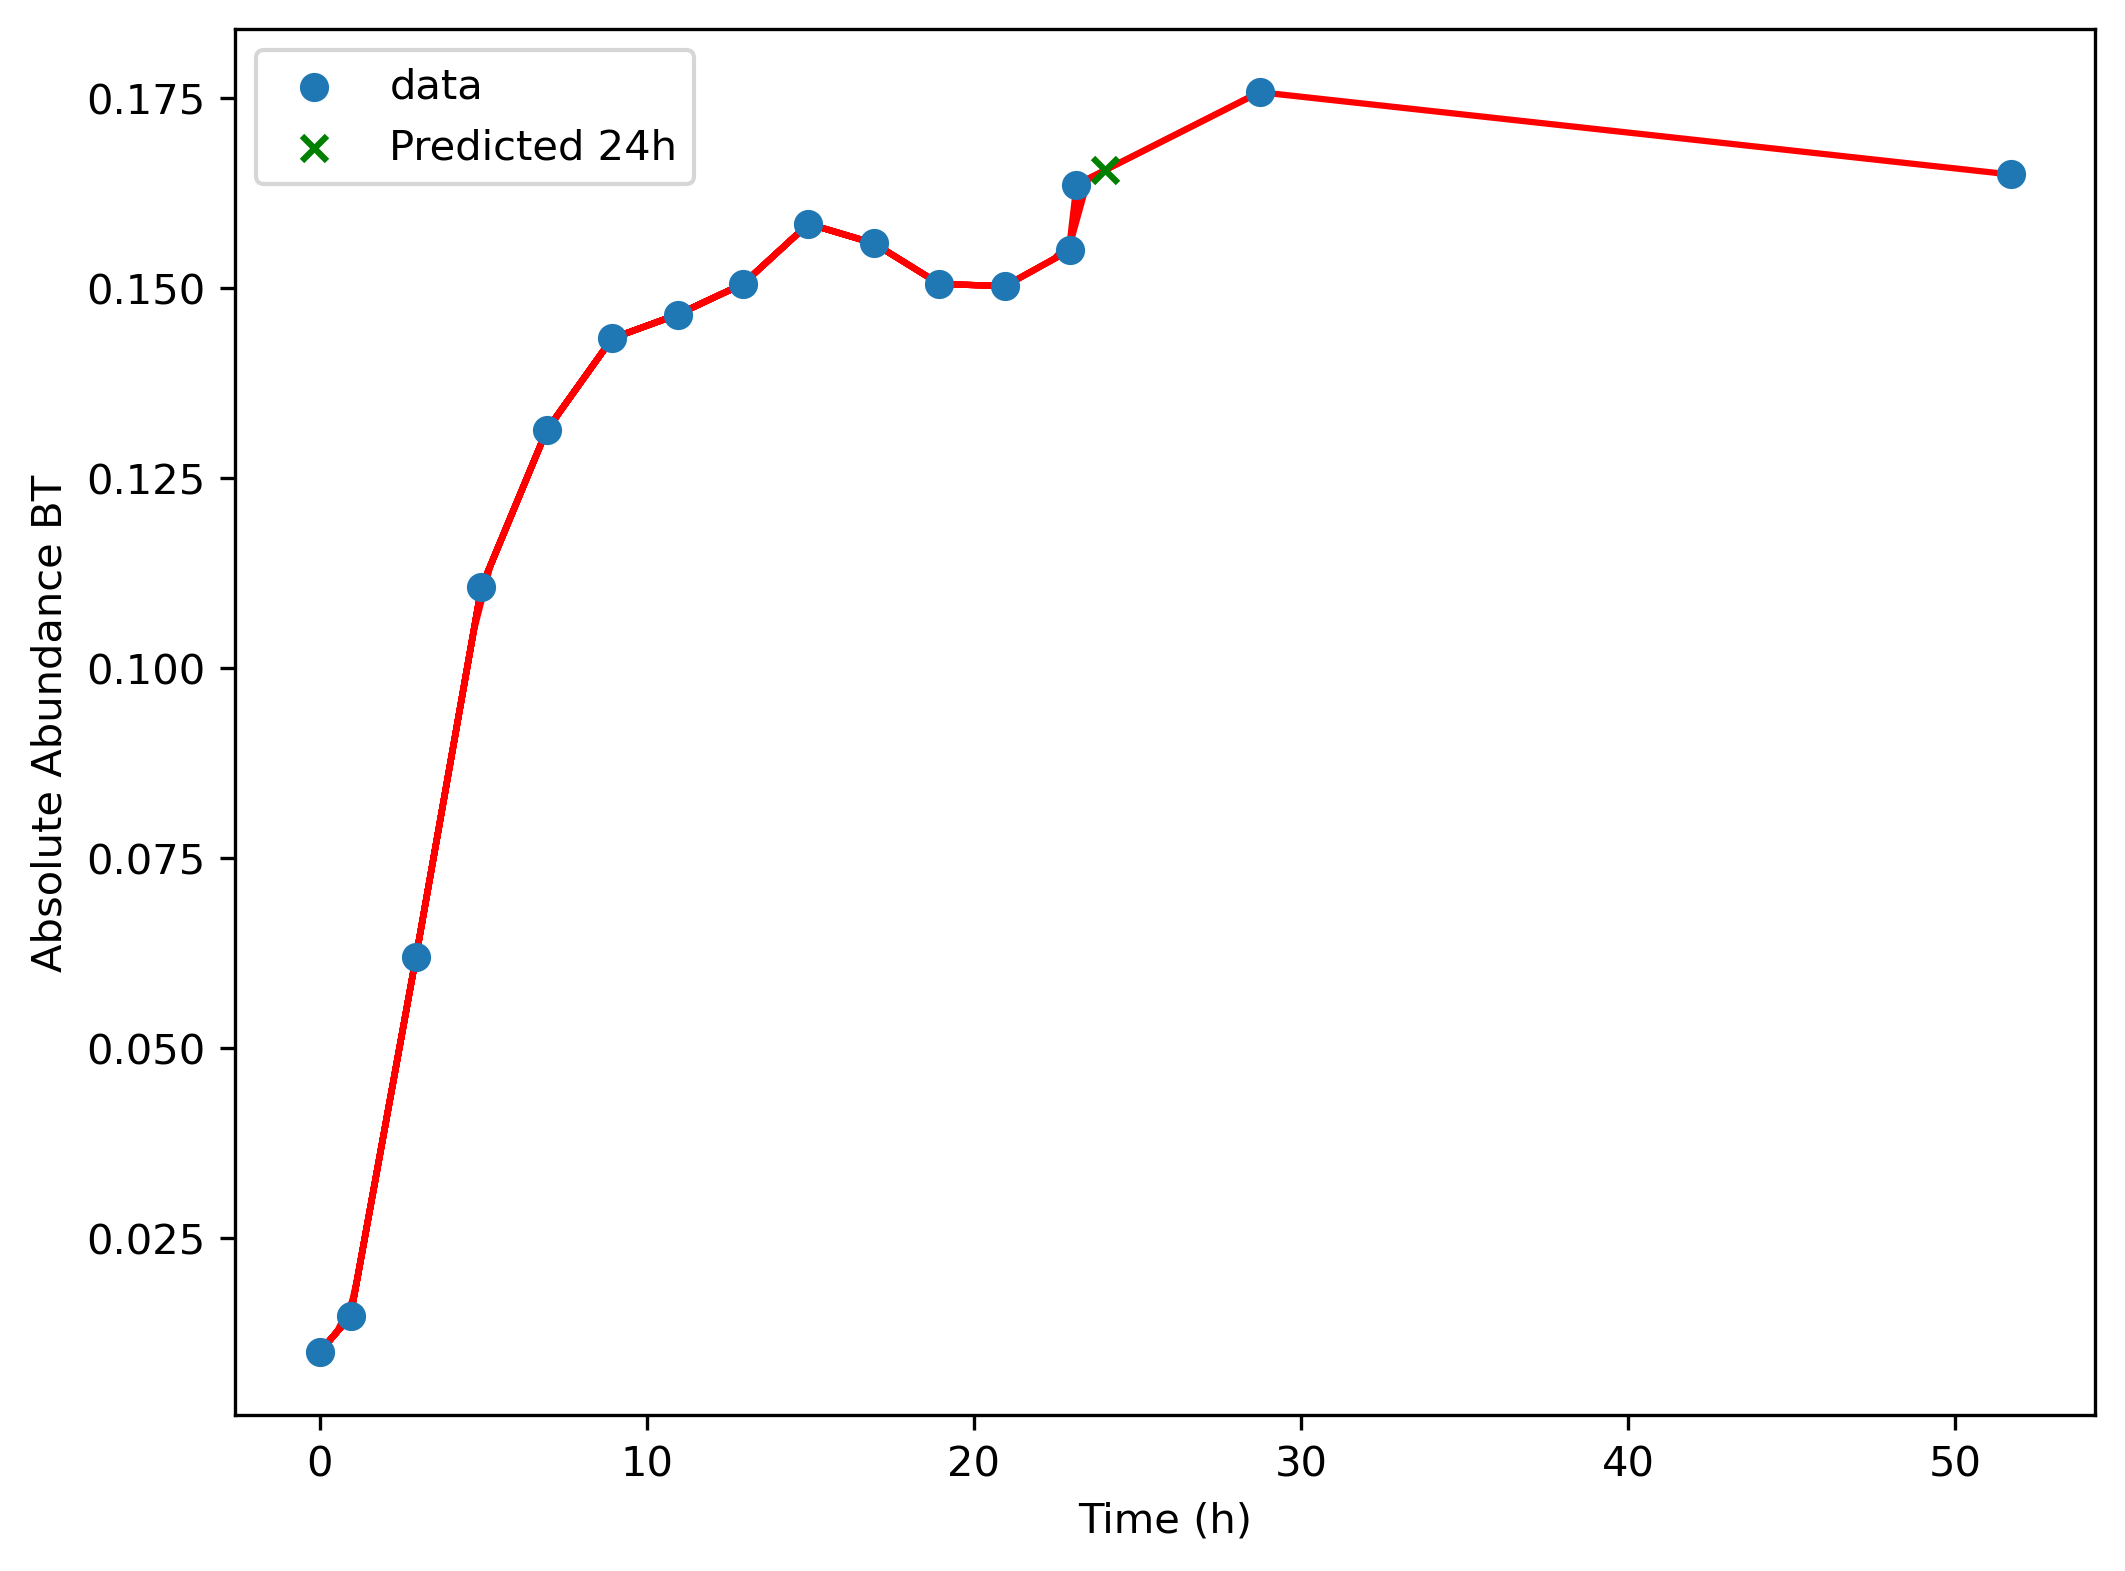

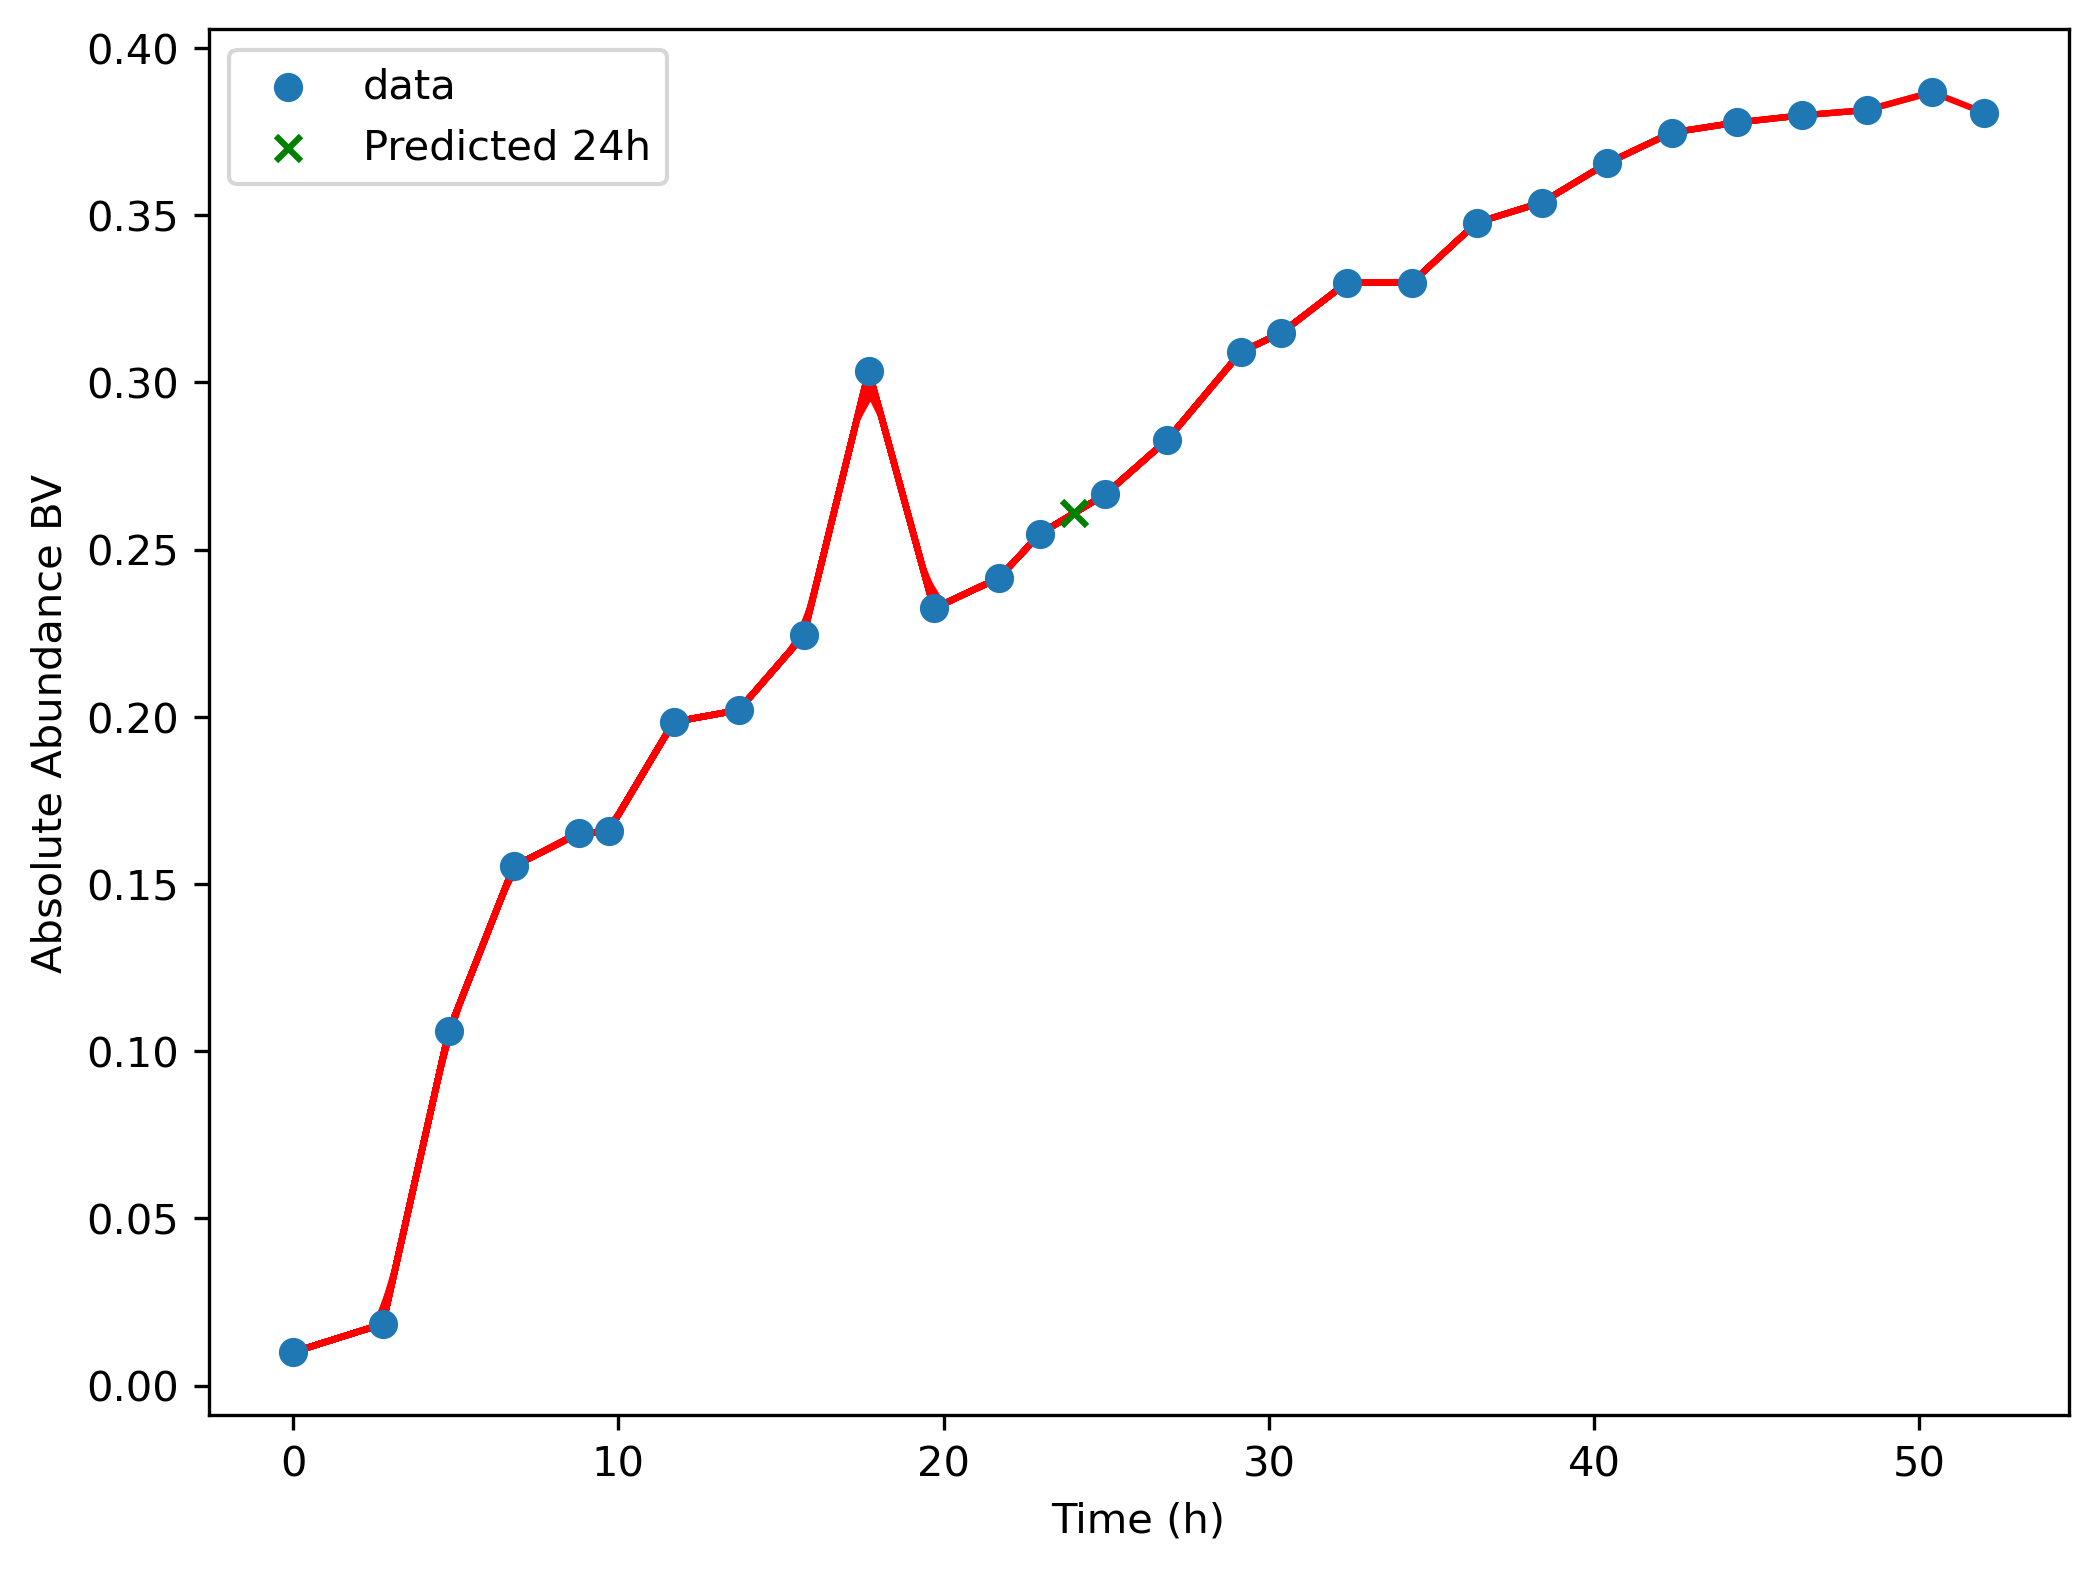

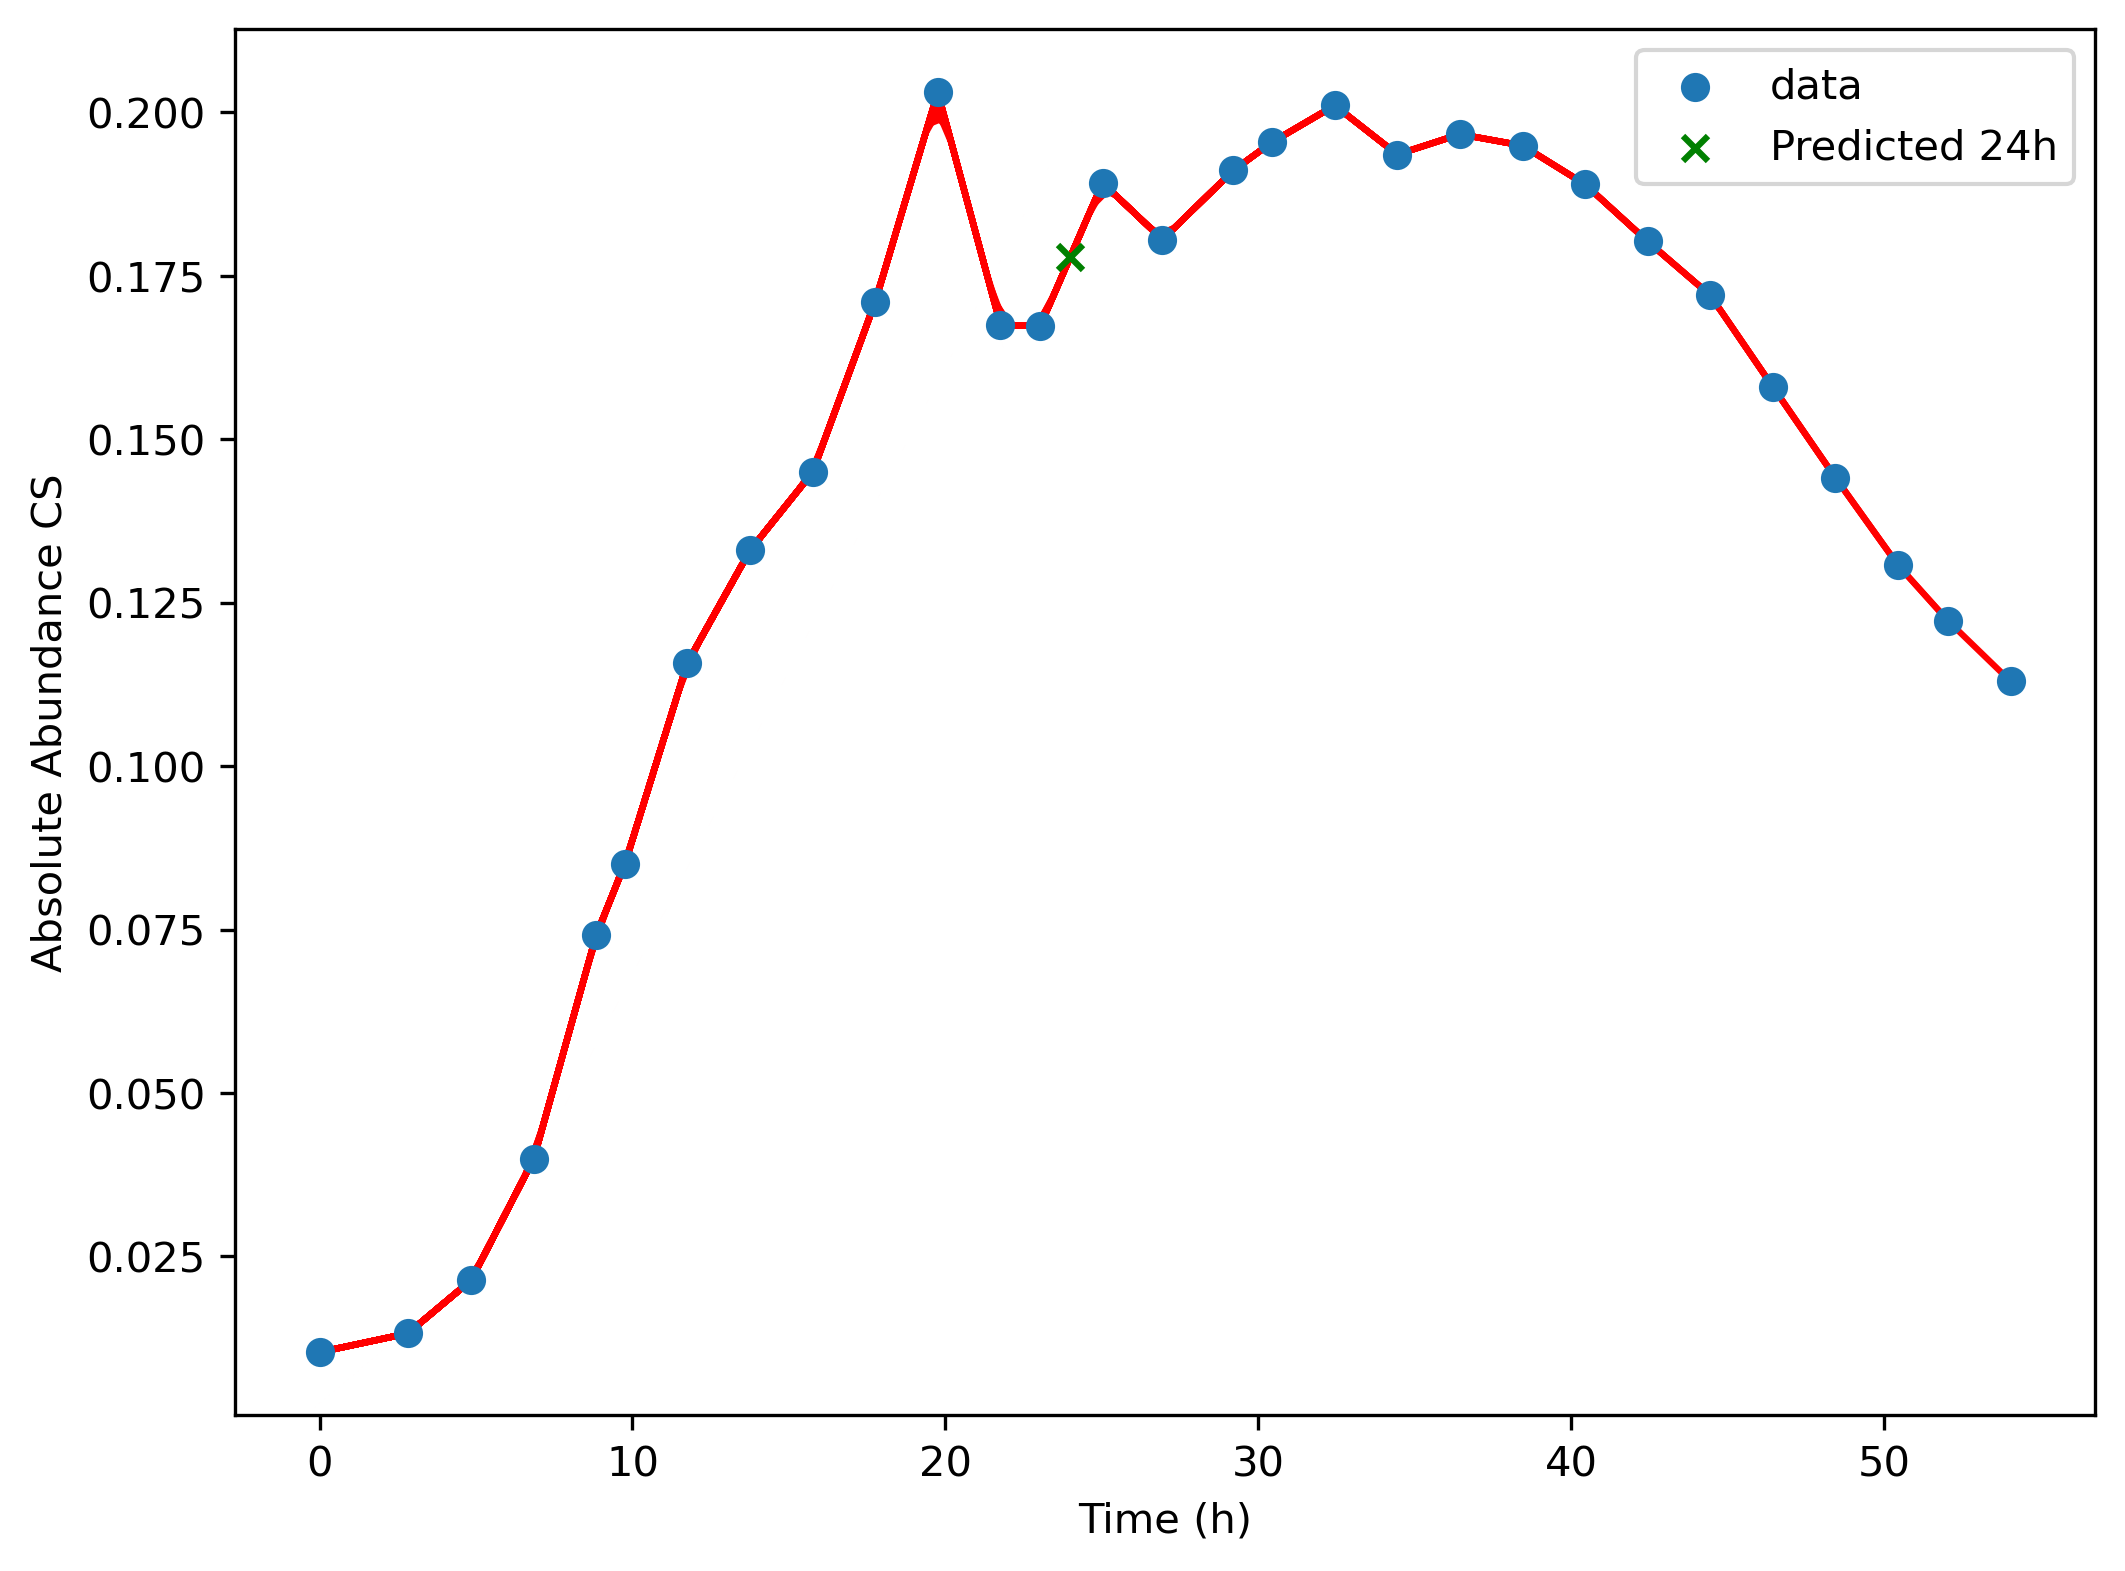

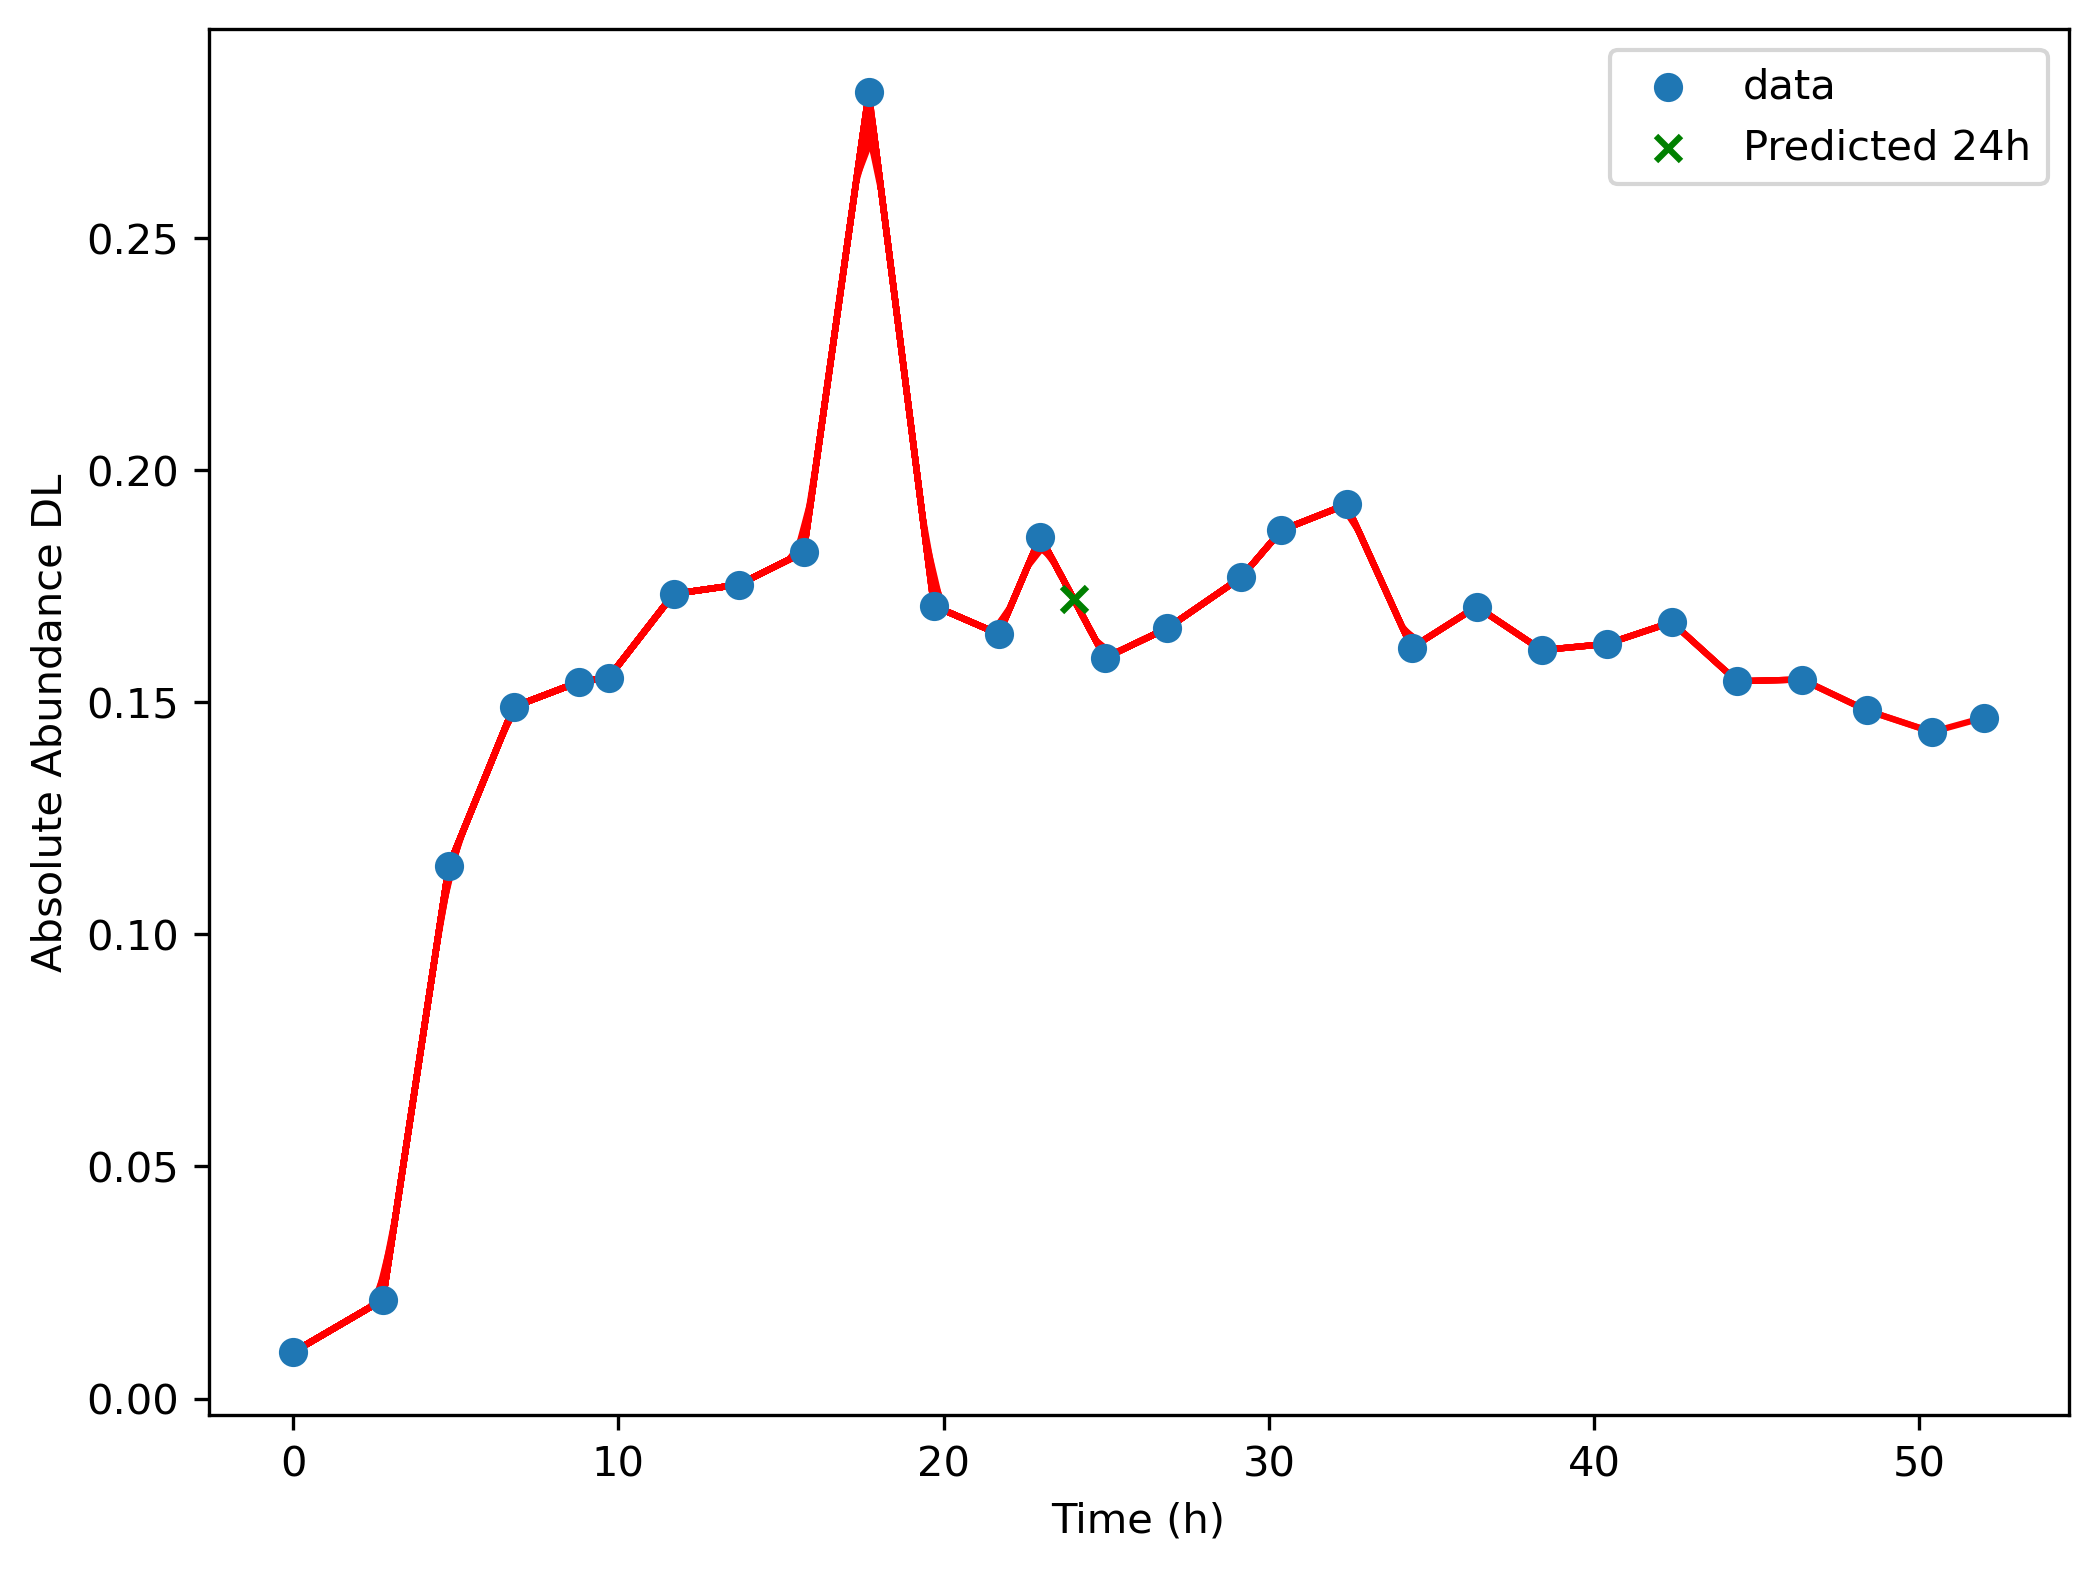

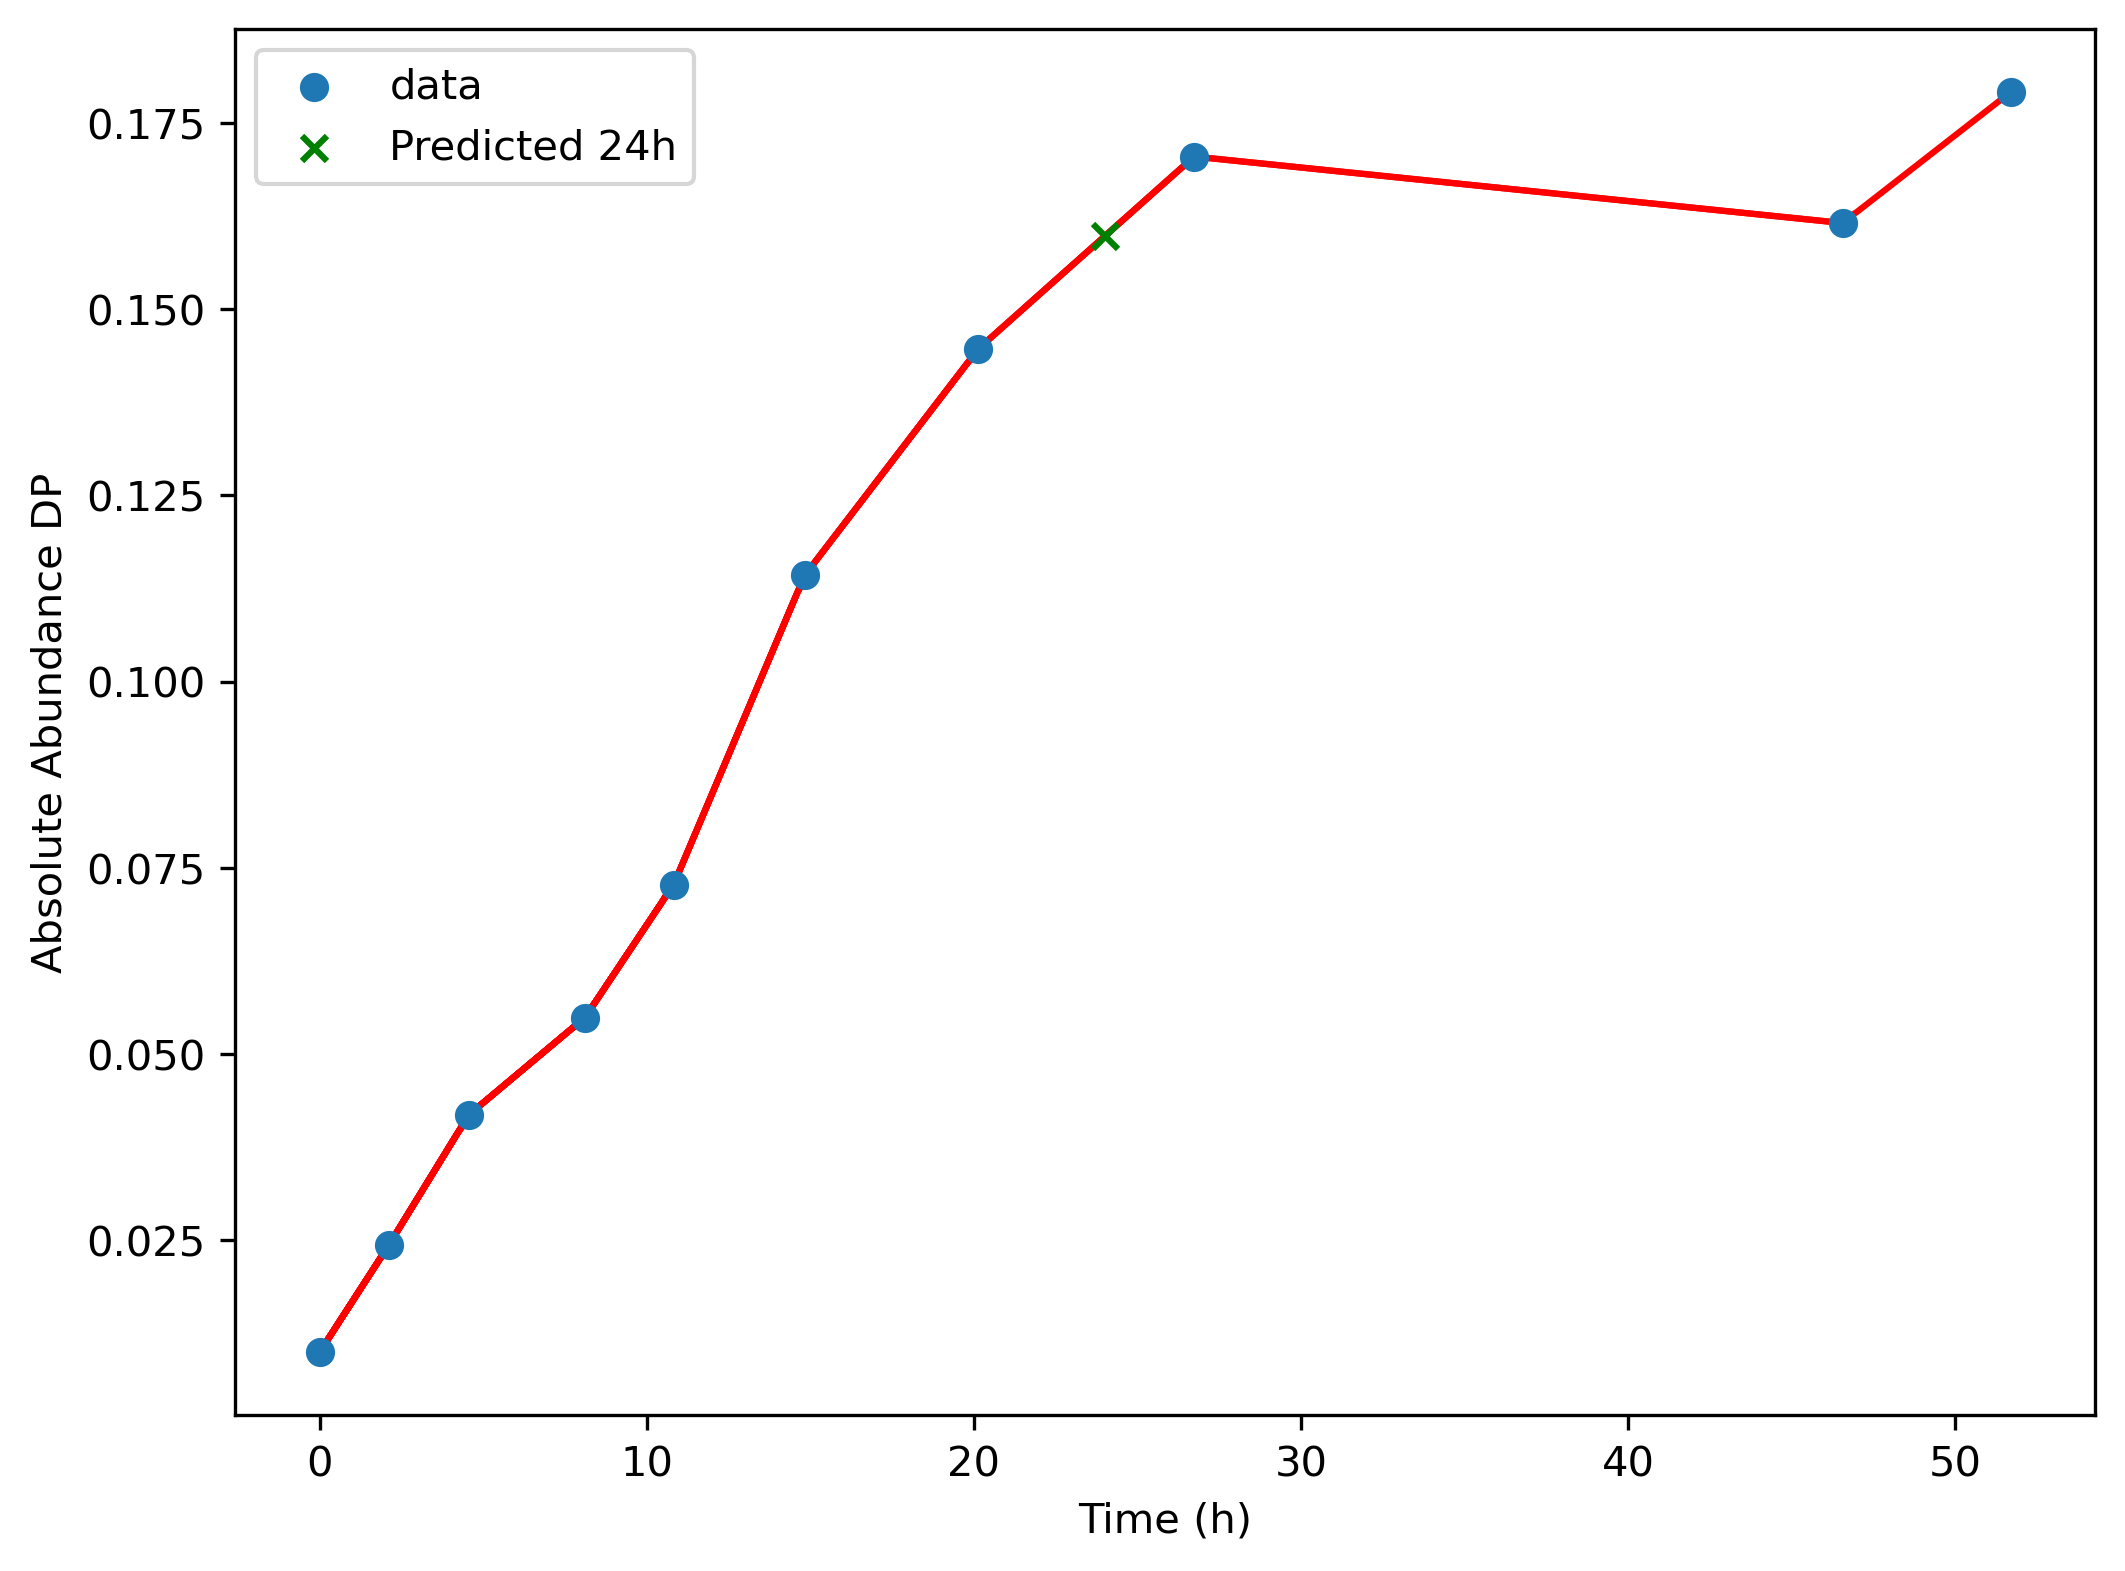

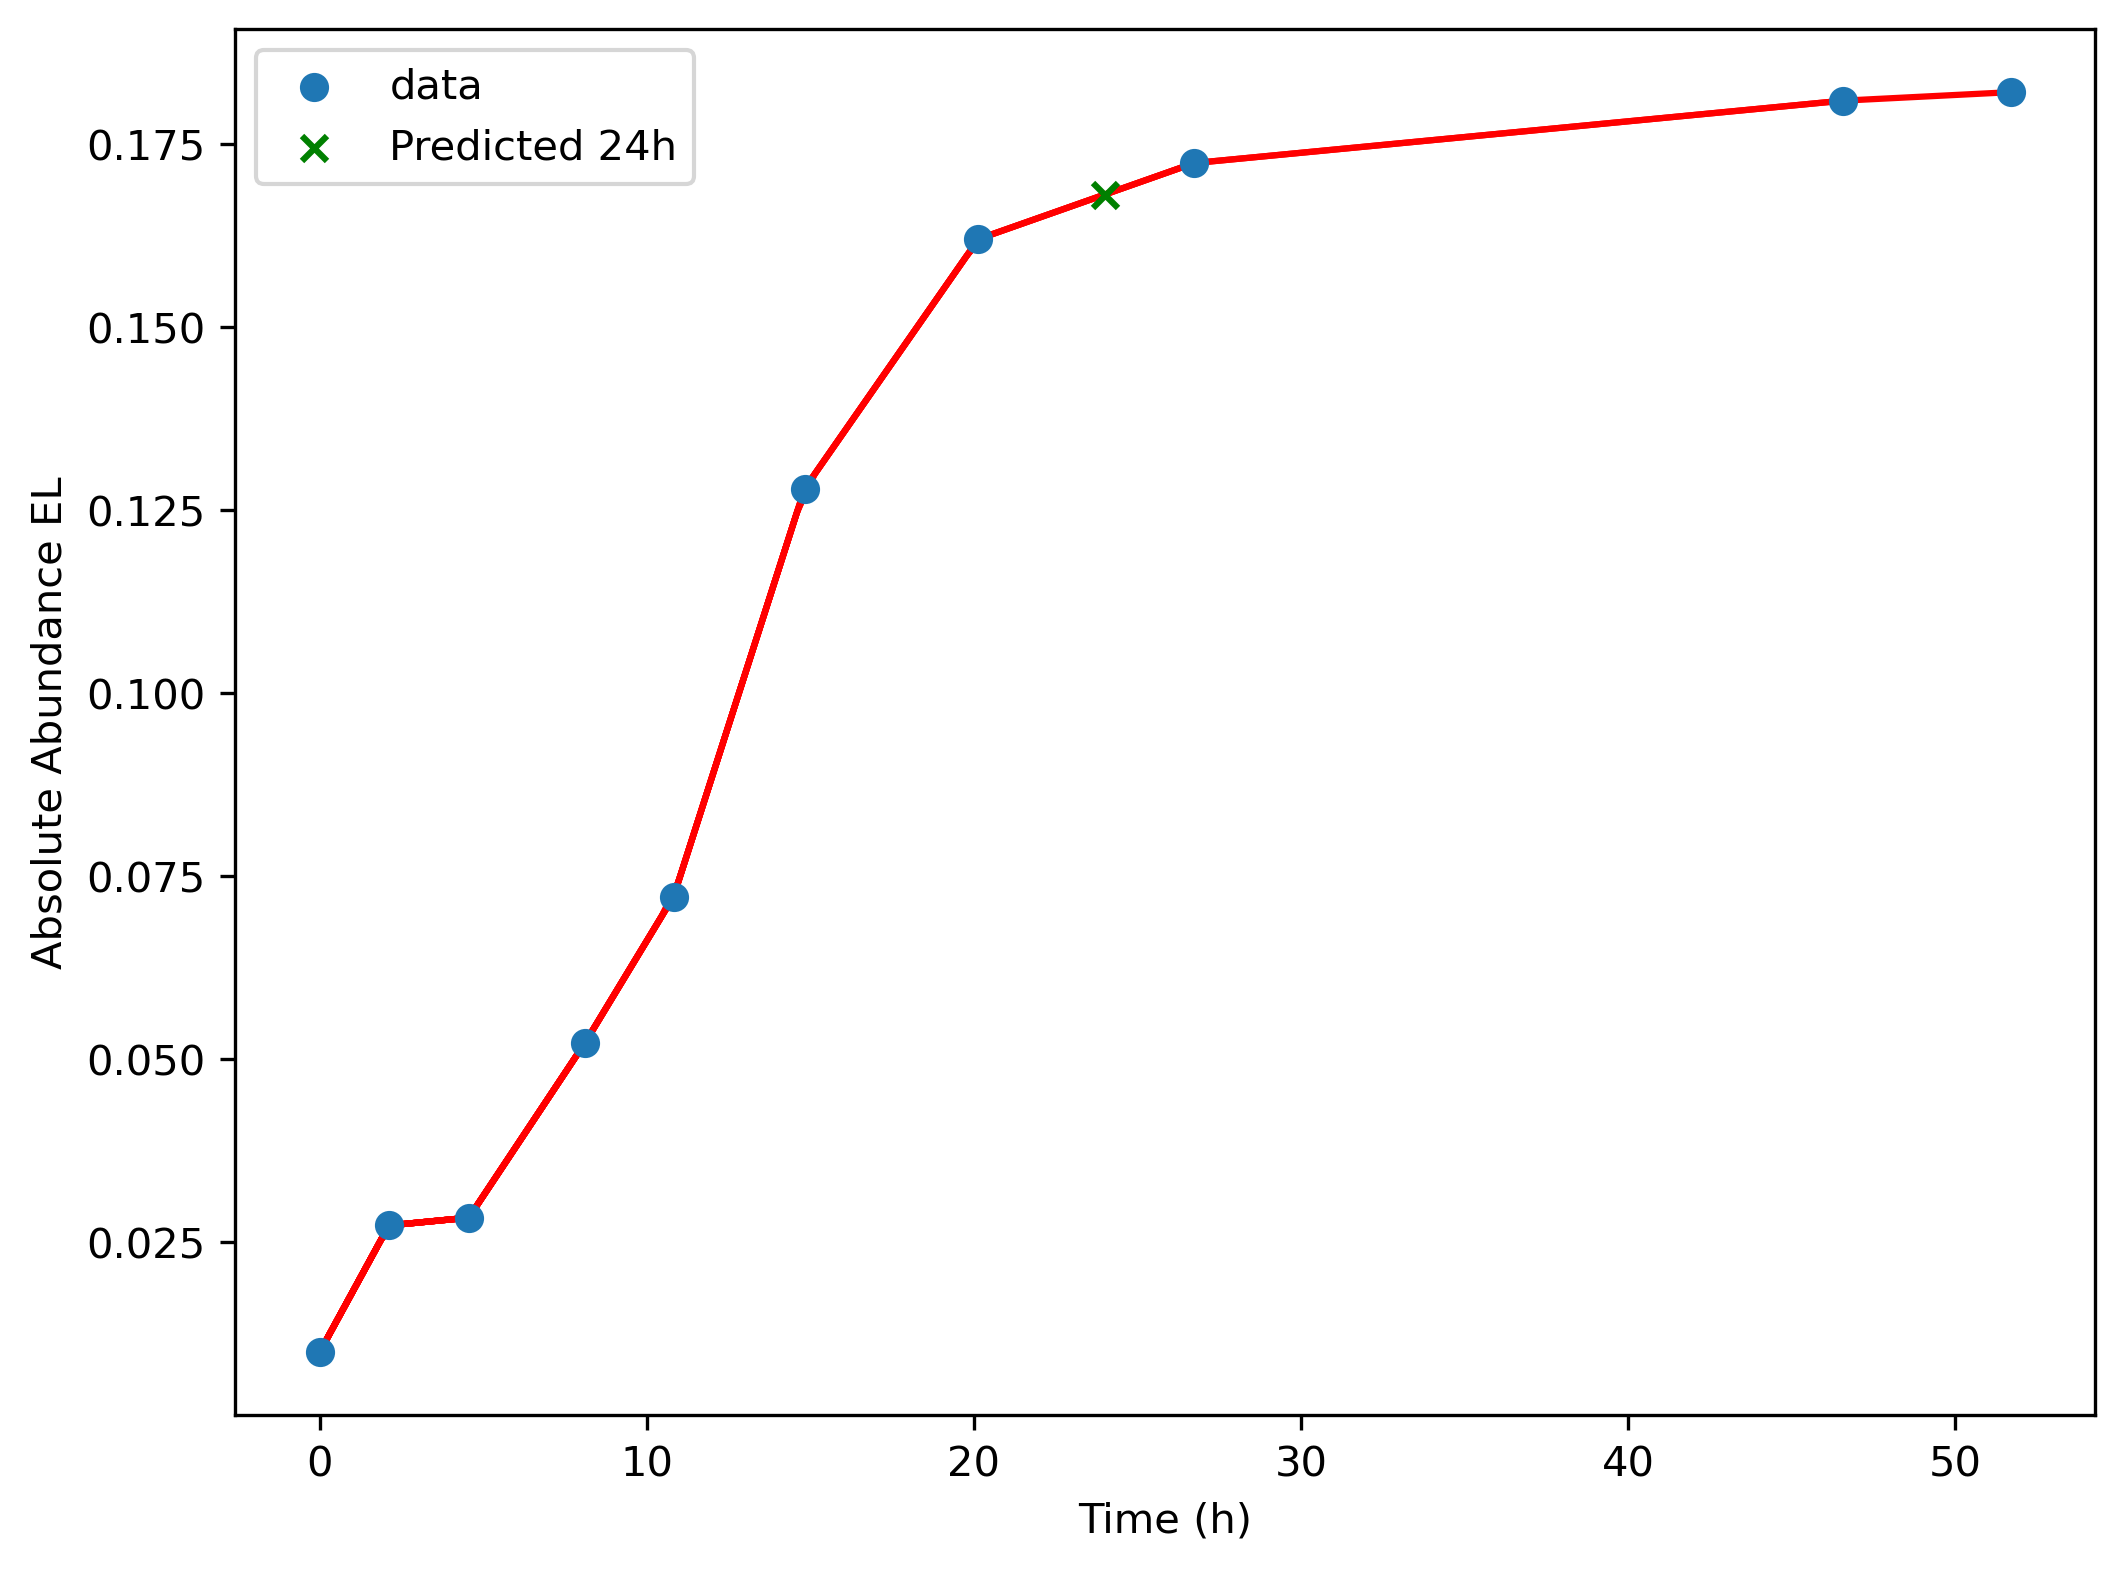

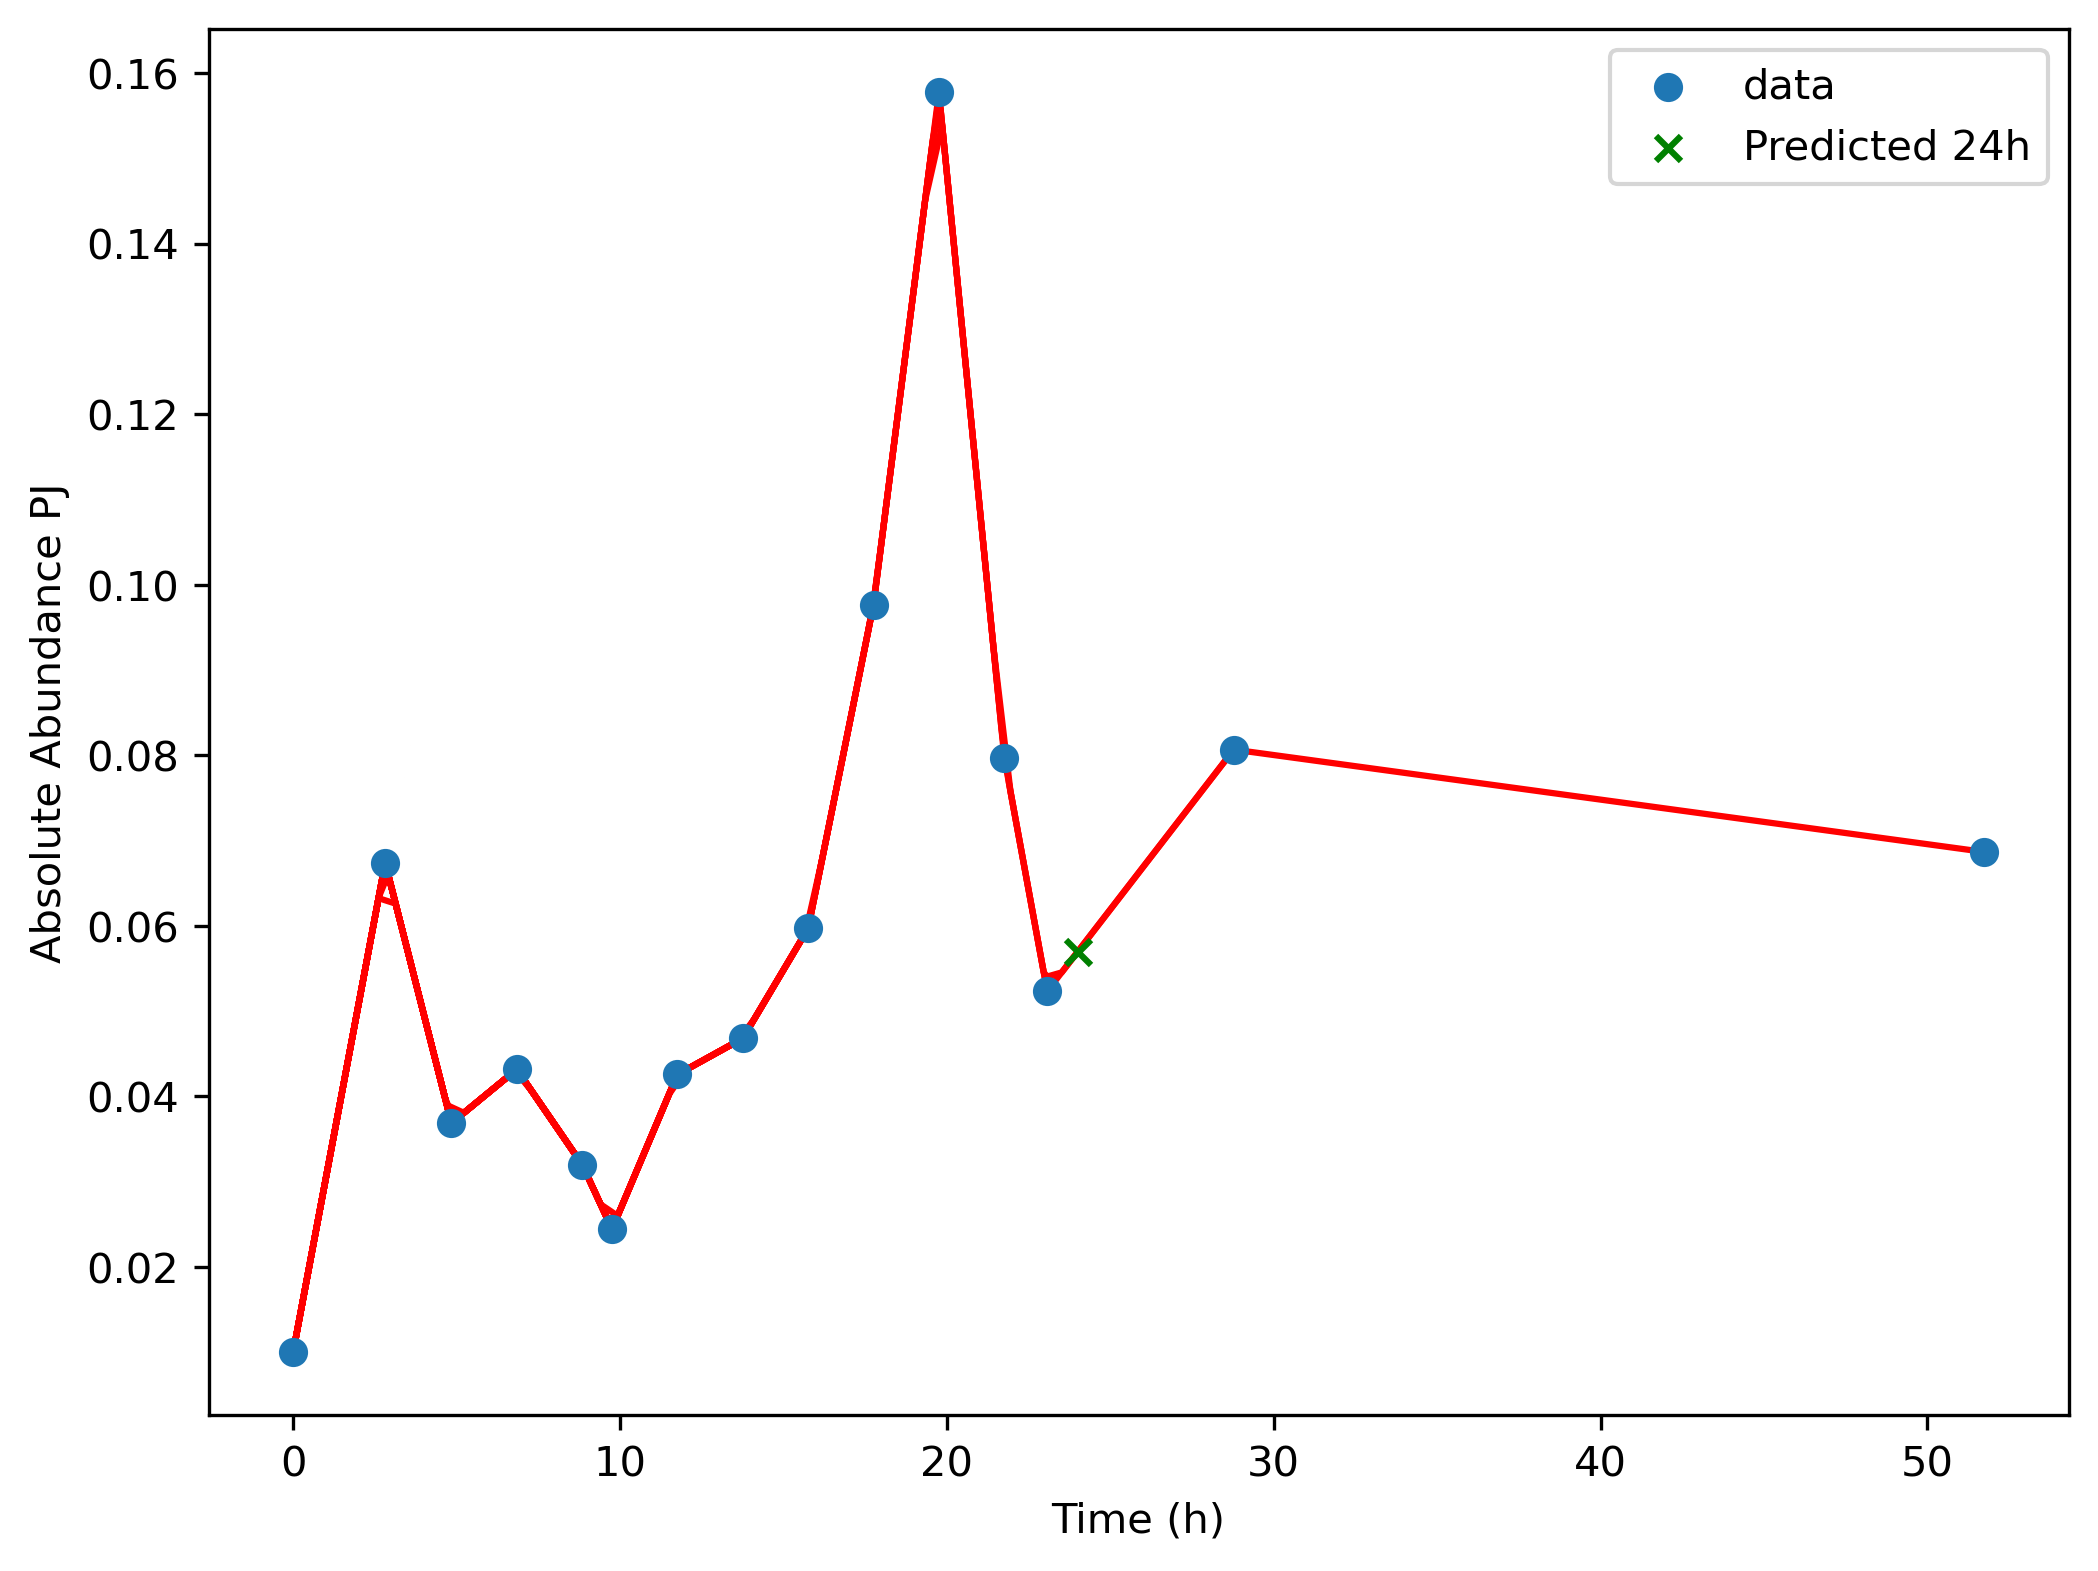

In [149]:
xylan_df = pd.read_csv('Data/Xylan_full.csv')
xylan_df = xylan_df.rename(columns={
    'S1': 'PJ',
    'S2': 'BV',
    'S3': 'AC',
    'S4': 'DP',
    'S5': 'BT',
    'S6': 'DL',
    'S7': 'BH',
    'S8': 'BP',
    'S9': 'CS',
    'S10': 'EL'
})
conditions = xylan_df['Treatments'].unique()
dict_conditions = {}
for condition in conditions:
    xylan_cond = xylan_df[xylan_df['Treatments'] == condition]
    min_t = xylan_cond['Time'].min()
    max_t = xylan_cond['Time'].max()
    if max_t < 24:
        print(f"Condition {condition} has a max time of {max_t}h, which is less than 24h.")
        continue
    if min_t > 0:
        print(f"Condition {condition} has a min time of {min_t}h, which is greater than 0h.")
        continue
    if max_t == 24 and min_t == 0:
        dict_conditions[condition] = xylan_cond[(xylan_cond['Time'] == 0) | (xylan_cond['Time'] == 24)].reset_index(drop=True)    
    else:
        # these are the monoculture conditions
        mono = condition[-2:]
        growth = xylan_cond[mono]
        time = xylan_cond['Time']
        # interpolate to get 24
        at_0 = xylan_cond[xylan_cond['Time'] == 0]
        interpolate = spi.make_interp_spline(
            time, growth, k = 1)
        fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
        time_sim = np.linspace(0, time, 100)
        pred_24 = interpolate(24)
        ax.scatter(time, growth, zorder = 2, label='data')  
        ax.plot(time_sim, interpolate(time_sim), color='red', zorder = 1)
        ax.scatter(24, pred_24,  color='green', marker='x', zorder = 3, label = 'Predicted 24h')
        ax.legend()
        ax.set_xlabel('Time (h)')
        ax.set_ylabel(f'Absolute Abundance {mono}')
        cond_024 = xylan_cond[xylan_cond['Time'] == 0]
        pred_24 = cond_024.copy().reset_index(drop=True)
        pred_24['Time'] = 24
        pred_24['Treatments'] = condition
        pred_24[mono] = interpolate(24)
        cond_024 = pd.concat([cond_024, pred_24], axis=0)
        cond_024 = cond_024.reset_index(drop=True)
        dict_conditions[condition] = cond_024
df_xylan_treated = pd.concat(dict_conditions.values(), axis=0, ignore_index=True)
df_xylan_treated.to_csv('Data/xylan_treated.csv', index=False)